# Masking homologous reference regions to minimize ambiguous alignments



In [1]:
import datetime
print(str(datetime.datetime.now()))

2021-11-29 07:41:07.250678


In [2]:
import numpy as np
np.__version__

'1.21.4'

In [3]:
import pandas as pd
pd.__version__

'1.3.4'

In [4]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [7]:
default_max_colwidth=pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', 1000)

In [8]:
default_max_rows=pd.get_option('display.max_rows')
pd.set_option('display.max_rows',10000)

In [9]:
df=pd.read_csv("bowtie2_report.csv",sep=",")
df.head()

sample  read count  average length  raw AC_000005.1  \
0  02-2485-10A-01D-1494   478851061             101                0   
1  06-0125-10A-01D-1490   695377506             101                0   
2  06-0157-10A-01D-1491   561676819             101                0   
3  06-0171-10A-01D-A33C   721570484             101                0   
4  06-0190-10B-01D-A32W   522679939             101                0   

   RM AC_000005.1  hg38 AC_000005.1  RM+hg38 AC_000005.1  raw AC_000007.1  \
0               0                 0                    0                0   
1               0                 0                    0                0   
2               0                 0                    0                0   
3               0                 0                    0                0   
4               0                 0                    0                0   

   RM AC_000007.1  hg38 AC_000007.1  ...  hg38 NC_028459.1  \
0               0                 0  ...                 0   
1               0                 0  ...                 0   
2               0                 0  ...                 0   
3               0                 0  ...                 0   
4               0                 0  ...                 0   

   RM+hg38 NC_028459.1  raw NC_038524.1  RM NC_038524.1  hg38 NC_038524.1  \
0                    0                0               0                 0   
1                    0                0               0                 0   
2                    0                0               0                 0   
3                    0                0               0                 0   
4                    0                0               0                 0   

   RM+hg38 NC_038524.1  raw NC_038889.1  RM NC_038889.1  hg38 NC_038889.1  \
0                    0                0               0                 0   
1                    0                0               0                 0   
2                    0                0               0                 0   
3                    0                0               0                 0   
4                    0                0               0                 0   

   RM+hg38 NC_038889.1  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 107 columns]

In [10]:
df.shape

(125, 107)

In [11]:
df.iloc[0]

sample                 02-2485-10A-01D-1494
read count                        478851061
average length                          101
raw AC_000005.1                           0
RM AC_000005.1                            0
hg38 AC_000005.1                          0
RM+hg38 AC_000005.1                       0
raw AC_000007.1                           0
RM AC_000007.1                            0
hg38 AC_000007.1                          0
RM+hg38 AC_000007.1                       0
raw AC_000017.1                           0
RM AC_000017.1                            0
hg38 AC_000017.1                          0
RM+hg38 AC_000017.1                       0
raw AC_000018.1                           0
RM AC_000018.1                            0
hg38 AC_000018.1                          0
RM+hg38 AC_000018.1                       0
raw AC_000019.1                           0
RM AC_000019.1                            0
hg38 AC_000019.1                          0
RM+hg38 AC_000019.1             

In [12]:
df=df.iloc[0:91]

In [13]:
df=df.set_index(['sample','read count','average length'])
df.head()

raw AC_000005.1  \
sample               read count average length                    
02-2485-10A-01D-1494 478851061  101                           0   
06-0125-10A-01D-1490 695377506  101                           0   
06-0157-10A-01D-1491 561676819  101                           0   
06-0171-10A-01D-A33C 721570484  101                           0   
06-0190-10B-01D-A32W 522679939  101                           0   

                                                RM AC_000005.1  \
sample               read count average length                   
02-2485-10A-01D-1494 478851061  101                          0   
06-0125-10A-01D-1490 695377506  101                          0   
06-0157-10A-01D-1491 561676819  101                          0   
06-0171-10A-01D-A33C 721570484  101                          0   
06-0190-10B-01D-A32W 522679939  101                          0   

                                                hg38 AC_000005.1  \
sample               read count average length                     
02-2485-10A-01D-1494 478851061  101                            0   
06-0125-10A-01D-1490 695377506  101                            0   
06-0157-10A-01D-1491 561676819  101                            0   
06-0171-10A-01D-A33C 721570484  101                            0   
06-0190-10B-01D-A32W 522679939  101                            0   

                                                RM+hg38 AC_000005.1  \
sample               read count average length                        
02-2485-10A-01D-1494 478851061  101                               0   
06-0125-10A-01D-1490 695377506  101                               0   
06-0157-10A-01D-1491 561676819  101                               0   
06-0171-10A-01D-A33C 721570484  101                               0   
06-0190-10B-01D-A32W 522679939  101                               0   

                                                raw AC_000007.1  \
sample               read count average length                    
02-2485-10A-01D-1494 478851061  101                           0   
06-0125-10A-01D-1490 695377506  101                           0   
06-0157-10A-01D-1491 561676819  101                           0   
06-0171-10A-01D-A33C 721570484  101                           0   
06-0190-10B-01D-A32W 522679939  101                           0   

                                                RM AC_000007.1  \
sample               read count average length                   
02-2485-10A-01D-1494 478851061  101                          0   
06-0125-10A-01D-1490 695377506  101                          0   
06-0157-10A-01D-1491 561676819  101                          0   
06-0171-10A-01D-A33C 721570484  101                          0   
06-0190-10B-01D-A32W 522679939  101                          0   

                                                hg38 AC_000007.1  \
sample               read count average length                     
02-2485-10A-01D-1494 478851061  101                            0   
06-0125-10A-01D-1490 695377506  101                            0   
06-0157-10A-01D-1491 561676819  101                            0   
06-0171-10A-01D-A33C 721570484  101                            0   
06-0190-10B-01D-A32W 522679939  101                            0   

                                                RM+hg38 AC_000007.1  \
sample               read count average length                        
02-2485-10A-01D-1494 478851061  101                               0   
06-0125-10A-01D-1490 695377506  101                               0   
06-0157-10A-01D-1491 561676819  101                               0   
06-0171-10A-01D-A33C 721570484  101                               0   
06-0190-10B-01D-A32W 522679939  101                               0   

                                                raw AC_000017.1  \
sample               read count average length                    
02-2485-10A-01D-1494 478851061  101                           0   
06-0125-10A-01D-1490 695377506 

In [14]:
#data_columns=df.columns
#data_columns

In [15]:
idx = df.columns.str.split(' ', expand=True)
idx

MultiIndex([(    'raw', 'AC_000005.1'),
            (     'RM', 'AC_000005.1'),
            (   'hg38', 'AC_000005.1'),
            ('RM+hg38', 'AC_000005.1'),
            (    'raw', 'AC_000007.1'),
            (     'RM', 'AC_000007.1'),
            (   'hg38', 'AC_000007.1'),
            ('RM+hg38', 'AC_000007.1'),
            (    'raw', 'AC_000017.1'),
            (     'RM', 'AC_000017.1'),
            ...
            (   'hg38', 'NC_028459.1'),
            ('RM+hg38', 'NC_028459.1'),
            (    'raw', 'NC_038524.1'),
            (     'RM', 'NC_038524.1'),
            (   'hg38', 'NC_038524.1'),
            ('RM+hg38', 'NC_038524.1'),
            (    'raw', 'NC_038889.1'),
            (     'RM', 'NC_038889.1'),
            (   'hg38', 'NC_038889.1'),
            ('RM+hg38', 'NC_038889.1')],
           length=104)

In [16]:
df.columns = idx
df.head()

raw          RM  \
                                               AC_000005.1 AC_000005.1   
sample               read count average length                           
02-2485-10A-01D-1494 478851061  101                      0           0   
06-0125-10A-01D-1490 695377506  101                      0           0   
06-0157-10A-01D-1491 561676819  101                      0           0   
06-0171-10A-01D-A33C 721570484  101                      0           0   
06-0190-10B-01D-A32W 522679939  101                      0           0   

                                                      hg38     RM+hg38  \
                                               AC_000005.1 AC_000005.1   
sample               read count average length                           
02-2485-10A-01D-1494 478851061  101                      0           0   
06-0125-10A-01D-1490 695377506  101                      0           0   
06-0157-10A-01D-1491 561676819  101                      0           0   
06-0171-10A-01D-A33C 721570484  101                      0           0   
06-0190-10B-01D-A32W 522679939  101                      0           0   

                                                       raw          RM  \
                                               AC_000007.1 AC_000007.1   
sample               read count average length                           
02-2485-10A-01D-1494 478851061  101                      0           0   
06-0125-10A-01D-1490 695377506  101                      0           0   
06-0157-10A-01D-1491 561676819  101                      0           0   
06-0171-10A-01D-A33C 721570484  101                      0           0   
06-0190-10B-01D-A32W 522679939  101                      0           0   

                                                      hg38     RM+hg38  \
                                               AC_000007.1 AC_000007.1   
sample               read count average length                           
02-2485-10A-01D-1494 478851061  101                      0           0   
06-0125-10A-01D-1490 695377506  101                      0           0   
06-0157-10A-01D-1491 561676819  101                      0           0   
06-0171-10A-01D-A33C 721570484  101                      0           0   
06-0190-10B-01D-A32W 522679939  101                      0           0   

                                                       raw          RM  ...  \
                                               AC_000017.1 AC_000017.1  ...   
sample               read count average length                          ...   
02-2485-10A-01D-1494 478851061  101                      0           0  ...   
06-0125-10A-01D-1490 695377506  101                      0           0  ...   
06-0157-10A-01D-1491 561676819  101                      0           0  ...   
06-0171-10A-01D-A33C 721570484  101                      0           0  ...   
06-0190-10B-01D-A32W 522679939  101                      0           0  ...   

                                                      hg38     RM+hg38  \
                                               NC_028459.1 NC_028459.1   
sample               read count average length                           
02-2485-10A-01D-1494 478851061  101                      0           0   
06-0125-10A-01D-1490 695377506  101                      0           0   
06-0157-10A-01D-1491 561676819  101                      0           0   
06-0171-10A-01D-A33C 721570484  101                      0           0   
06-0190-10B-01D-A32W 522679939  101                      0           0   

                                                       raw          RM  \
                                               NC_038524.1 NC_038524.1   
sample               read count average length                           
02-2485-10A-01D-1494 478851061  101                      0           0   
06-0125-10A-01D-1490 695377506  101                      0           0   
06-0157-10A-01D-1491 561676819  101                      0           0   
06-0171-10A-0

## Note and drop accession groups with all zeroes

In [17]:
df.sum().head(10)

raw      AC_000005.1     20
RM       AC_000005.1      4
hg38     AC_000005.1     19
RM+hg38  AC_000005.1      4
raw      AC_000007.1    956
RM       AC_000007.1      2
hg38     AC_000007.1      2
RM+hg38  AC_000007.1      2
raw      AC_000017.1    101
RM       AC_000017.1      8
dtype: int64

In [18]:
df.sum()['raw','AC_000005.1']

20

## Normalize by read count to hits per million or billion

In [19]:
df=df.reset_index()
df.head()

sample read count average length         raw          RM  \
                                                  AC_000005.1 AC_000005.1   
0  02-2485-10A-01D-1494  478851061            101           0           0   
1  06-0125-10A-01D-1490  695377506            101           0           0   
2  06-0157-10A-01D-1491  561676819            101           0           0   
3  06-0171-10A-01D-A33C  721570484            101           0           0   
4  06-0190-10B-01D-A32W  522679939            101           0           0   

         hg38     RM+hg38         raw          RM        hg38  ...  \
  AC_000005.1 AC_000005.1 AC_000007.1 AC_000007.1 AC_000007.1  ...   
0           0           0           0           0           0  ...   
1           0           0           0           0           0  ...   
2           0           0           0           0           0  ...   
3           0           0           0           0           0  ...   
4           0           0           0           0           0  ...   

                  RM+hg38         raw          RM        hg38     RM+hg38  \
  NC_028459.1 NC_028459.1 NC_038524.1 NC_038524.1 NC_038524.1 NC_038524.1   
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

          raw          RM        hg38     RM+hg38  
  NC_038889.1 NC_038889.1 NC_038889.1 NC_038889.1  
0           0           0           0           0  
1           0           0           0           0  
2           0           0           0           0  
3           0           0           0           0  
4           0           0           0           0  

[5 rows x 107 columns]

In [20]:
df[idx]=(1e9*df[idx].values)/df[['read count']].values
df.head()

sample read count average length         raw          RM  \
                                                  AC_000005.1 AC_000005.1   
0  02-2485-10A-01D-1494  478851061            101         0.0         0.0   
1  06-0125-10A-01D-1490  695377506            101         0.0         0.0   
2  06-0157-10A-01D-1491  561676819            101         0.0         0.0   
3  06-0171-10A-01D-A33C  721570484            101         0.0         0.0   
4  06-0190-10B-01D-A32W  522679939            101         0.0         0.0   

         hg38     RM+hg38         raw          RM        hg38  ...  \
  AC_000005.1 AC_000005.1 AC_000007.1 AC_000007.1 AC_000007.1  ...   
0         0.0         0.0         0.0         0.0         0.0  ...   
1         0.0         0.0         0.0         0.0         0.0  ...   
2         0.0         0.0         0.0         0.0         0.0  ...   
3         0.0         0.0         0.0         0.0         0.0  ...   
4         0.0         0.0         0.0         0.0         0.0  ...   

                  RM+hg38         raw          RM        hg38     RM+hg38  \
  NC_028459.1 NC_028459.1 NC_038524.1 NC_038524.1 NC_038524.1 NC_038524.1   
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

          raw          RM        hg38     RM+hg38  
  NC_038889.1 NC_038889.1 NC_038889.1 NC_038889.1  
0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0  

[5 rows x 107 columns]

## Compare each virus by reference type (raw, RM, hg38masked, RMhg38masked)

In [21]:
viruses=pd.read_csv("select_viruses.csv",sep="\t",header=None,names=['accession','description'])
viruses

accession  \
0   AC_000005.1   
1   AC_000007.1   
2   AC_000017.1   
3   AC_000018.1   
4   AC_000019.1   
5   NC_000898.1   
6   NC_001352.1   
7   NC_001357.1   
8   NC_001405.1   
9   NC_001460.1   
10  NC_001587.1   
11  NC_001593.1   
12  NC_001664.4   
13  NC_001716.2   
14  NC_001798.2   
15  NC_001806.2   
16  NC_006273.2   
17  NC_006577.2   
18  NC_007605.1   
19  NC_009333.1   
20  NC_009334.1   
21  NC_011203.1   
22  NC_020890.1   
23  NC_028459.1   
24  NC_038524.1   
25  NC_038889.1   

                                                                       description  
0                                          Human_mastadenovirus_A,_complete_genome  
1                                              Human_adenovirus_2,_complete_genome  
2                                         Human_adenovirus_type_1,_complete_genome  
3                                         Human_adenovirus_type_7,_complete_genome  
4                                        Human_adenovirus_type_35,_complete_genome  
5                                            Human_herpesvirus_6B,_complete_genome  
6                                        Human_papillomavirus_-_2,_complete_genome  
7                                       Human_papillomavirus_-_18,_complete_genome  
8                                              Human_adenovirus_C,_complete_genome  
9                                              Human_adenovirus_A,_complete_genome  
10                                   Human_papillomavirus_type_34,_complete_genome  
11                                   Human_papillomavirus_type_53,_complete_genome  
12  Human_betaherpesvirus_6A,_variant_A_DNA,_complete_virion_genome,_isolate_U1102  
13                                            Human_herpesvirus_7,_complete_genome  
14                                Human_herpesvirus_2_strain_HG52,_complete_genome  
15                                  Human_herpesvirus_1_strain_17,_complete_genome  
16                              Human_herpesvirus_5_strain_Merlin,_complete_genome  
17                                         Human_coronavirus_HKU1,_complete_genome  
18                                       Human_gammaherpesvirus_4,_complete_genome  
19                                Human_herpesvirus_8_strain_GK18,_complete_genome  
20                                            Human_herpesvirus_4,_complete_genome  
21                                            Human_adenovirus_B1,_complete_genome  
22                            Human_polyomavirus_12_strain_hu1403,_complete_genome  
23                   Human_associated_gemyvongvirus_1_isolate_DB1,_complete_genome  
24                     Human_papillomavirus_type_175_isolate_SE87,_complete_genome  
25                                        Human_papillomavirus_type_30_genomic_DNA

In [22]:
df=df.set_index(['sample','read count','average length'])

In [23]:
df.iloc[:, df.columns.get_level_values(1)=='AC_000005.1']

raw          RM  \
                                               AC_000005.1 AC_000005.1   
sample               read count average length                           
02-2485-10A-01D-1494 478851061  101               0.000000    0.000000   
06-0125-10A-01D-1490 695377506  101               0.000000    0.000000   
06-0157-10A-01D-1491 561676819  101               0.000000    0.000000   
06-0171-10A-01D-A33C 721570484  101               0.000000    0.000000   
06-0190-10B-01D-A32W 522679939  101               0.000000    0.000000   
06-0210-10A-01D-1491 628825315  101               0.000000    0.000000   
06-0211-10A-01D-1491 762041774  101               0.000000    0.000000   
06-0214-10A-01D-1491 573345114  101               0.000000    0.000000   
06-0221-10A-01D-A35R 526268055  101               0.000000    0.000000   
06-0686-10A-01D-1492 517085243  101               0.000000    0.000000   
06-0744-10A-01D-1492 525266861  101               0.000000    0.000000   
06-0745-10A-01D-1492 578518639  101               0.000000    0.000000   
06-2557-10A-01D-1494 600988206  101               0.000000    0.000000   
06-2570-10A-01D-1495 551419838  101               0.000000    0.000000   
06-5411-10A-01D-1696 534161551  101               0.000000    0.000000   
06-5415-10A-01D-1486 546555827  101               0.000000    0.000000   
14-1034-10A-01D-1492 736829067  101               0.000000    0.000000   
14-1402-10A-01D-1493 663610781  101               0.000000    0.000000   
14-1823-10A-01D-1494 542116190  101               0.000000    0.000000   
14-2554-10A-01D-1494 578717037  101               0.000000    0.000000   
15-1444-10A-01D-1696 570946912  101               0.000000    0.000000   
19-1389-10D-01D-2364 539674851  101               0.000000    0.000000   
19-2620-10A-01D-1495 529069197  101               0.000000    0.000000   
19-2624-10A-01D-1495 587795591  101               0.000000    0.000000   
19-2629-10A-01D-1495 578708416  101               0.000000    0.000000   
19-5960-10A-01D-1696 573553833  101               0.000000    0.000000   
26-5132-10A-01D-1486 580130149  101               0.000000    0.000000   
26-5135-10A-01D-1486 594225295  101               0.000000    0.000000   
27-1831-10A-01D-1494 533727503  101               0.000000    0.000000   
27-2523-10A-01D-1494 520322332  101               0.000000    0.000000   
27-2528-10A-01D-1494 575203420  101               0.000000    0.000000   
32-1970-10A-01D-1494 650616219  101               0.000000    0.000000   
41-5651-10A-01D-1696 579574120  101               0.000000    0.000000   
CS-4938-10A-01D-1891 80646805   51                0.000000    0.000000   
CS-4941-10A-01D-1465 282839817  51                3.535570    0.000000   
CS-4944-10A-01D-1465 263101470  51                0.000000    0.000000   
CS-5390-10A-01D-1468 529225224  101               0.000000    0.000000   
CS-5395-10A-01D-1468 581221288  101               0.000000    0.000000   
CS-5396-10A-01D-1465 254110921  51                0.000000    0.000000   
CS-6186-10A-01D-2022 153624698  51                0.000000    0.000000   
CS-6186-10A-01D-2024 365922343  151               0.000000    0.000000   
CS-6290-10A-01D-1703 233757121  51                0.000000    0.000000   
CS-6665-10A-01D-1893 343696933  151               0.000000    0.000000   
CS-6668-10A-01D-1893 533768229  101               0.000000    0.000000   
CS-6669-10A-01D-1893 527765133  101               0.000000    0.000000   
DB-5273-10A-01D-1465 159579489  51                0.000000    0.000000   
DB-5276-10A-01D-1465 285284737  51                3.505270    0.000000   
DB-5278-10A-01D-1468 549321938  101               0.000000    0.000000   
DB-5279-10A-01D-1465 213584522  51                0.000000    0.000000   
DB-5280-10A-01D-1465 107613490  51                0.000000    0.000000   
DH-5143-10A-01D-1465 296518479  51                3.372471    0.000000   
DH-A669-10A-01D-A31J 344391727  151               0.000000 

In [24]:
#df.iloc[:, df.columns.get_level_values(1)=='AC_000005.1'].boxplot()

In [25]:
df.iloc[:, df.columns.get_level_values(1)=='AC_000005.1'].sum()['raw','AC_000005.1']

93.01170278581331

raw      AC_000005.1    93.011703
RM       AC_000005.1    20.954050
hg38     AC_000005.1    88.330597
RM+hg38  AC_000005.1    20.954050
dtype: float64


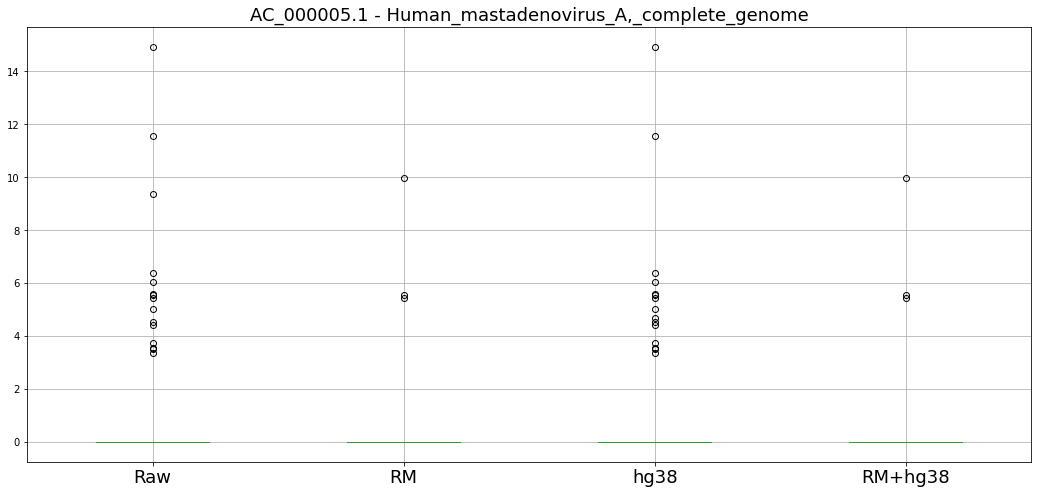

raw      AC_000007.1    4752.115388
RM       AC_000007.1       8.482802
hg38     AC_000007.1       8.482802
RM+hg38  AC_000007.1       8.482802
dtype: float64


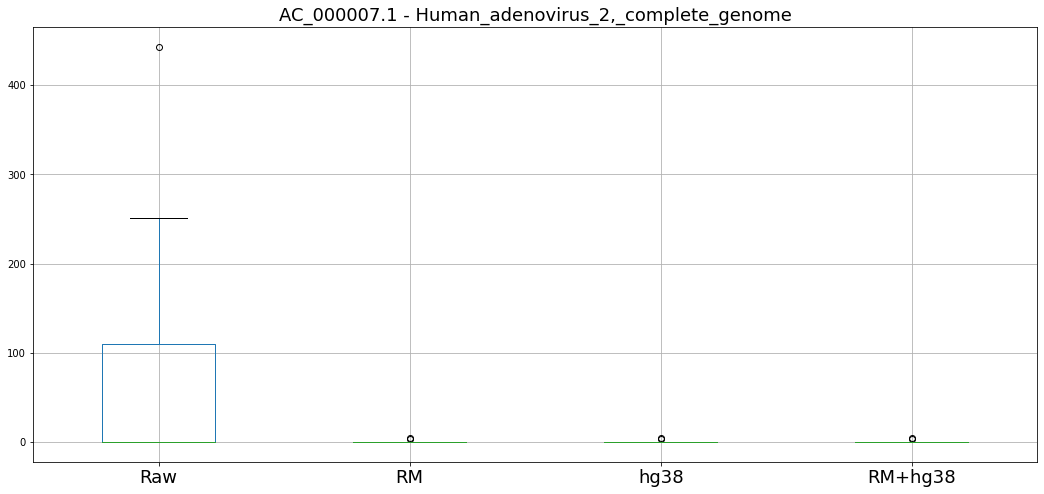

raw      AC_000017.1    467.457473
RM       AC_000017.1     40.955212
hg38     AC_000017.1     52.050769
RM+hg38  AC_000017.1     16.070943
dtype: float64


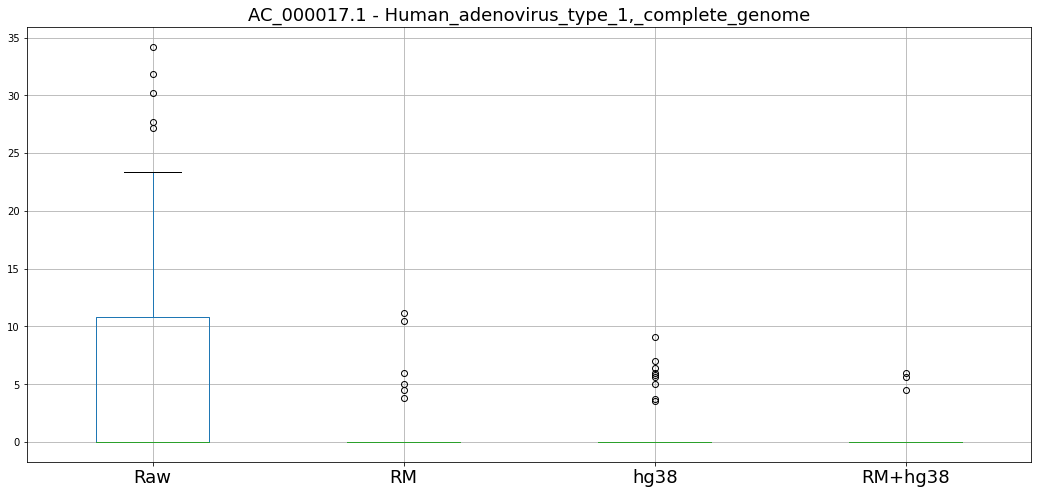

raw      AC_000018.1    38.894123
RM       AC_000018.1     0.000000
hg38     AC_000018.1    38.894123
RM+hg38  AC_000018.1     0.000000
dtype: float64


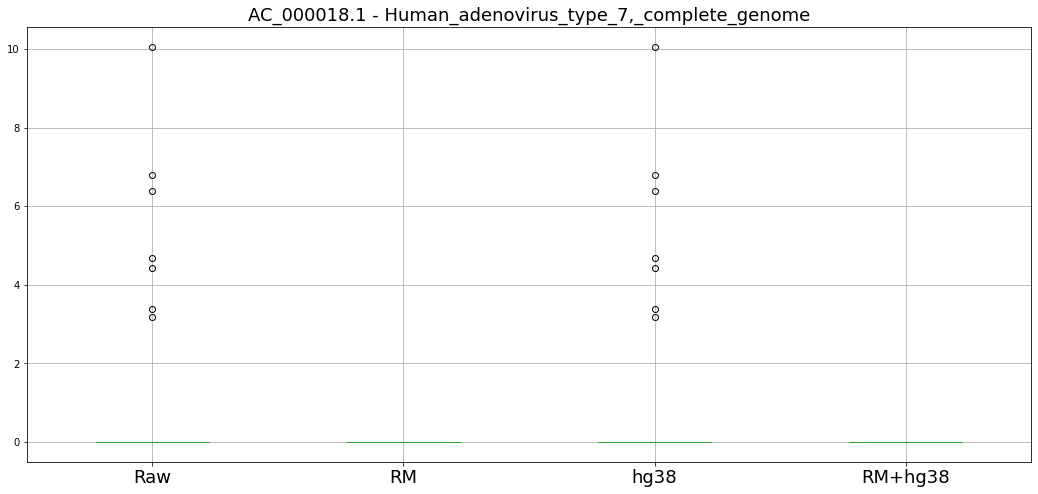

raw      AC_000019.1    35.005179
RM       AC_000019.1    35.004973
hg38     AC_000019.1    20.108013
RM+hg38  AC_000019.1    20.107808
dtype: float64


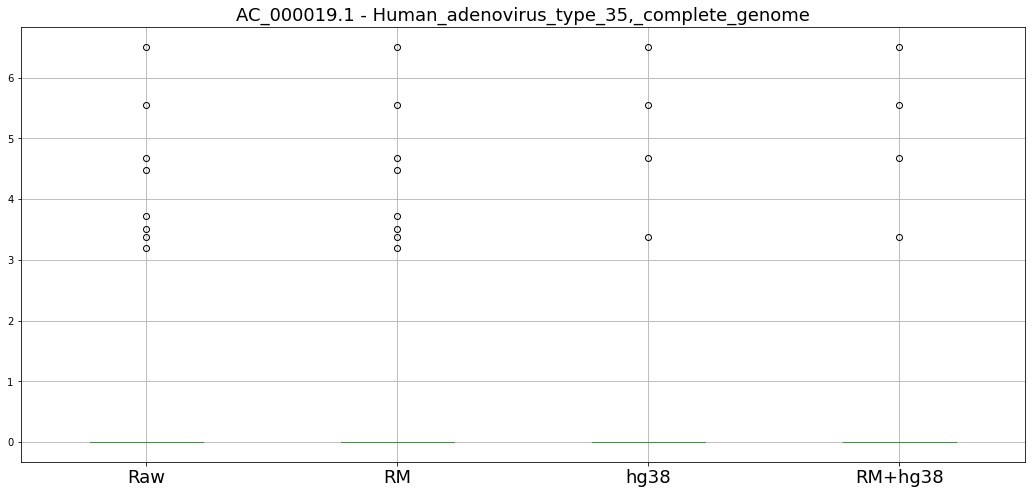

raw      NC_000898.1    4.198801e+06
RM       NC_000898.1    5.792065e+04
hg38     NC_000898.1    5.542197e+04
RM+hg38  NC_000898.1    5.460969e+04
dtype: float64


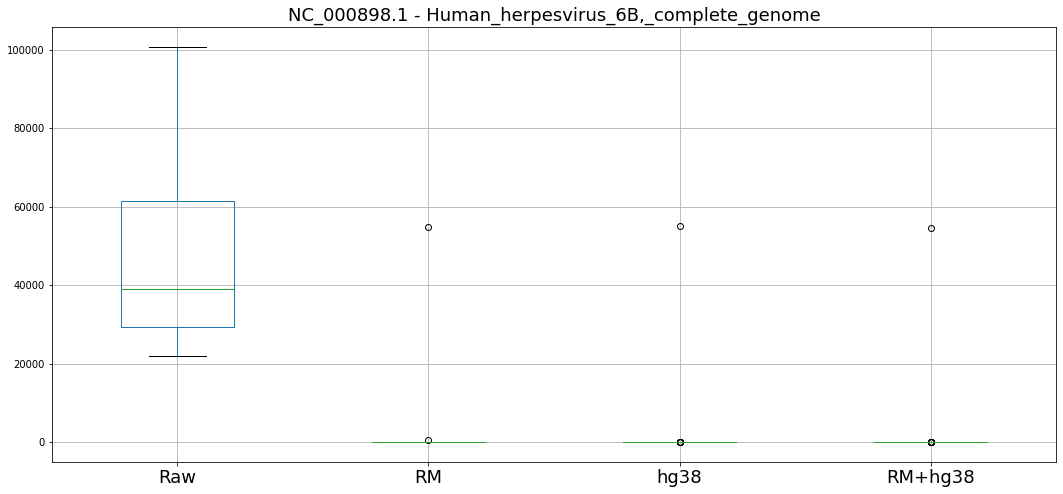

raw      NC_001357.1    1163.487332
RM       NC_001357.1    1163.487332
hg38     NC_001357.1       0.000000
RM+hg38  NC_001357.1       0.000000
dtype: float64


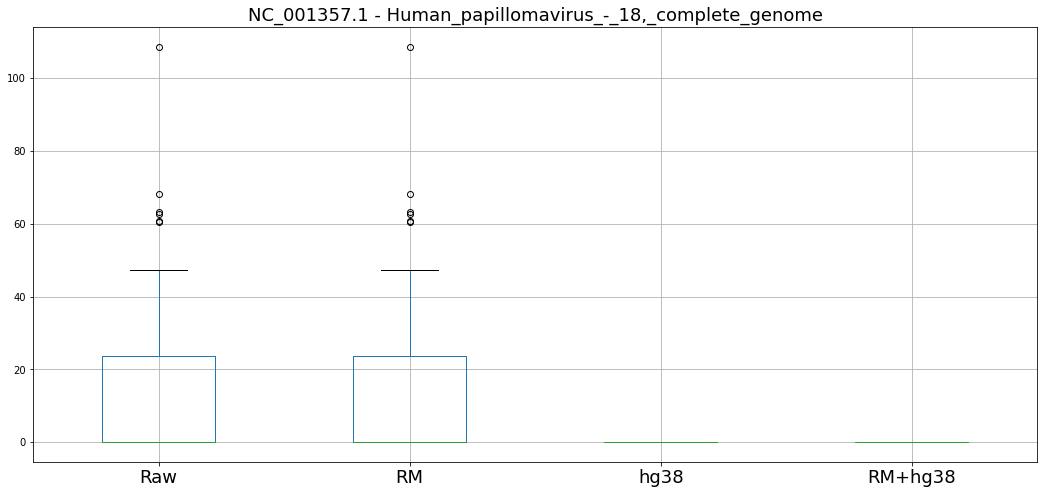

raw      NC_001405.1    4604.379549
RM       NC_001405.1       3.728157
hg38     NC_001405.1       3.728157
RM+hg38  NC_001405.1       3.728157
dtype: float64


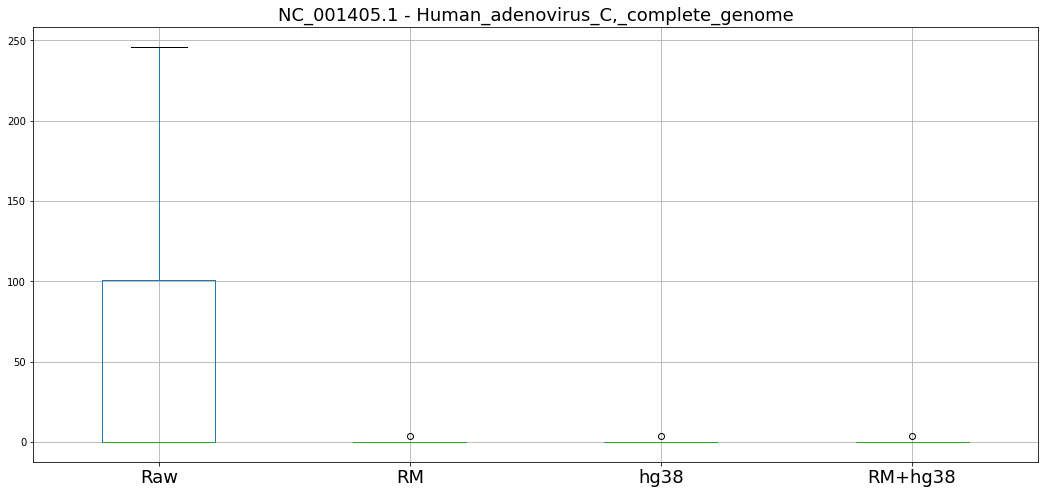

raw      NC_001460.1    53.269027
RM       NC_001460.1     8.959050
hg38     NC_001460.1    57.950133
RM+hg38  NC_001460.1     8.959050
dtype: float64


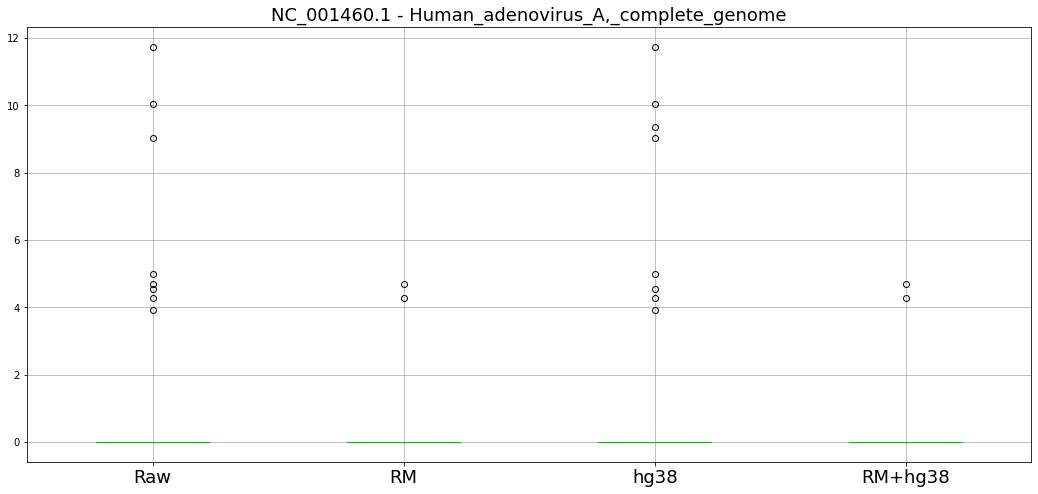

raw      NC_001587.1    241.787777
RM       NC_001587.1      0.000000
hg38     NC_001587.1      0.000000
RM+hg38  NC_001587.1      0.000000
dtype: float64


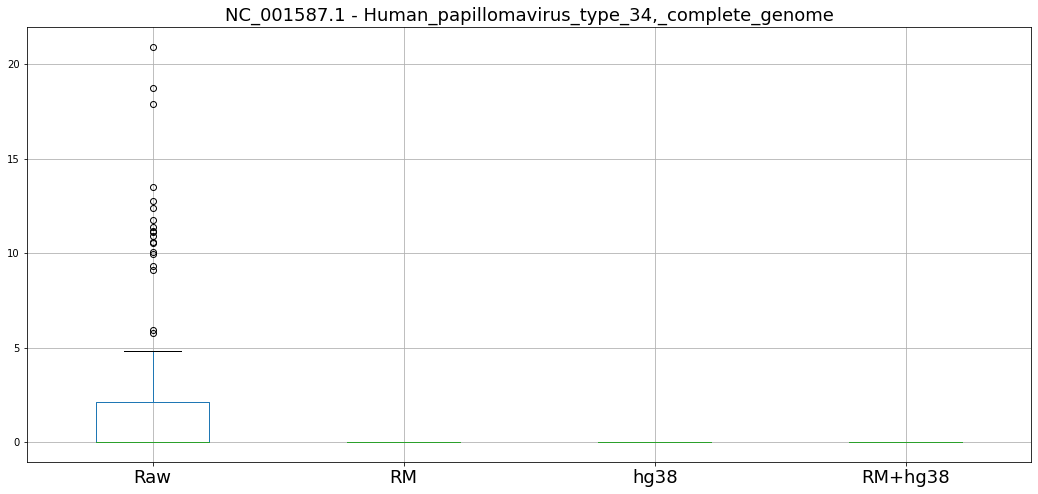

raw      NC_001664.4    2.772799e+06
RM       NC_001664.4    1.505193e+04
hg38     NC_001664.4    7.640016e+02
RM+hg38  NC_001664.4    6.076641e+02
dtype: float64


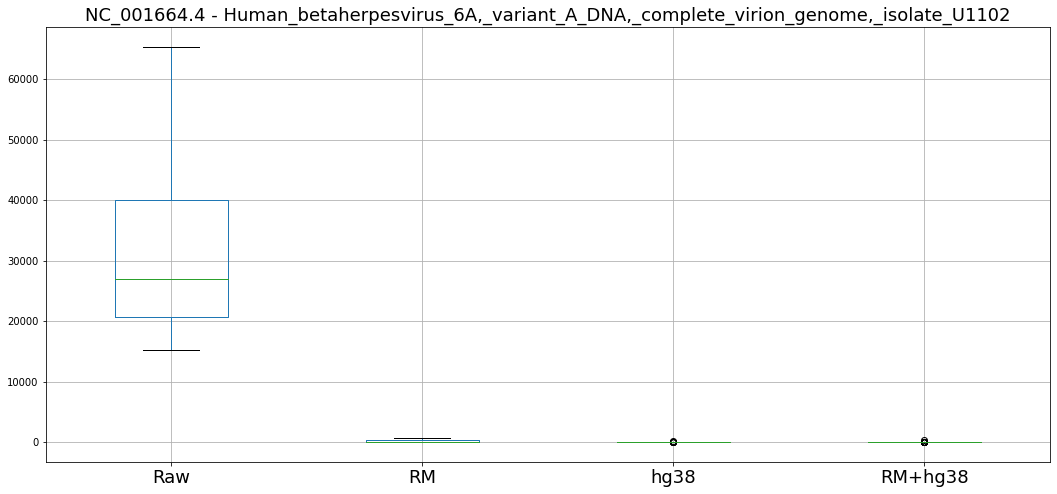

raw      NC_001716.2    1.624973e+06
RM       NC_001716.2    8.367647e+06
hg38     NC_001716.2    4.293857e+04
RM+hg38  NC_001716.2    2.558721e+02
dtype: float64


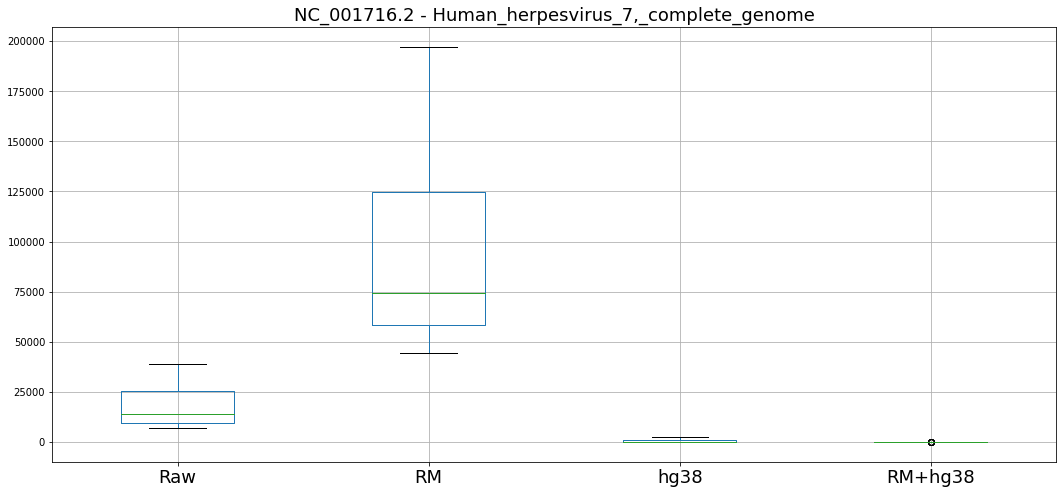

raw      NC_001798.2    164965.613197
RM       NC_001798.2     30393.363107
hg38     NC_001798.2      2147.868967
RM+hg38  NC_001798.2      1426.117607
dtype: float64


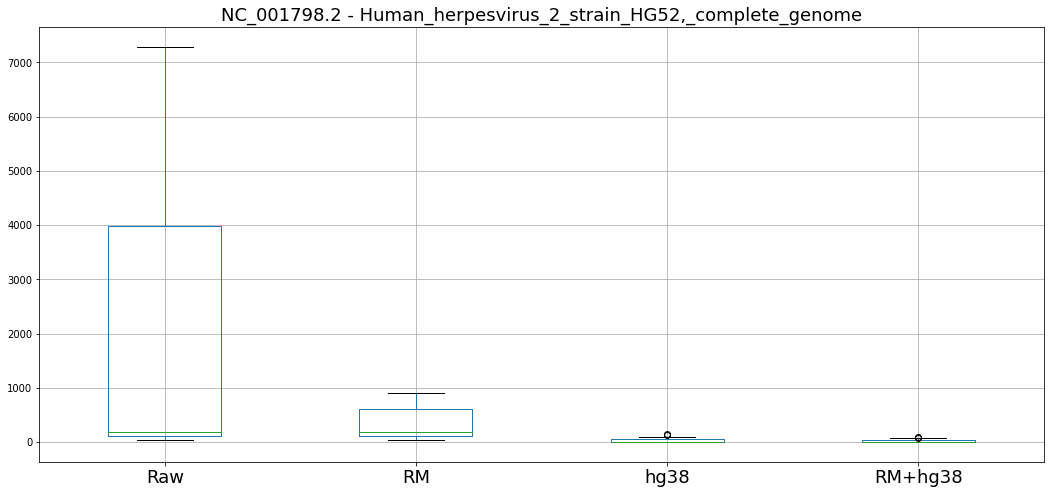

raw      NC_001806.2    87578.253625
RM       NC_001806.2     5071.329570
hg38     NC_001806.2    23075.593621
RM+hg38  NC_001806.2      552.233476
dtype: float64


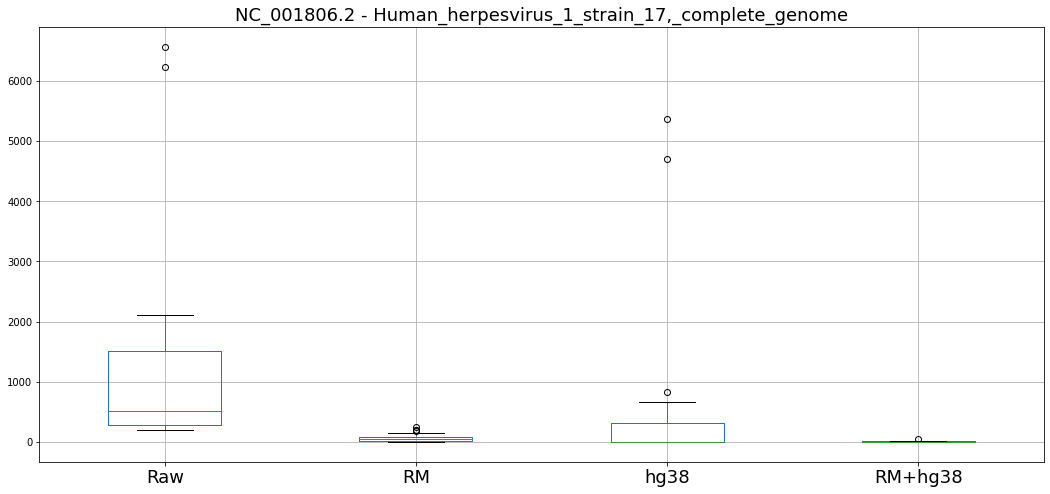

raw      NC_006273.2    5034.814709
RM       NC_006273.2      74.743519
hg38     NC_006273.2     161.350784
RM+hg38  NC_006273.2      74.743519
dtype: float64


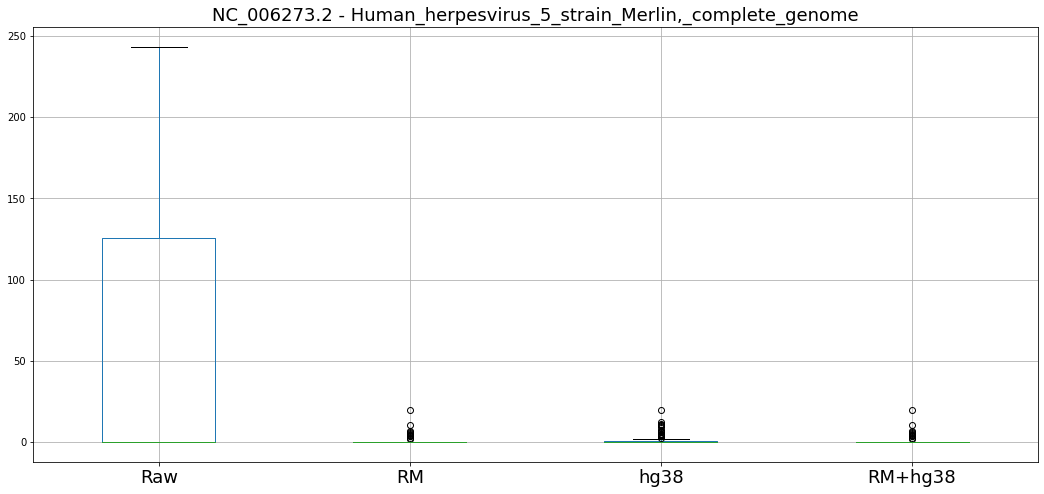

raw      NC_006577.2    140.971806
RM       NC_006577.2    140.971806
hg38     NC_006577.2     29.838885
RM+hg38  NC_006577.2     29.838885
dtype: float64


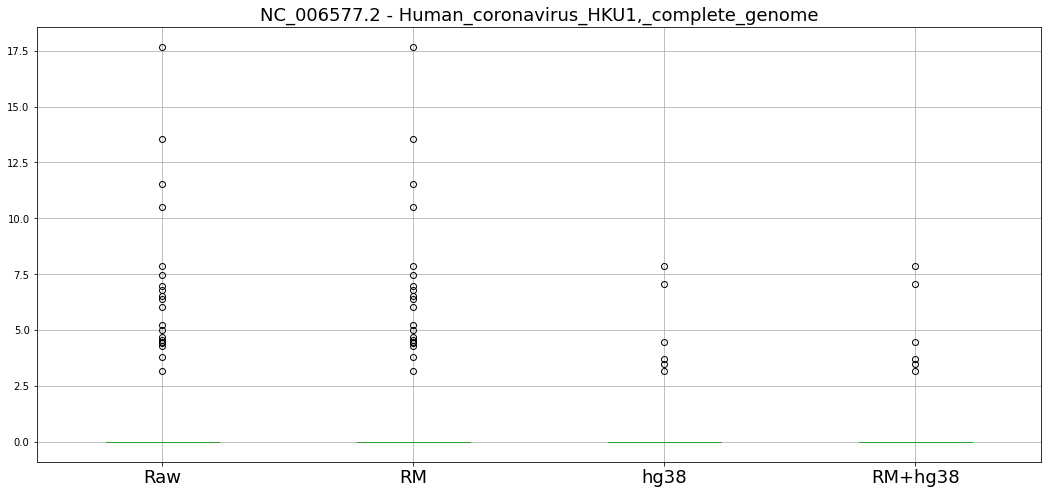

raw      NC_007605.1    73182.369461
RM       NC_007605.1    69690.950633
hg38     NC_007605.1      260.992700
RM+hg38  NC_007605.1      234.947093
dtype: float64


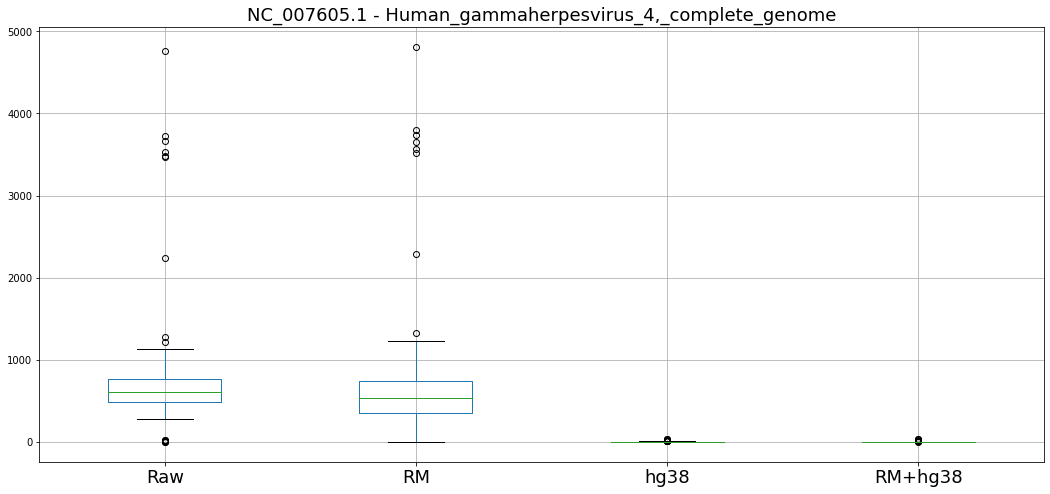

raw      NC_009333.1    15281.341621
RM       NC_009333.1    12444.514169
hg38     NC_009333.1     3897.967866
RM+hg38  NC_009333.1      928.914371
dtype: float64


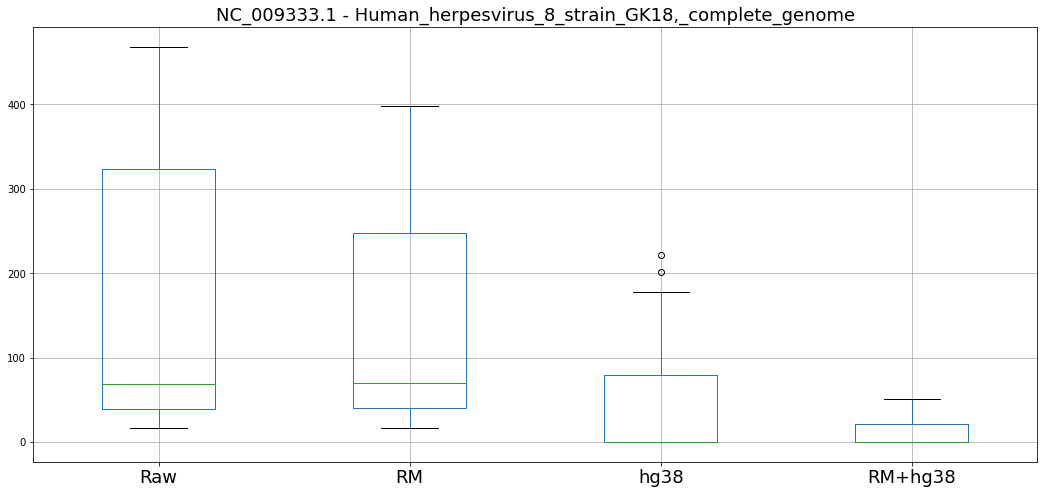

raw      NC_009334.1    400.325479
RM       NC_009334.1    194.083820
hg38     NC_009334.1    392.890291
RM+hg38  NC_009334.1    182.233455
dtype: float64


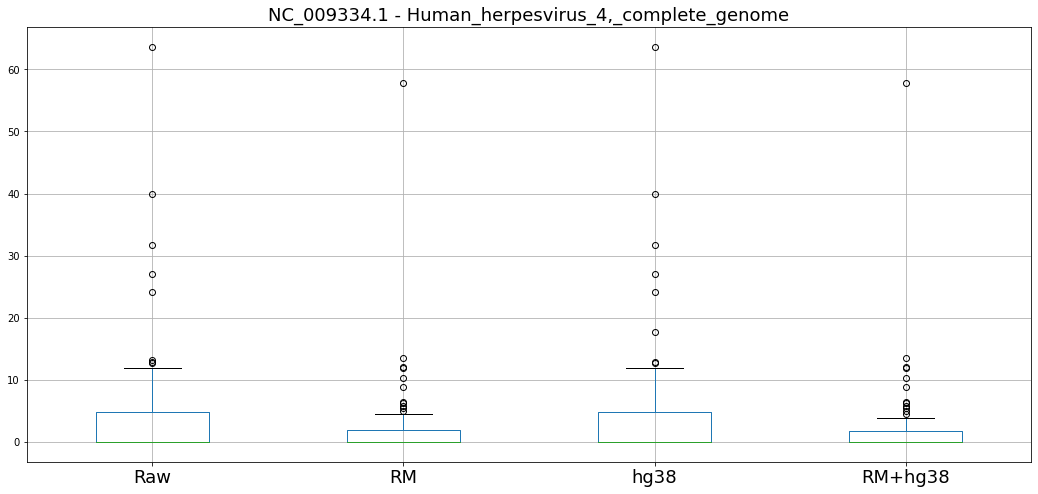

raw      NC_011203.1    460.773192
RM       NC_011203.1      5.452855
hg38     NC_011203.1    452.822445
RM+hg38  NC_011203.1      5.452855
dtype: float64


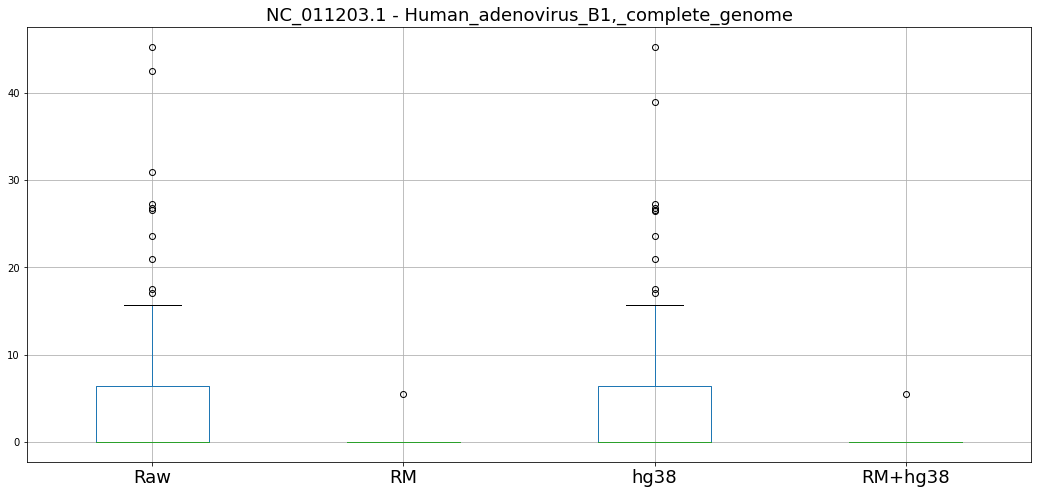

raw      NC_020890.1    41.835731
RM       NC_020890.1    41.835731
hg38     NC_020890.1     3.505270
RM+hg38  NC_020890.1     3.505270
dtype: float64


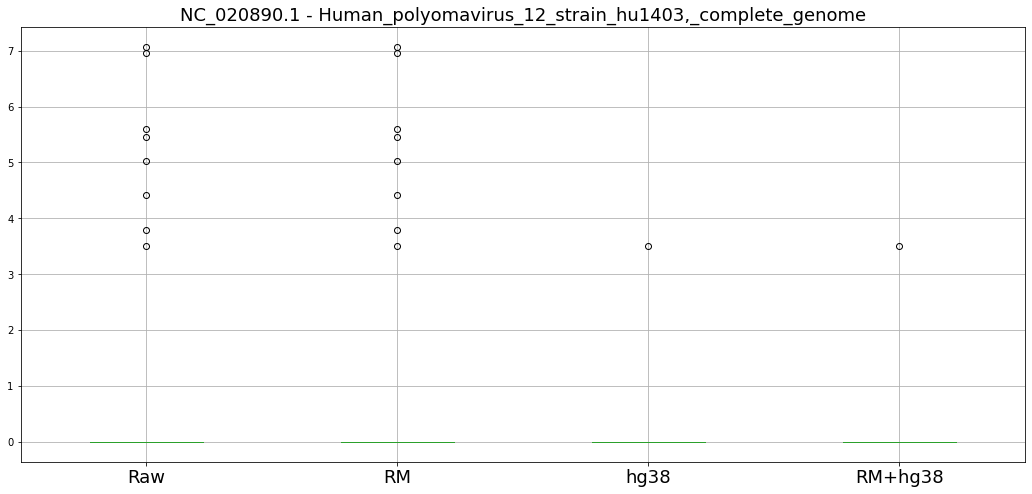

raw      NC_028459.1    221.259387
RM       NC_028459.1      0.000000
hg38     NC_028459.1      0.000000
RM+hg38  NC_028459.1      0.000000
dtype: float64


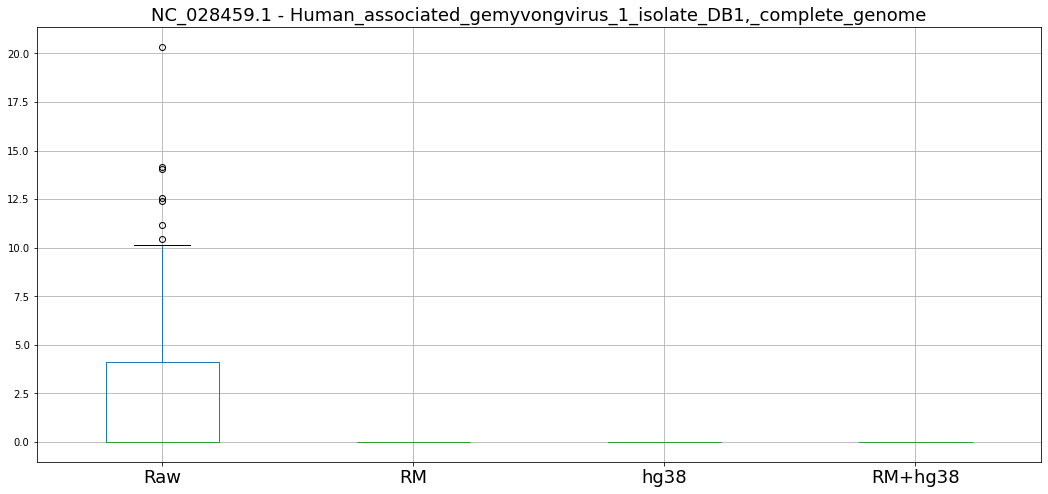

raw      NC_038889.1    17.434631
RM       NC_038889.1     5.775401
hg38     NC_038889.1    17.434631
RM+hg38  NC_038889.1     5.775401
dtype: float64


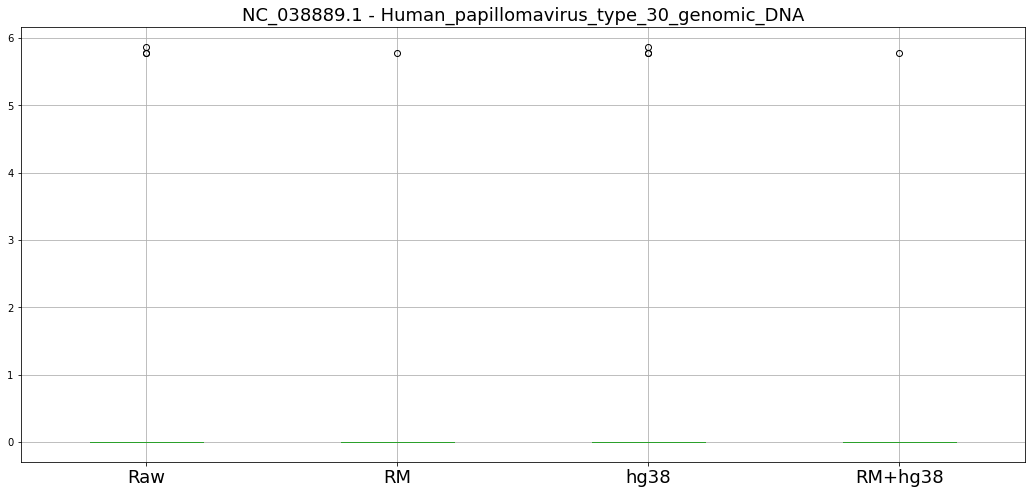

In [26]:
#for accession in viruses['accession']:
#    print(accession)
for index, row in viruses.iterrows():
    accession=row['accession']
    description=row['description']
    if( df.iloc[:, df.columns.get_level_values(1)==accession].sum()['raw',accession] > 0 ):
        print(df.iloc[:, df.columns.get_level_values(1)==accession].sum())
        tmp=df.iloc[:, df.columns.get_level_values(1)==accession]
        tmp.columns=["Raw","RM","hg38","RM+hg38"]
        tmp.boxplot()
        plt.title(accession+ " - " + description,fontsize = 18)
        plt.xticks(fontsize = 18)
        plt.show()

In [27]:
# Why is RM higher than raw here and nowhere else?
# View a few bam files and compare

df.iloc[:, df.columns.get_level_values(1)=='NC_001716.2'].sum()

raw      NC_001716.2    1.624973e+06
RM       NC_001716.2    8.367647e+06
hg38     NC_001716.2    4.293857e+04
RM+hg38  NC_001716.2    2.558721e+02
dtype: float64

In [28]:
df.iloc[:, df.columns.get_level_values(1)=='NC_001716.2']

raw             RM  \
                                                 NC_001716.2    NC_001716.2   
sample               read count average length                                
02-2485-10A-01D-1494 478851061  101              9689.860539   61378.166185   
06-0125-10A-01D-1490 695377506  101              9573.217342   55948.027747   
06-0157-10A-01D-1491 561676819  101             10151.745287   60871.303289   
06-0171-10A-01D-A33C 721570484  101             10449.429636   63171.929854   
06-0190-10B-01D-A32W 522679939  101             10243.362334   57503.641822   
06-0210-10A-01D-1491 628825315  101              9245.810977   57383.185981   
06-0211-10A-01D-1491 762041774  101              9339.383014   51539.169295   
06-0214-10A-01D-1491 573345114  101              9277.134958   59029.019649   
06-0221-10A-01D-A35R 526268055  101              9339.347037   53449.947670   
06-0686-10A-01D-1492 517085243  101              8669.750415   55979.164735   
06-0744-10A-01D-1492 525266861  101             10050.129547   61781.929167   
06-0745-10A-01D-1492 578518639  101             11674.645456   69422.136631   
06-2557-10A-01D-1494 600988206  101              8887.029640   52538.468617   
06-2570-10A-01D-1495 551419838  101             10587.214311   65884.463156   
06-5411-10A-01D-1696 534161551  101              8898.057135   59234.888660   
06-5415-10A-01D-1486 546555827  101              8632.238039   54609.243055   
14-1034-10A-01D-1492 736829067  101              8347.933429   47289.122485   
14-1402-10A-01D-1493 663610781  101              7646.048174   44274.446470   
14-1823-10A-01D-1494 542116190  101             10182.319034   60581.109005   
14-2554-10A-01D-1494 578717037  101              9718.048097   60072.535933   
15-1444-10A-01D-1696 570946912  101              9916.858960   61021.435212   
19-1389-10D-01D-2364 539674851  101             13900.962748   70518.387006   
19-2620-10A-01D-1495 529069197  101             10669.681834   61942.748105   
19-2624-10A-01D-1495 587795591  101              9152.841706   58214.114777   
19-2629-10A-01D-1495 578708416  101              9149.685496   58288.421366   
19-5960-10A-01D-1696 573553833  101             10042.649301   57738.259418   
26-5132-10A-01D-1486 580130149  101              7067.379634   44933.020711   
26-5135-10A-01D-1486 594225295  101              7268.287022   47108.395142   
27-1831-10A-01D-1494 533727503  101              7516.944466   49026.890788   
27-2523-10A-01D-1494 520322332  101              9588.287285   56366.982919   
27-2528-10A-01D-1494 575203420  101              7713.792800   47790.049649   
32-1970-10A-01D-1494 650616219  101              7757.261274   48970.497614   
41-5651-10A-01D-1696 579574120  101              9379.300787   58303.155427   
CS-4938-10A-01D-1891 80646805   51              34558.095637  197230.380050   
CS-4941-10A-01D-1465 282839817  51              16415.651973   61289.107679   
CS-4944-10A-01D-1465 263101470  51              22956.922286  109315.238718   
CS-5390-10A-01D-1468 529225224  101              8599.363359   58755.702846   
CS-5395-10A-01D-1468 581221288  101              8530.313845   54960.134220   
CS-5396-10A-01D-1465 254110921  51              17925.242969   86824.288831   
CS-6186-10A-01D-2022 153624698  51              22333.648461  119199.583390   
CS-6186-10A-01D-2024 365922343  151             21143.830509  103929.155263   
CS-6290-10A-01D-1703 233757121  51              29607.654177  147306.742369   
CS-6665-10A-01D-1893 343696933  151             24544.880067  122925.158602   
CS-6668-10A-01D-1893 533768229  101             12209.419081   78440.412384   
CS-6669-10A-01D-1893 527765133  101             10722.572687   74415.677627   
DB-5273-10A-01D-1465 159579489  51              28825.759681  160296.289707   
DB-5276-10A-01D-1465 285284737  51              22682.601488   87228.641328   
DB-5278-10A-01D-1468 549321938  101             10520.242503   65509.854078   
DB-5279-10A-01D-1465 2135845

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


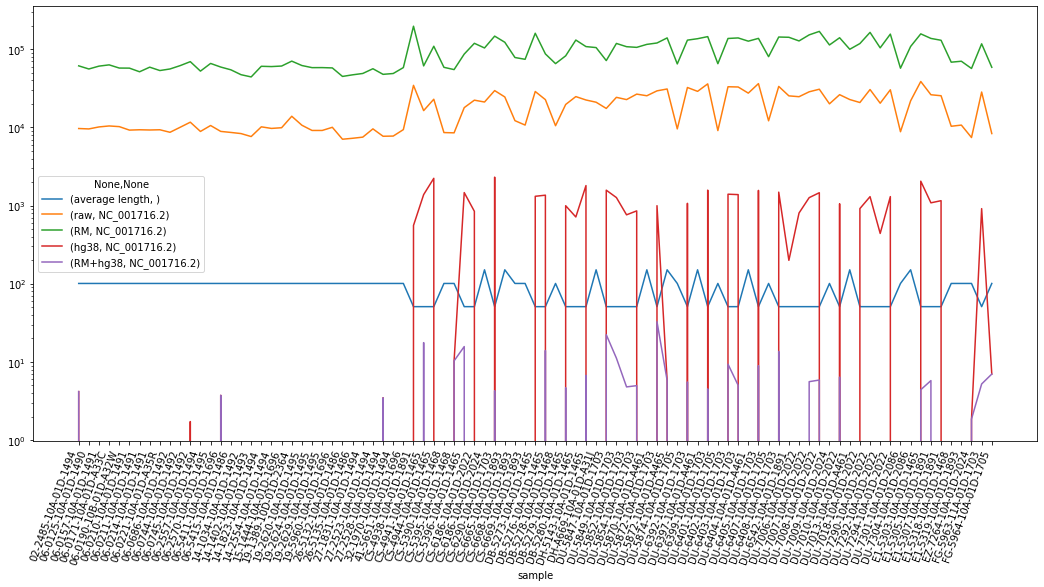

In [29]:
data=df.iloc[:, df.columns.get_level_values(1)=='NC_001716.2']

ax=data.reset_index().drop('read count',axis='columns').set_index('sample').plot(logy=True)

ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.index.get_level_values(0))

plt.xticks(rotation=70,ha='right')
plt.show()


/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


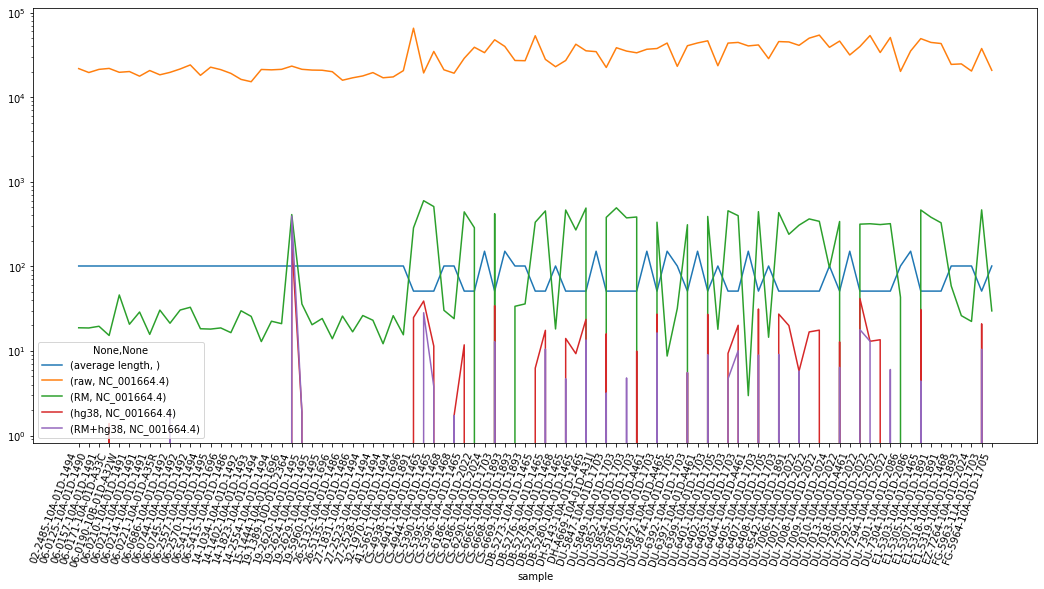

In [30]:
data=df.iloc[:, df.columns.get_level_values(1)=='NC_001664.4']

ax=data.reset_index().drop('read count',axis='columns').set_index('sample').plot(logy=True)

ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.index.get_level_values(0))

plt.xticks(rotation=70,ha='right')
plt.show()


Note that the shorter reads have a higher alignment count.

Hard to compare different read length results.

raw      AC_000005.1    93.011703
RM       AC_000005.1    20.954050
hg38     AC_000005.1    88.330597
RM+hg38  AC_000005.1    20.954050
dtype: float64


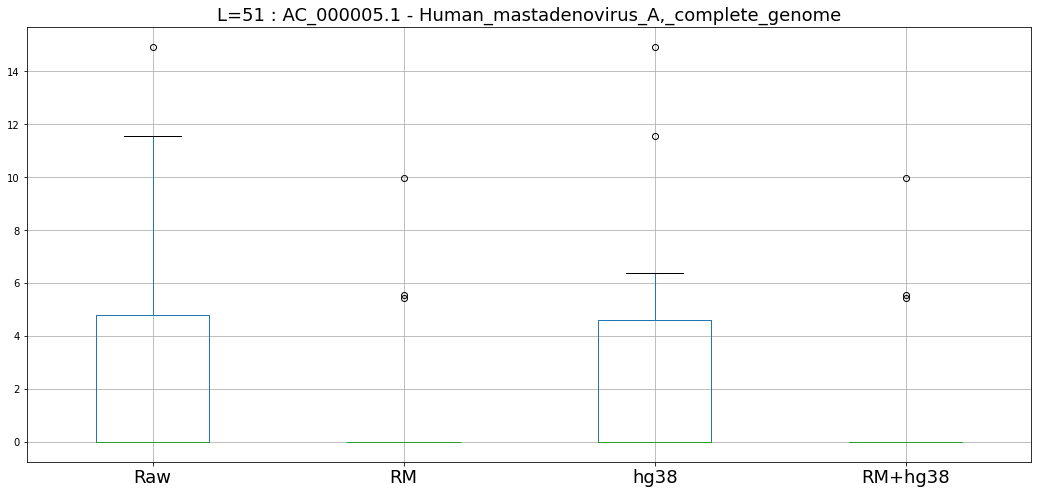

raw      AC_000007.1    4752.115388
RM       AC_000007.1       8.482802
hg38     AC_000007.1       8.482802
RM+hg38  AC_000007.1       8.482802
dtype: float64


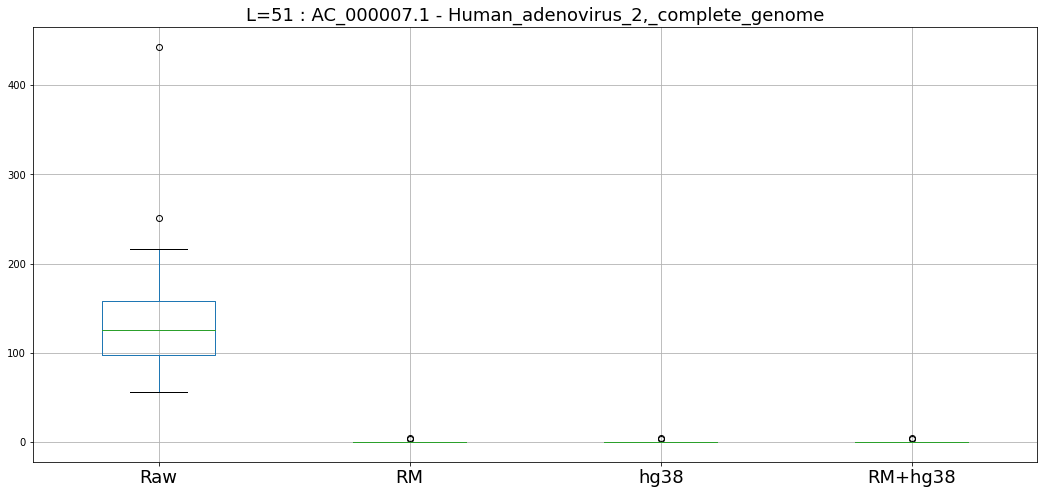

raw      AC_000017.1    467.457473
RM       AC_000017.1     40.955212
hg38     AC_000017.1     52.050769
RM+hg38  AC_000017.1     16.070943
dtype: float64


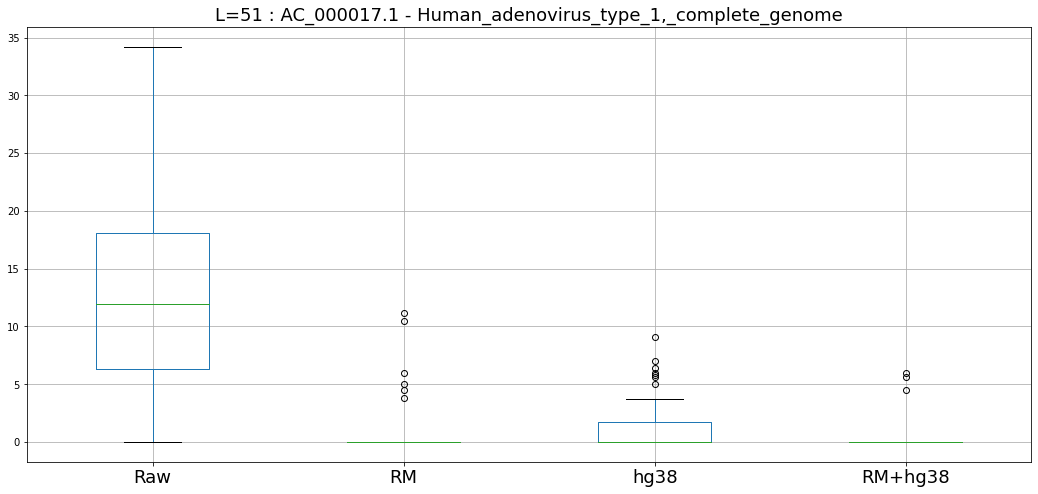

raw      AC_000018.1    38.894123
RM       AC_000018.1     0.000000
hg38     AC_000018.1    38.894123
RM+hg38  AC_000018.1     0.000000
dtype: float64


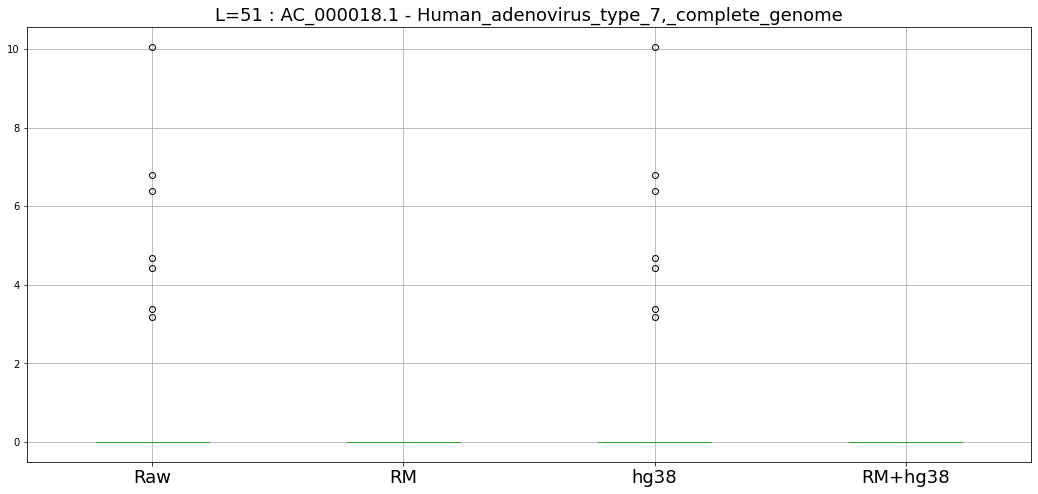

raw      AC_000019.1    35.005179
RM       AC_000019.1    35.004973
hg38     AC_000019.1    20.108013
RM+hg38  AC_000019.1    20.107808
dtype: float64


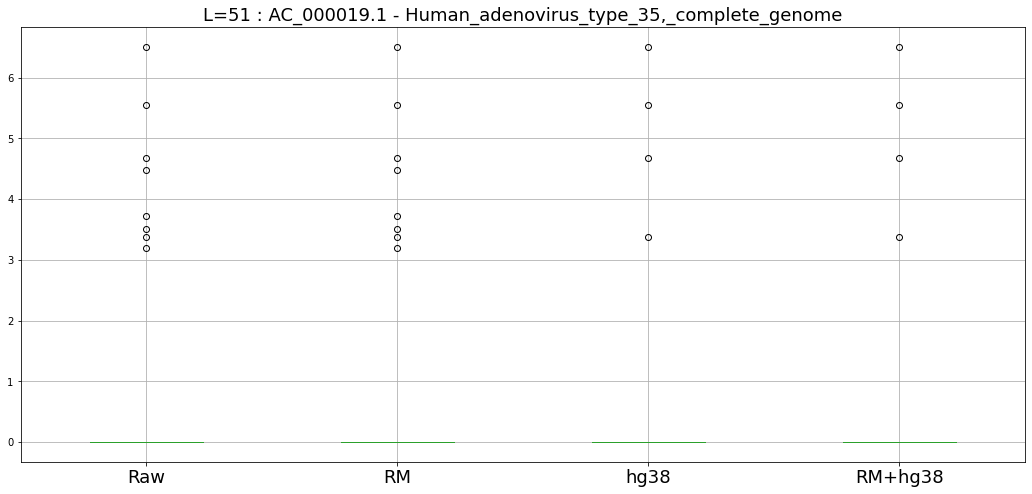

raw      NC_000898.1    2.209277e+06
RM       NC_000898.1    3.036341e+03
hg38     NC_000898.1    3.111173e+02
RM+hg38  NC_000898.1    1.622003e+02
dtype: float64


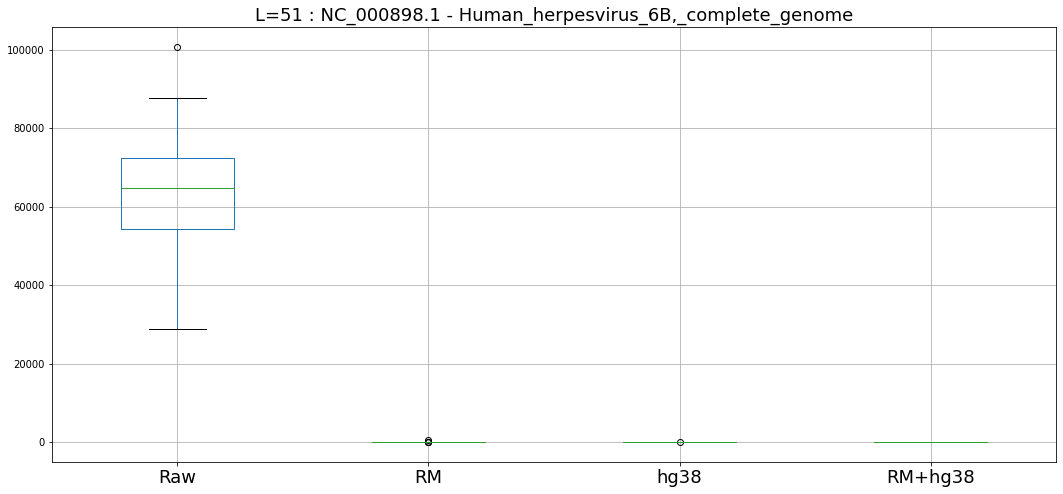

raw      NC_000898.1    1.476863e+06
RM       NC_000898.1    5.487852e+04
hg38     NC_000898.1    5.511085e+04
RM+hg38  NC_000898.1    5.444749e+04
dtype: float64


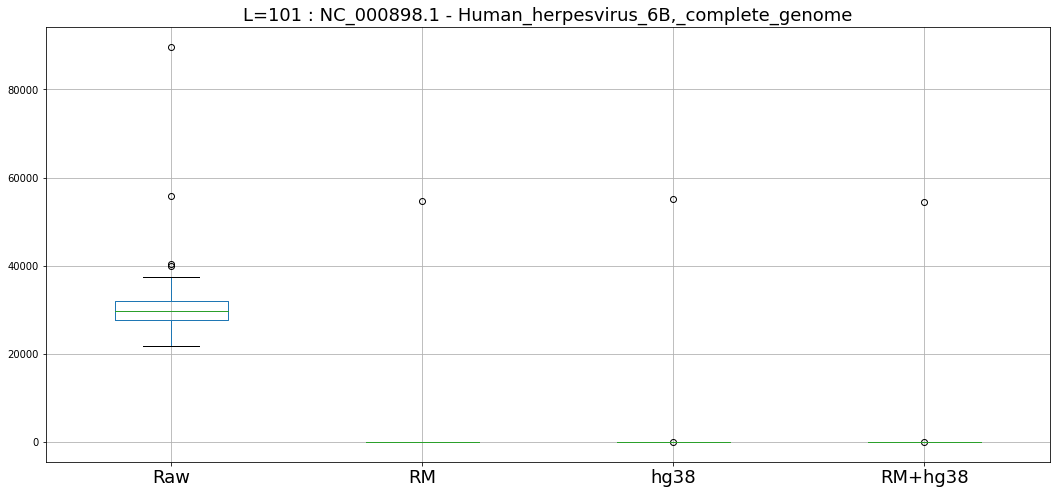

raw      NC_000898.1    512661.872614
RM       NC_000898.1         5.790998
hg38     NC_000898.1         0.000000
RM+hg38  NC_000898.1         0.000000
dtype: float64


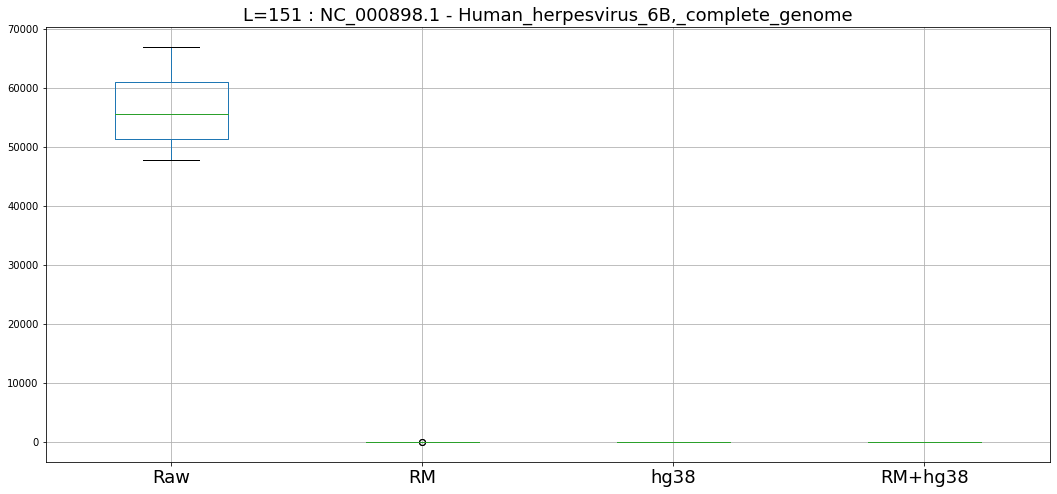

raw      NC_001357.1    1163.487332
RM       NC_001357.1    1163.487332
hg38     NC_001357.1       0.000000
RM+hg38  NC_001357.1       0.000000
dtype: float64


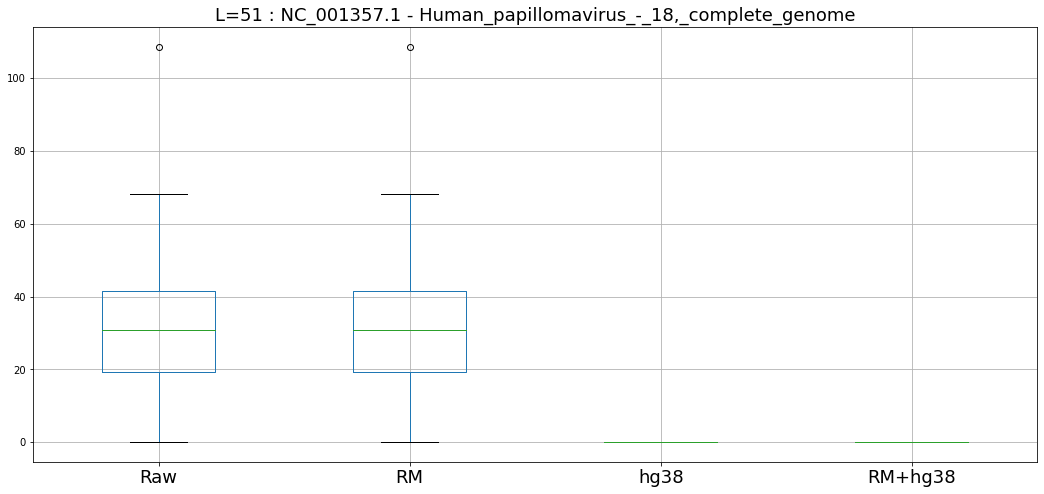

raw      NC_001405.1    4604.379549
RM       NC_001405.1       3.728157
hg38     NC_001405.1       3.728157
RM+hg38  NC_001405.1       3.728157
dtype: float64


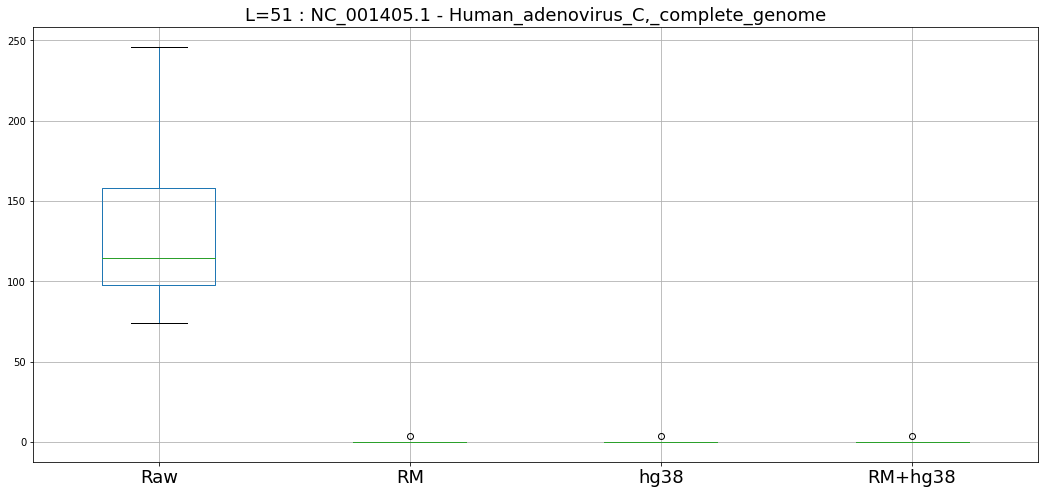

raw      NC_001460.1    53.269027
RM       NC_001460.1     8.959050
hg38     NC_001460.1    57.950133
RM+hg38  NC_001460.1     8.959050
dtype: float64


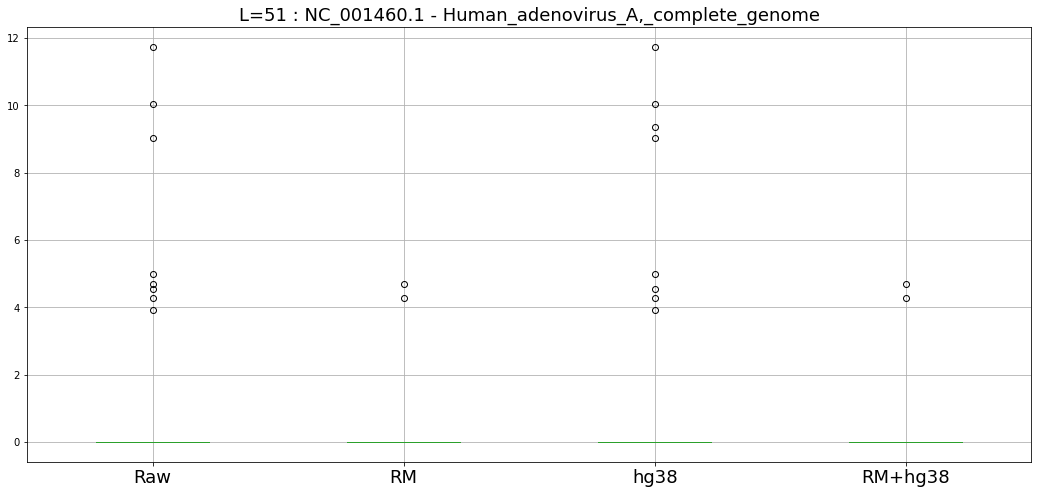

raw      NC_001587.1    241.787777
RM       NC_001587.1      0.000000
hg38     NC_001587.1      0.000000
RM+hg38  NC_001587.1      0.000000
dtype: float64


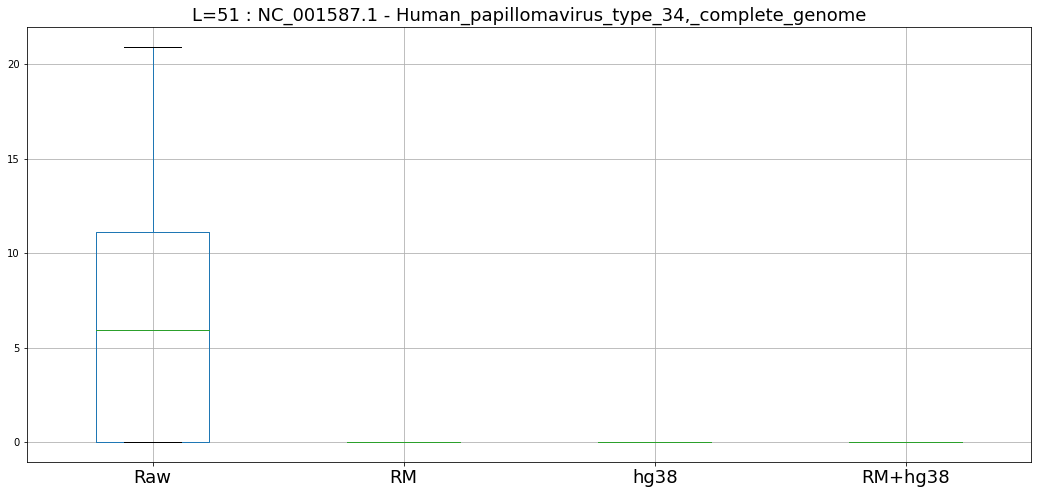

raw      NC_001664.4    1.437699e+06
RM       NC_001664.4    1.342556e+04
hg38     NC_001664.4    5.588037e+02
RM+hg38  NC_001664.4    2.092904e+02
dtype: float64


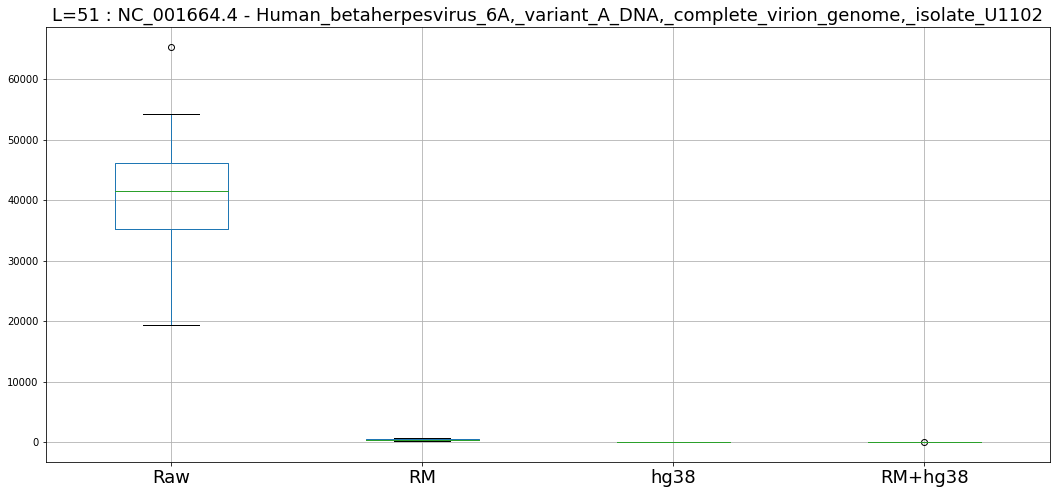

raw      NC_001664.4    995825.662150
RM       NC_001664.4      1614.694798
hg38     NC_001664.4       205.197941
RM+hg38  NC_001664.4       398.373670
dtype: float64


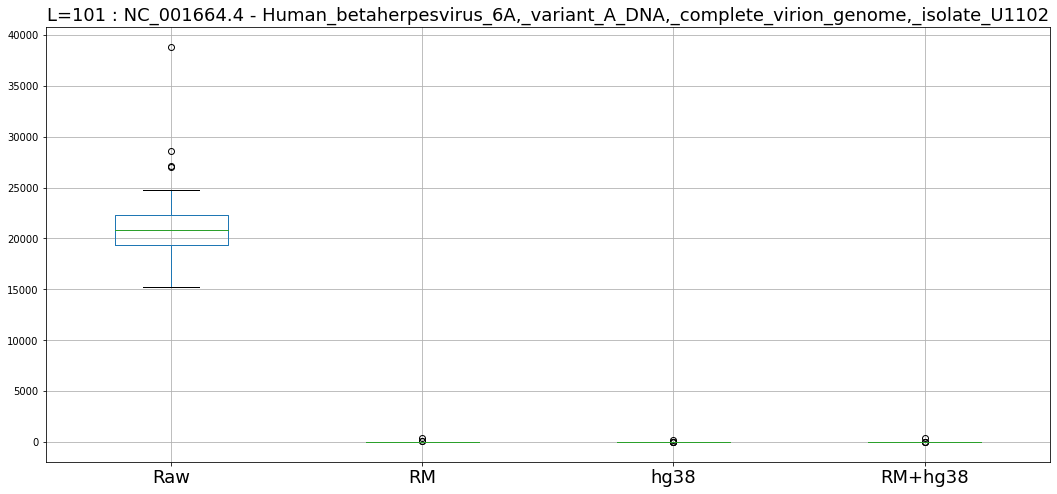

raw      NC_001664.4    339274.079907
RM       NC_001664.4        11.670480
hg38     NC_001664.4         0.000000
RM+hg38  NC_001664.4         0.000000
dtype: float64


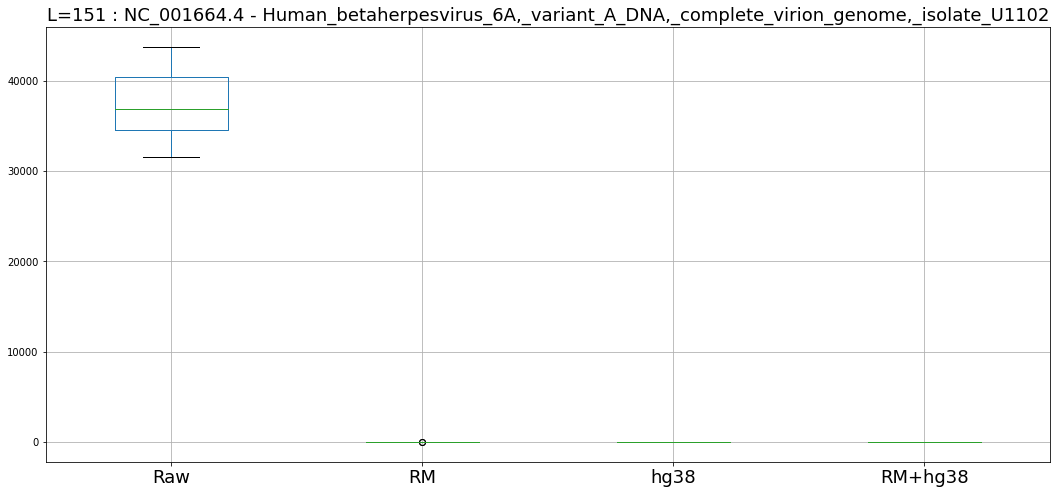

raw      NC_001716.2    9.438309e+05
RM       NC_001716.2    4.468332e+06
hg38     NC_001716.2    4.290045e+04
RM+hg38  NC_001716.2    2.194834e+02
dtype: float64


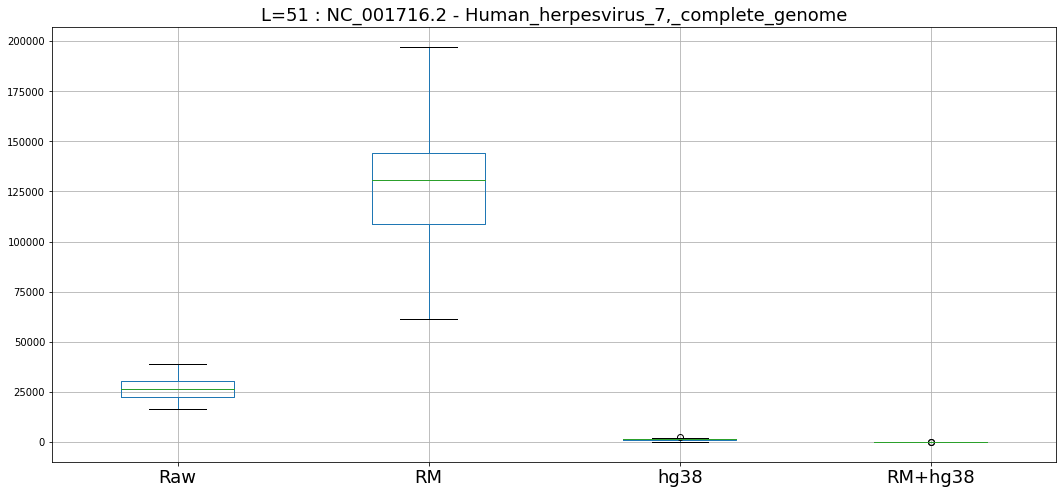

raw      NC_001716.2    4.568790e+05
RM       NC_001716.2    2.840037e+06
hg38     NC_001716.2    3.231301e+01
RM+hg38  NC_001716.2    3.058446e+01
dtype: float64


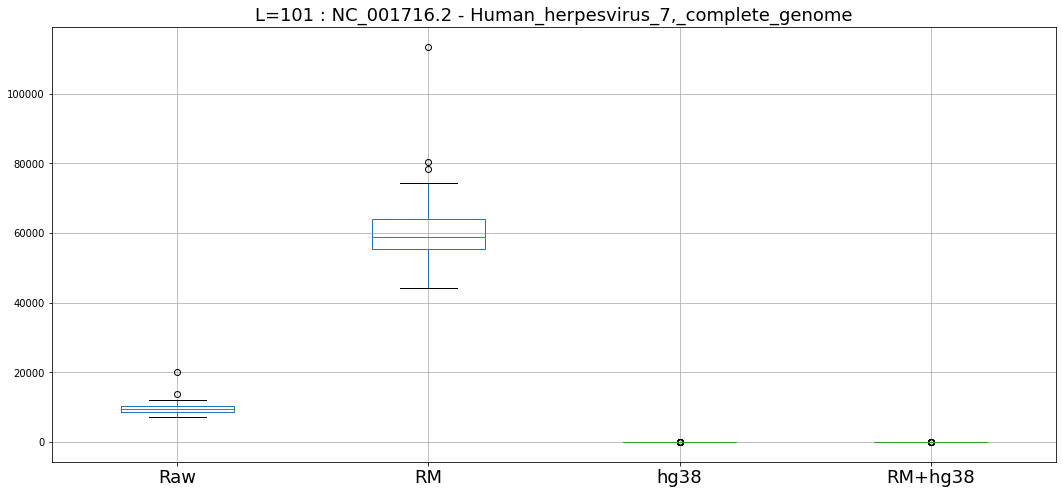

raw      NC_001716.2    2.242630e+05
RM       NC_001716.2    1.059279e+06
hg38     NC_001716.2    5.804236e+00
RM+hg38  NC_001716.2    5.804236e+00
dtype: float64


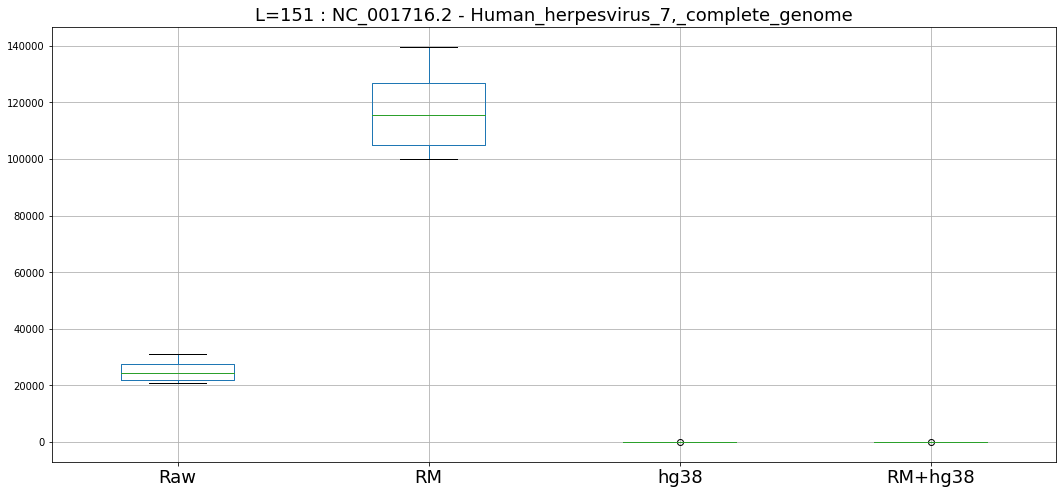

raw      NC_001798.2    156817.124482
RM       NC_001798.2     22351.038756
hg38     NC_001798.2      2110.995503
RM+hg38  NC_001798.2      1389.244144
dtype: float64


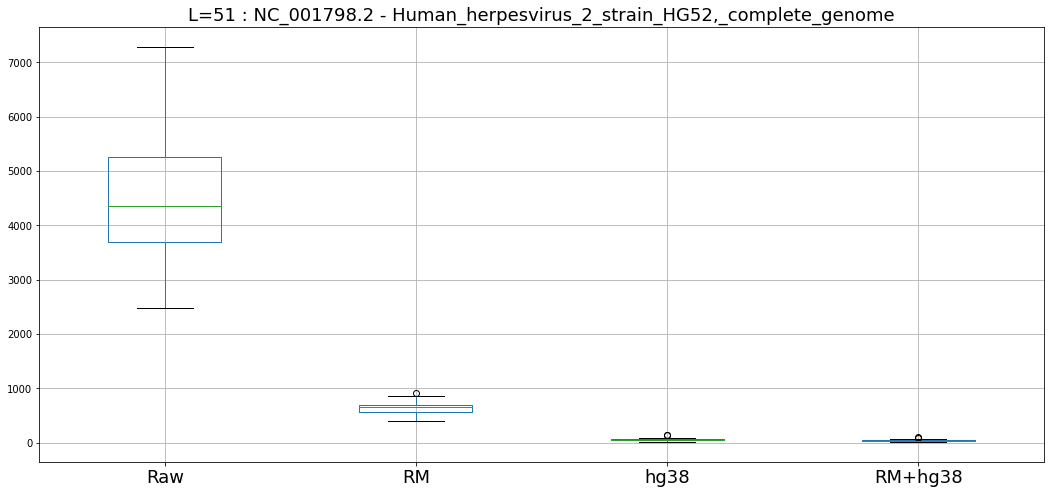

raw      NC_001798.2    7393.198166
RM       NC_001798.2    7252.115938
hg38     NC_001798.2      33.969793
RM+hg38  NC_001798.2      33.969793
dtype: float64


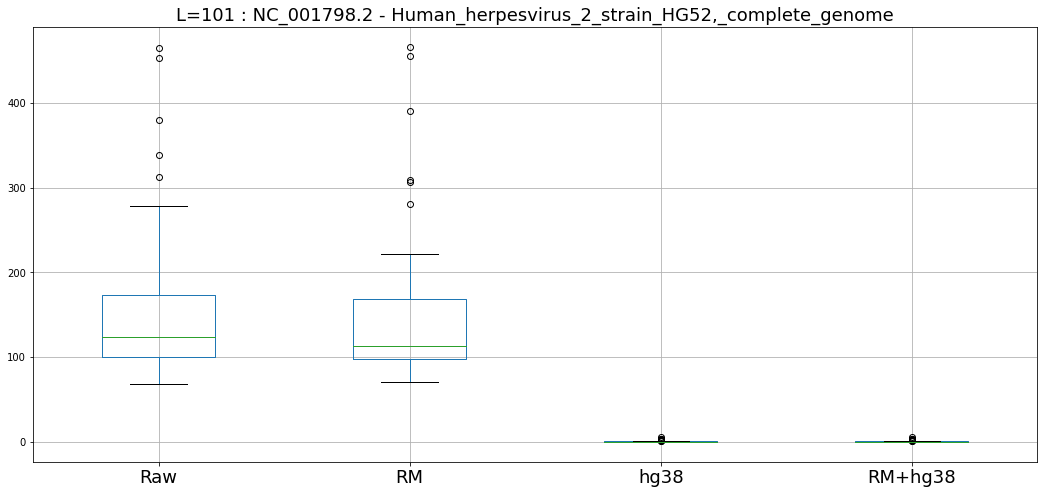

raw      NC_001798.2    755.290549
RM       NC_001798.2    790.208413
hg38     NC_001798.2      2.903670
RM+hg38  NC_001798.2      2.903670
dtype: float64


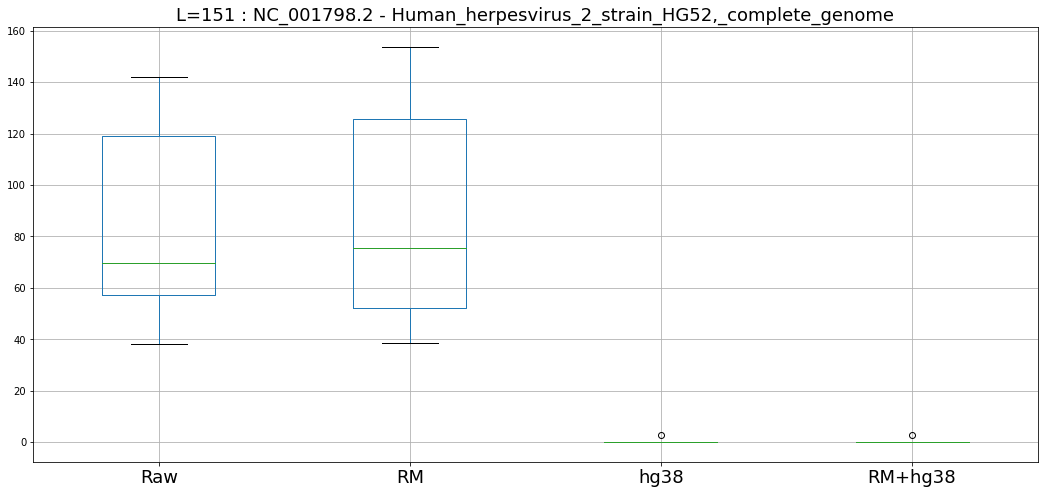

raw      NC_001806.2    63517.418989
RM       NC_001806.2     2266.858114
hg38     NC_001806.2    22888.298160
RM+hg38  NC_001806.2      366.888778
dtype: float64


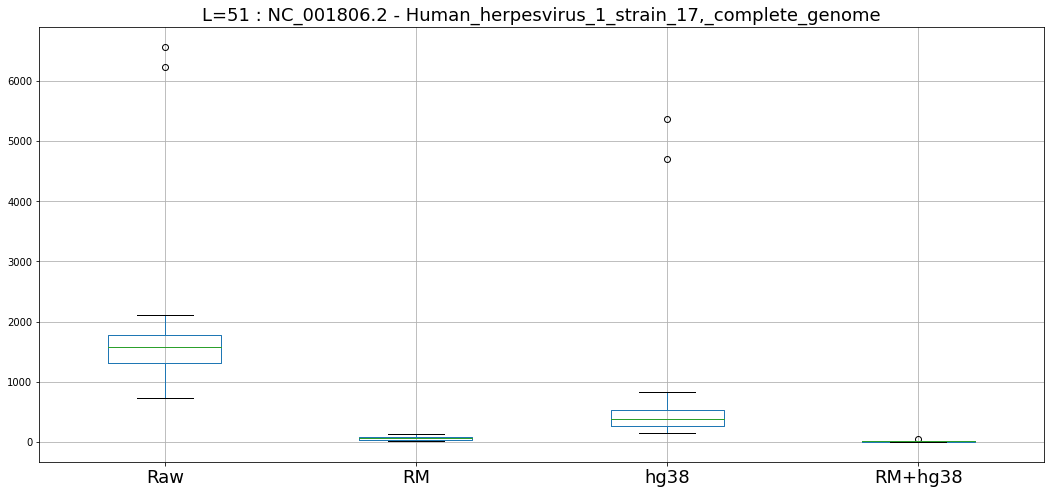

raw      NC_001806.2    19763.834399
RM       NC_001806.2     2178.036266
hg38     NC_001806.2      140.906720
RM+hg38  NC_001806.2      138.957510
dtype: float64


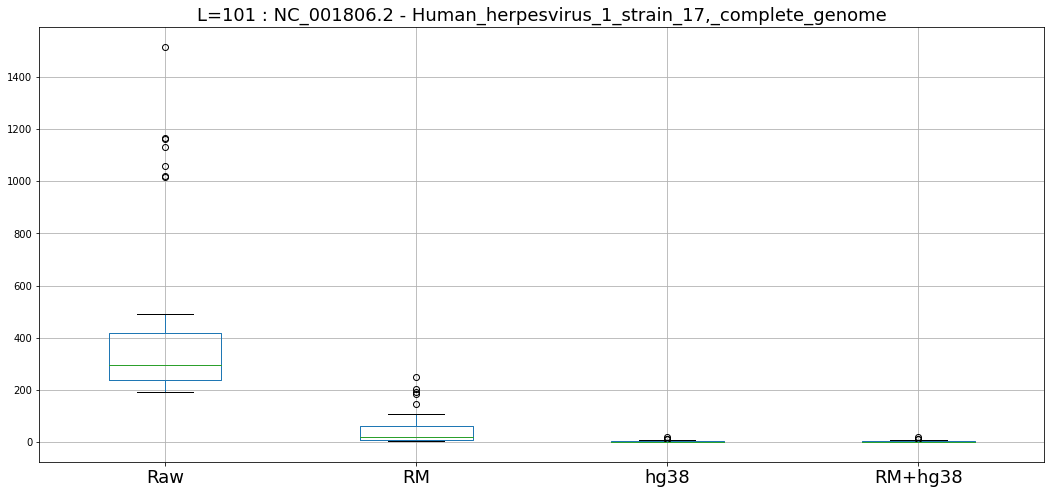

raw      NC_001806.2    4297.000236
RM       NC_001806.2     626.435190
hg38     NC_001806.2      46.388740
RM+hg38  NC_001806.2      46.387188
dtype: float64


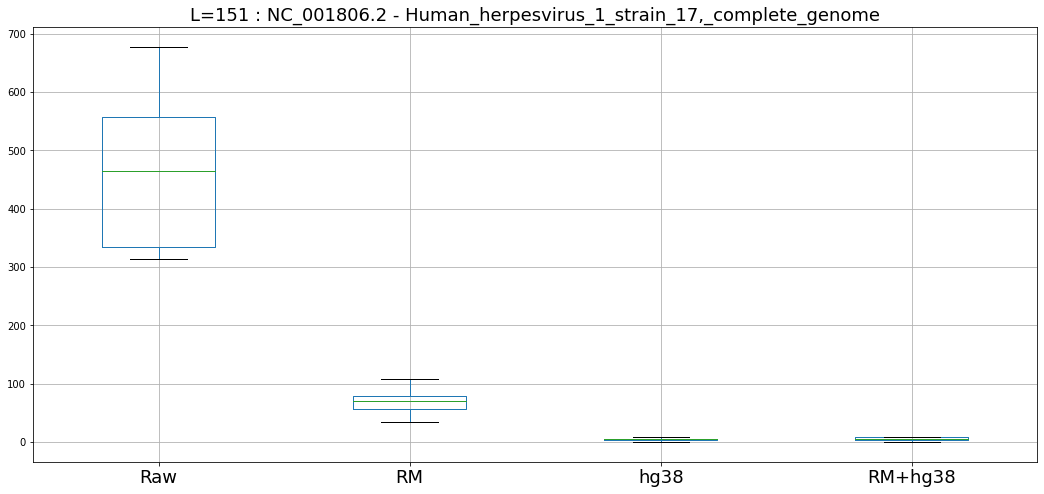

raw      NC_006273.2    5026.941265
RM       NC_006273.2      66.870076
hg38     NC_006273.2     153.477340
RM+hg38  NC_006273.2      66.870076
dtype: float64


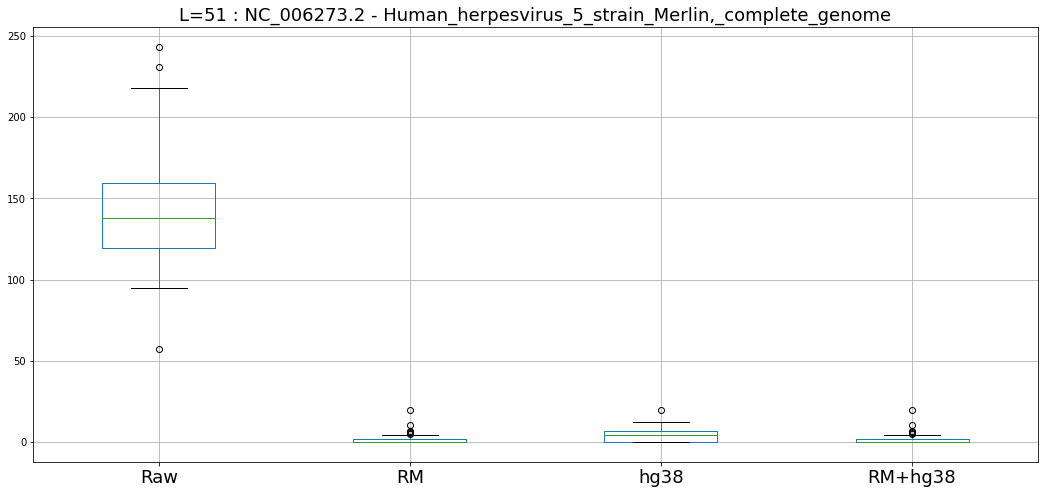

raw      NC_006273.2    7.873444
RM       NC_006273.2    7.873444
hg38     NC_006273.2    7.873444
RM+hg38  NC_006273.2    7.873444
dtype: float64


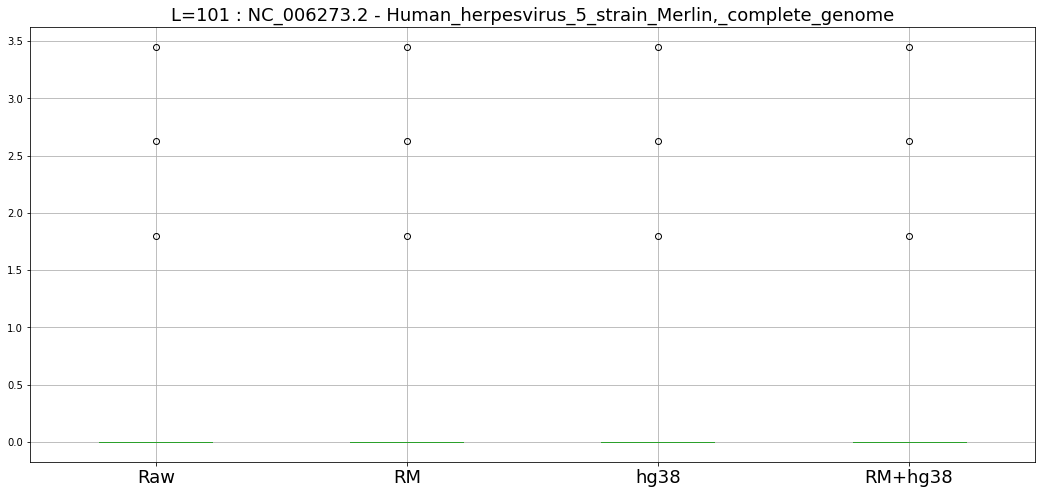

raw      NC_006577.2    140.971806
RM       NC_006577.2    140.971806
hg38     NC_006577.2     29.838885
RM+hg38  NC_006577.2     29.838885
dtype: float64


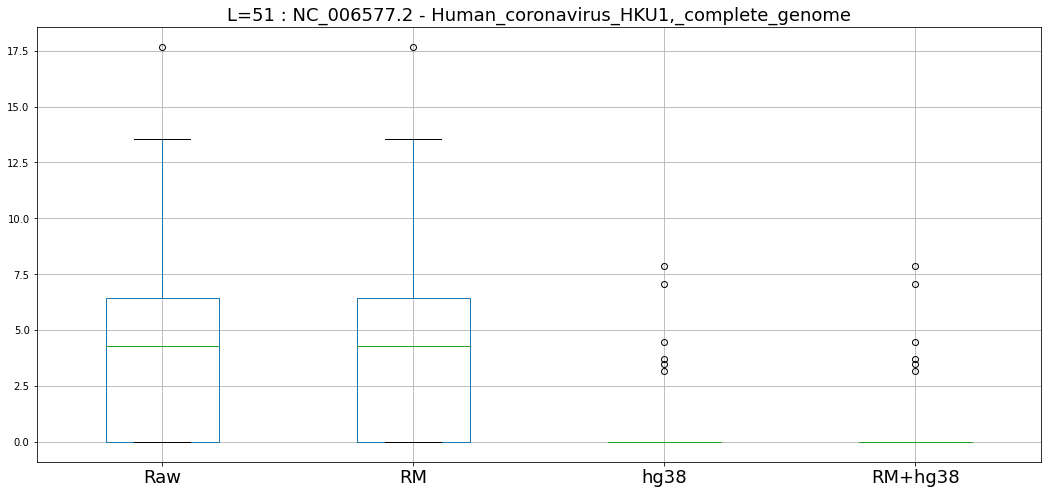

raw      NC_007605.1    18963.402300
RM       NC_007605.1    14649.786236
hg38     NC_007605.1      203.739145
RM+hg38  NC_007605.1      179.554930
dtype: float64


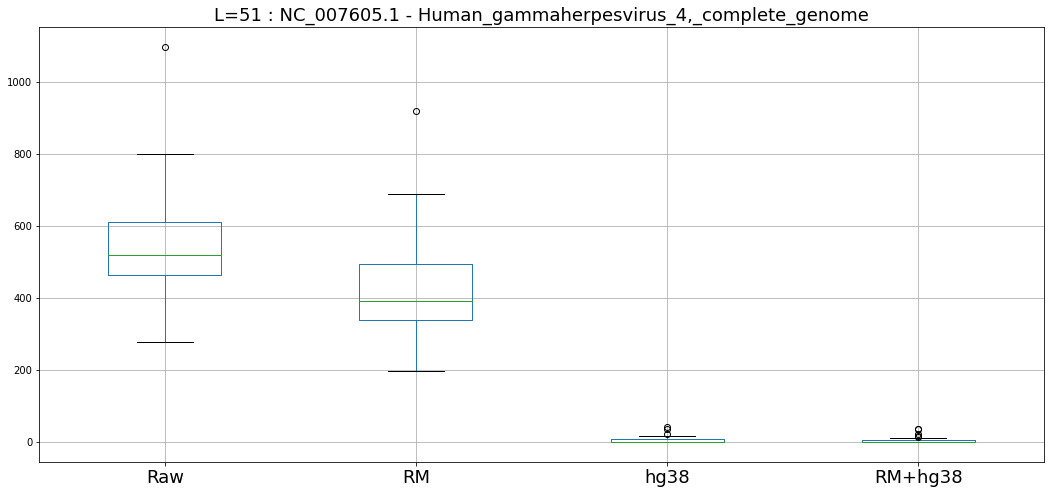

raw      NC_007605.1    54086.693226
RM       NC_007605.1    54891.364470
hg38     NC_007605.1       51.449320
RM+hg38  NC_007605.1       49.587927
dtype: float64


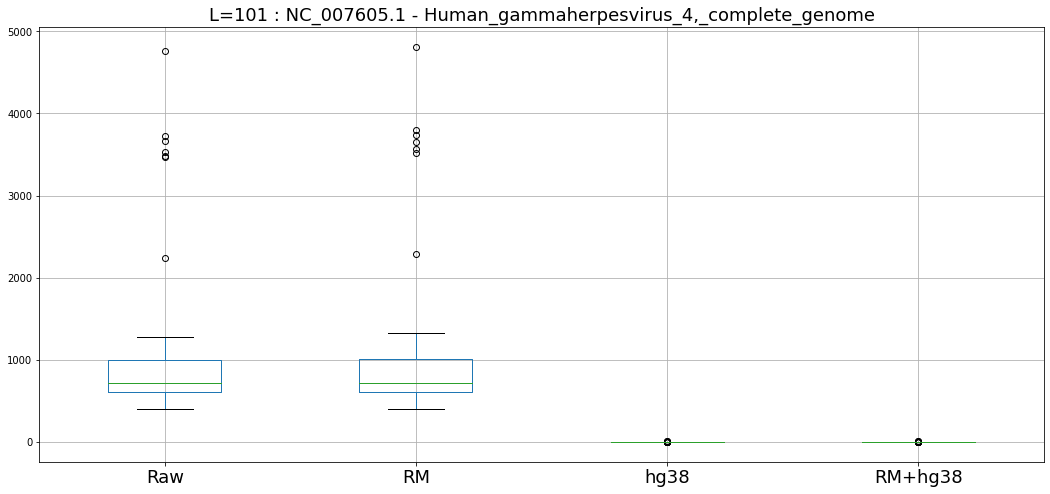

raw      NC_007605.1    132.273935
RM       NC_007605.1    149.799927
hg38     NC_007605.1      5.804236
RM+hg38  NC_007605.1      5.804236
dtype: float64


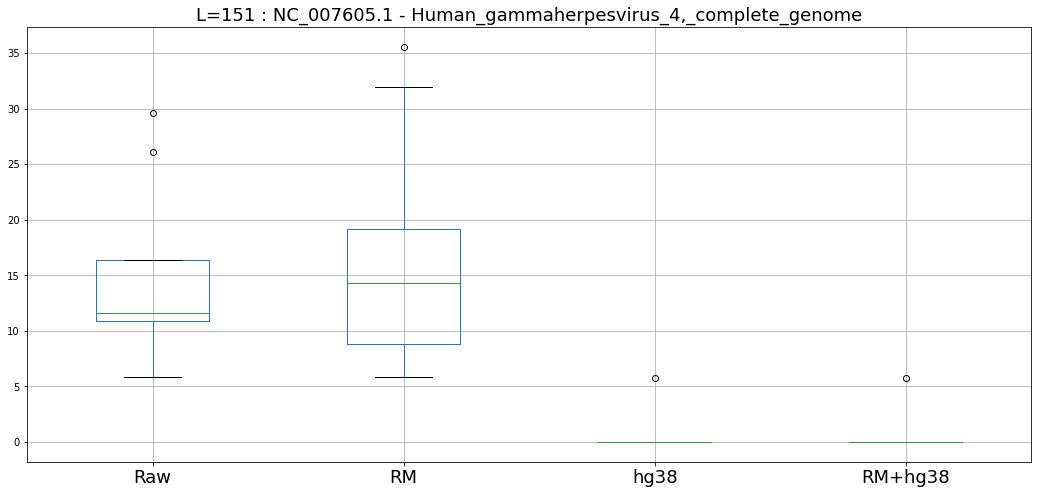

raw      NC_009333.1    12283.368940
RM       NC_009333.1     9408.750426
hg38     NC_009333.1     3884.055024
RM+hg38  NC_009333.1      912.913197
dtype: float64


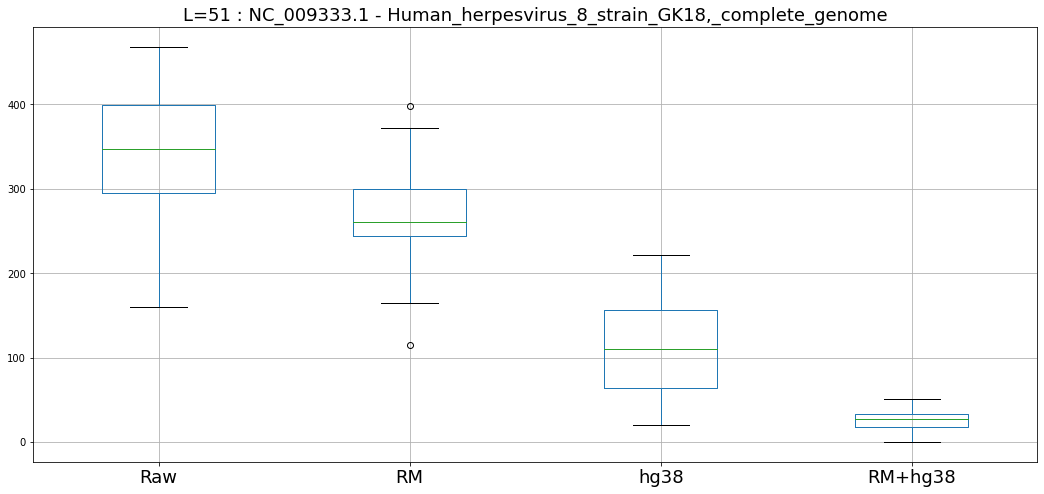

raw      NC_009333.1    2643.390265
RM       NC_009333.1    2672.783597
hg38     NC_009333.1      13.912842
RM+hg38  NC_009333.1      16.001174
dtype: float64


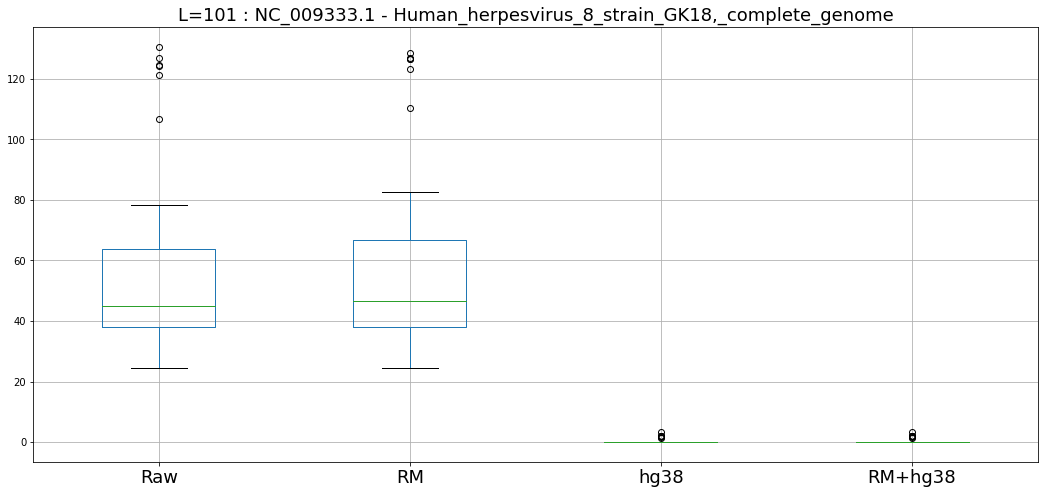

raw      NC_009333.1    354.582416
RM       NC_009333.1    362.980146
hg38     NC_009333.1      0.000000
RM+hg38  NC_009333.1      0.000000
dtype: float64


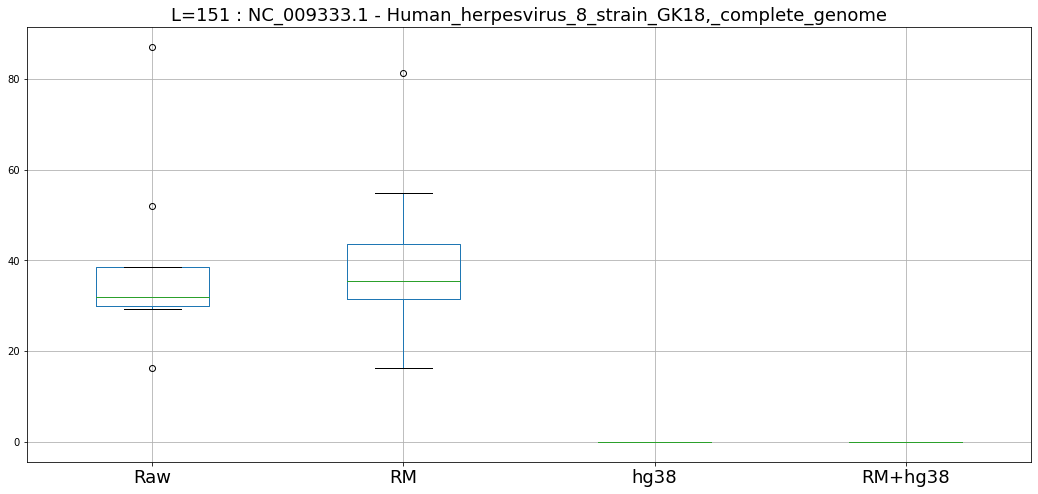

raw      NC_009334.1    346.236096
RM       NC_009334.1    139.994437
hg38     NC_009334.1    350.651273
RM+hg38  NC_009334.1    139.994437
dtype: float64


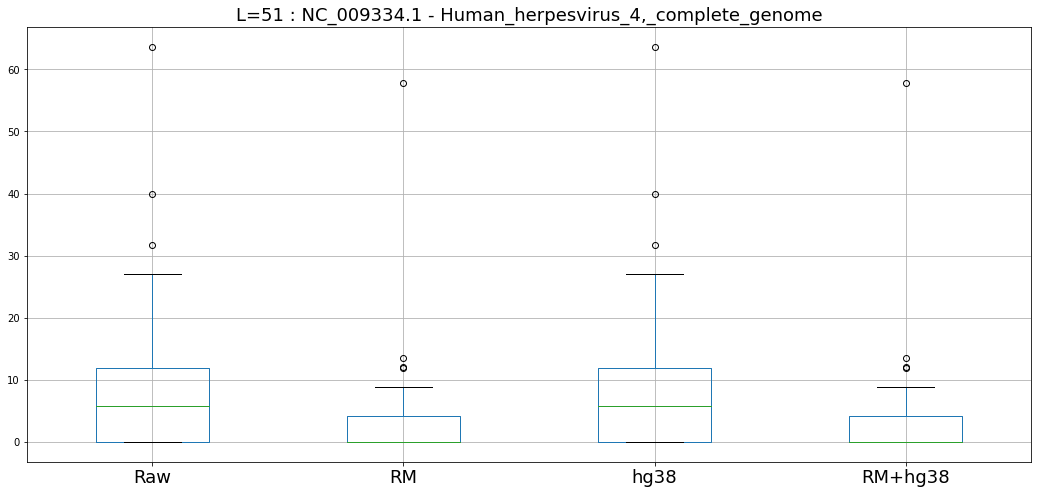

raw      NC_009334.1    42.688855
RM       NC_009334.1    42.688855
hg38     NC_009334.1    33.696350
RM+hg38  NC_009334.1    33.696350
dtype: float64


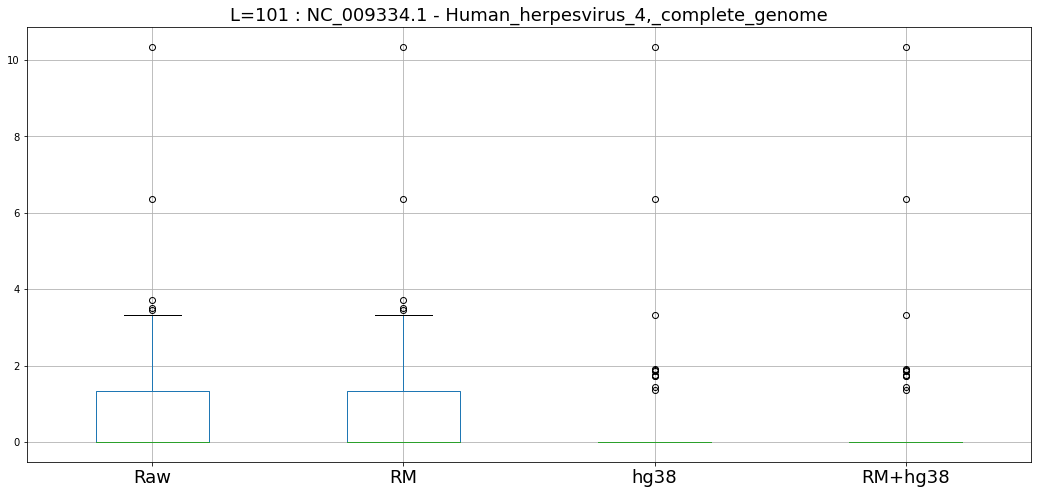

raw      NC_009334.1    11.400529
RM       NC_009334.1    11.400529
hg38     NC_009334.1     8.542668
RM+hg38  NC_009334.1     8.542668
dtype: float64


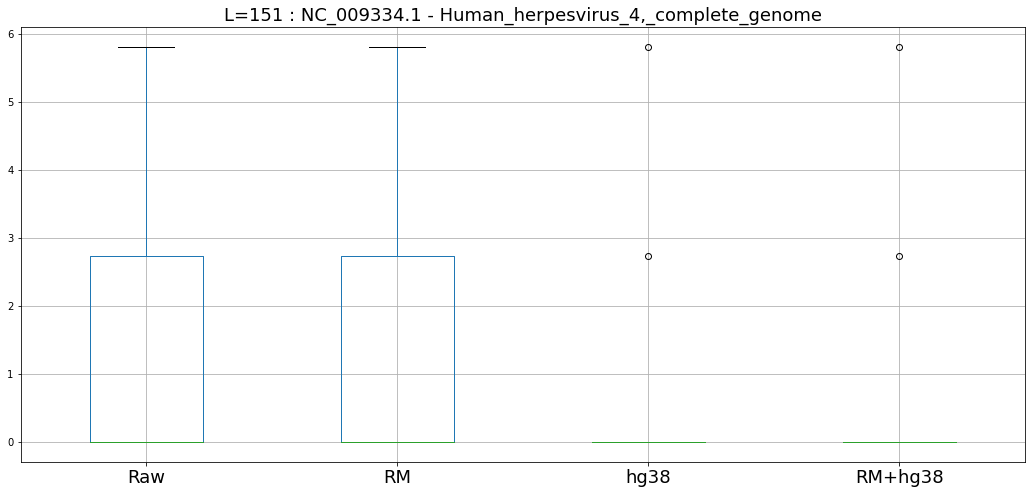

raw      NC_011203.1    460.773192
RM       NC_011203.1      5.452855
hg38     NC_011203.1    452.822445
RM+hg38  NC_011203.1      5.452855
dtype: float64


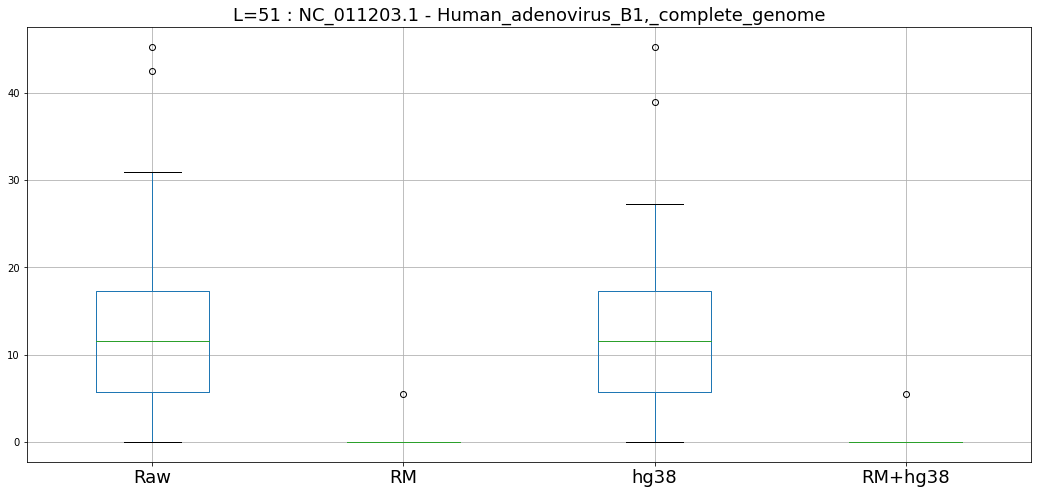

raw      NC_020890.1    41.835731
RM       NC_020890.1    41.835731
hg38     NC_020890.1     3.505270
RM+hg38  NC_020890.1     3.505270
dtype: float64


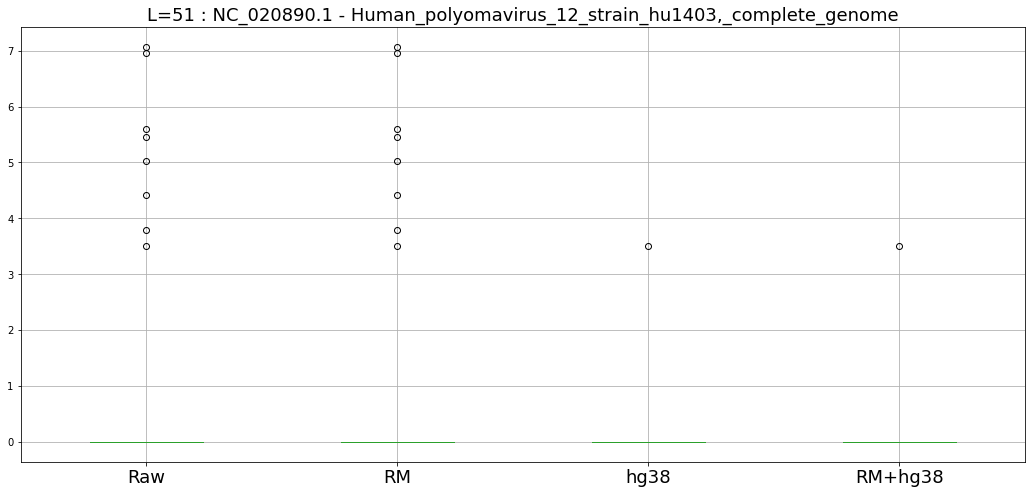

raw      NC_028459.1    221.259387
RM       NC_028459.1      0.000000
hg38     NC_028459.1      0.000000
RM+hg38  NC_028459.1      0.000000
dtype: float64


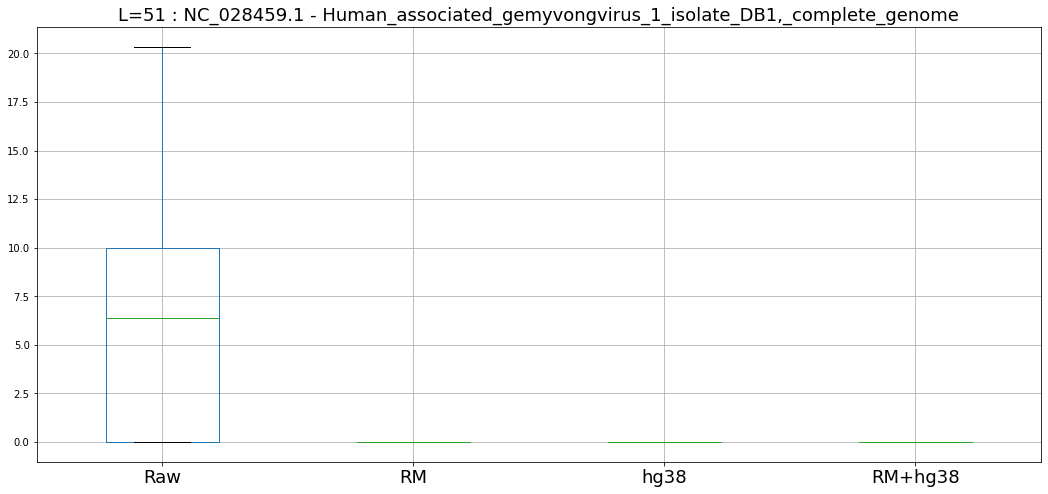

raw      NC_038889.1    17.434631
RM       NC_038889.1     5.775401
hg38     NC_038889.1    17.434631
RM+hg38  NC_038889.1     5.775401
dtype: float64


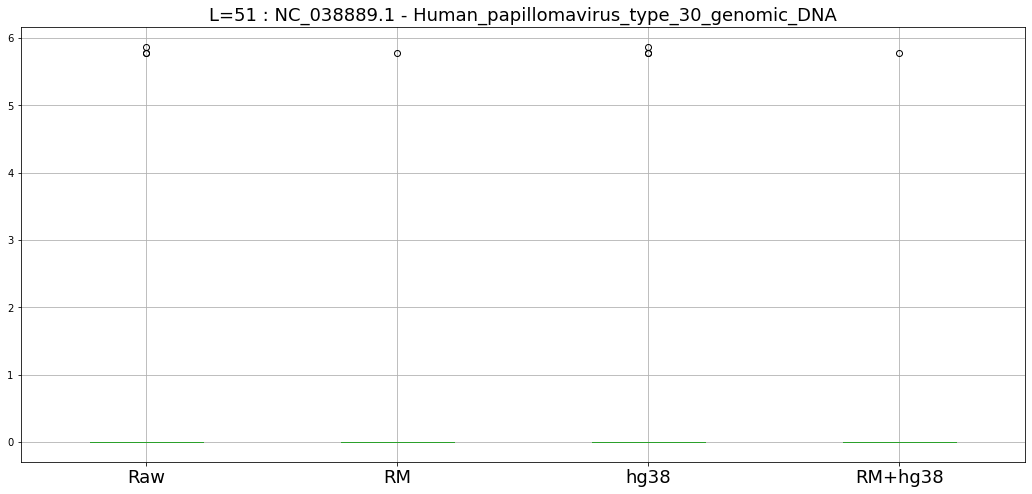

In [31]:
#length=101

for index, row in viruses.iterrows():
    accession=row['accession']
    description=row['description']
    for length in [51,101,151]:
        if( df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==accession].sum(
                )['raw',accession] > 0 ):
            print(df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==accession].sum())
            tmp=df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==accession]
            tmp.columns=["Raw","RM","hg38","RM+hg38"]
            tmp.boxplot()
            plt.title("L="+str(length)+" : "+accession+ " - " + description,fontsize = 18)
            plt.xticks(fontsize = 18)
            plt.show()
        

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


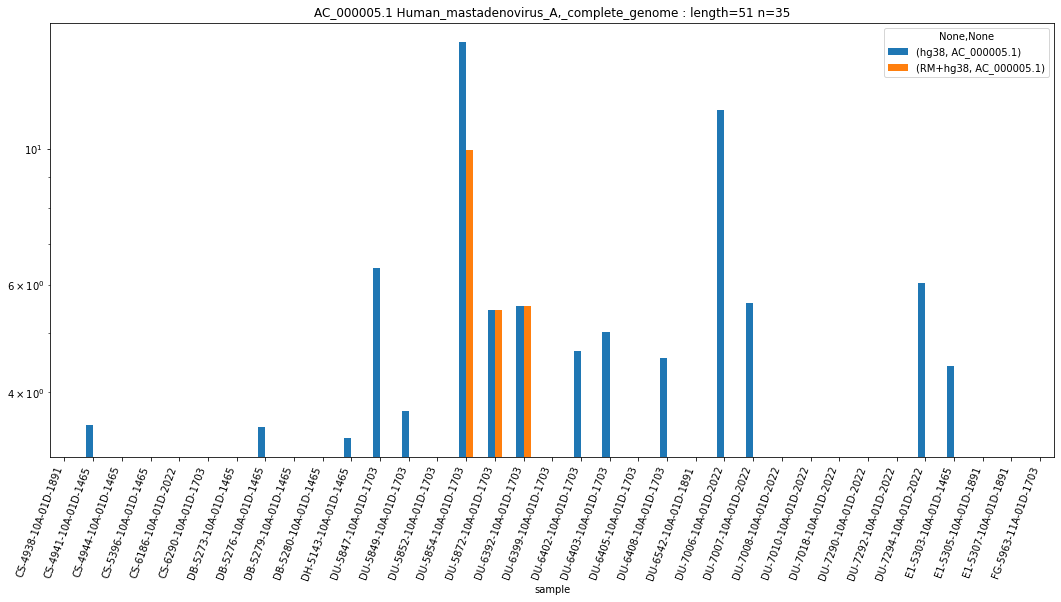

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:561: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  labels = axis.get_majorticklabels() + axis.get_minorticklabels()


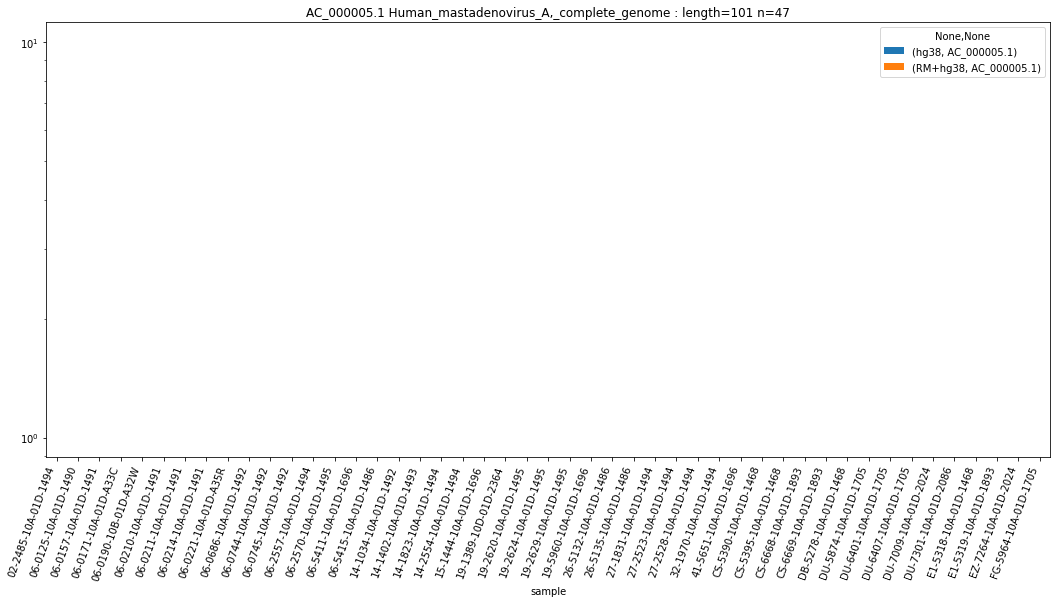

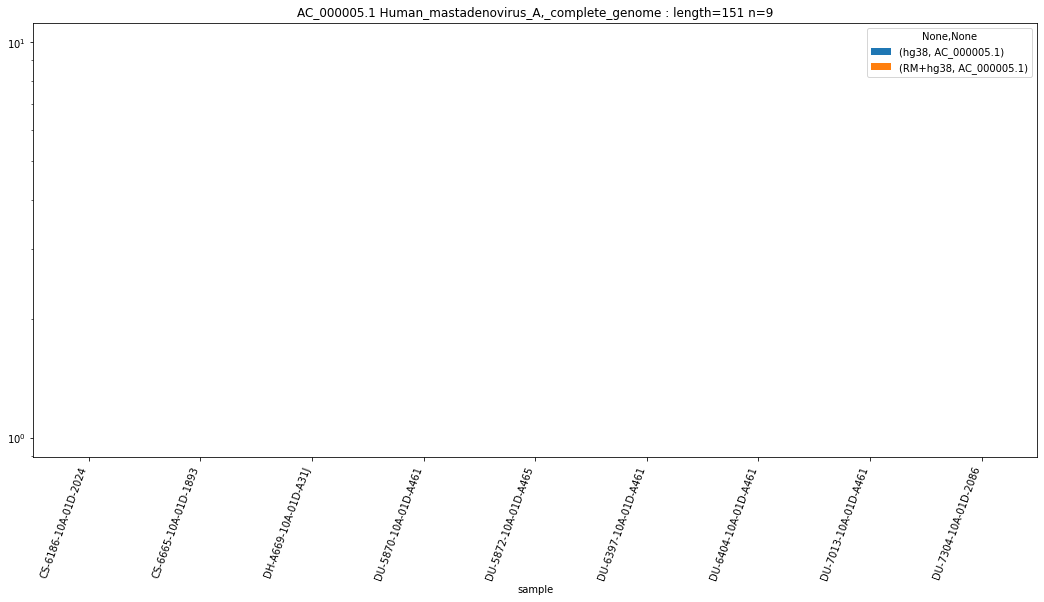

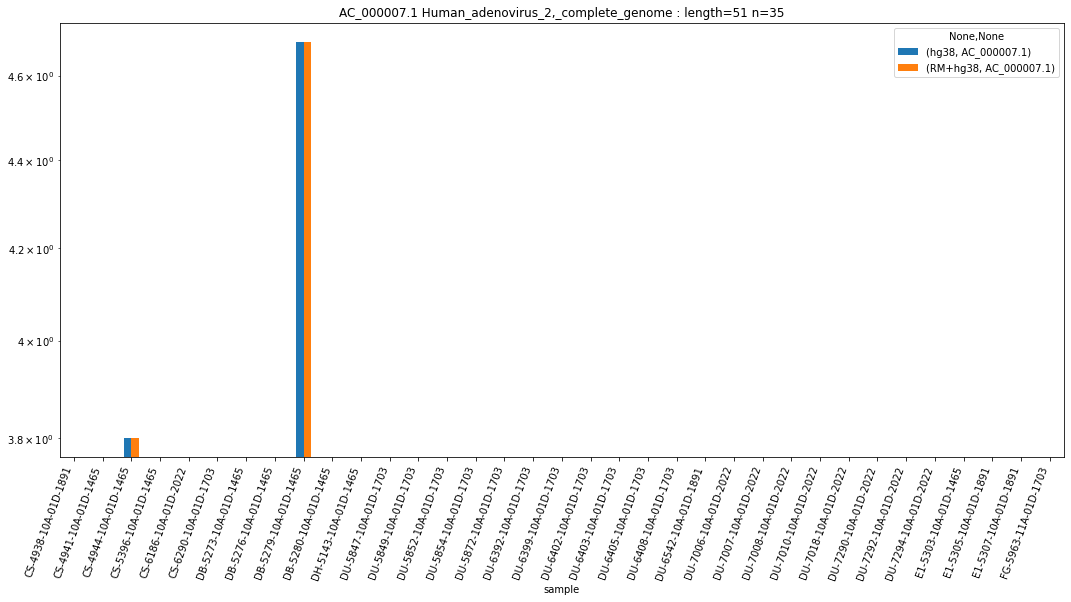

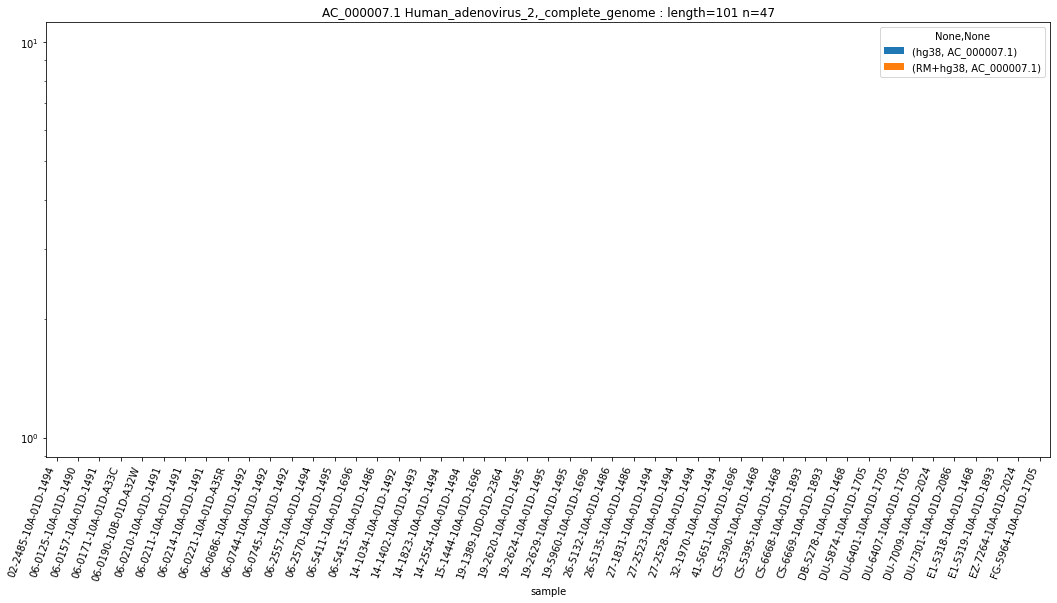

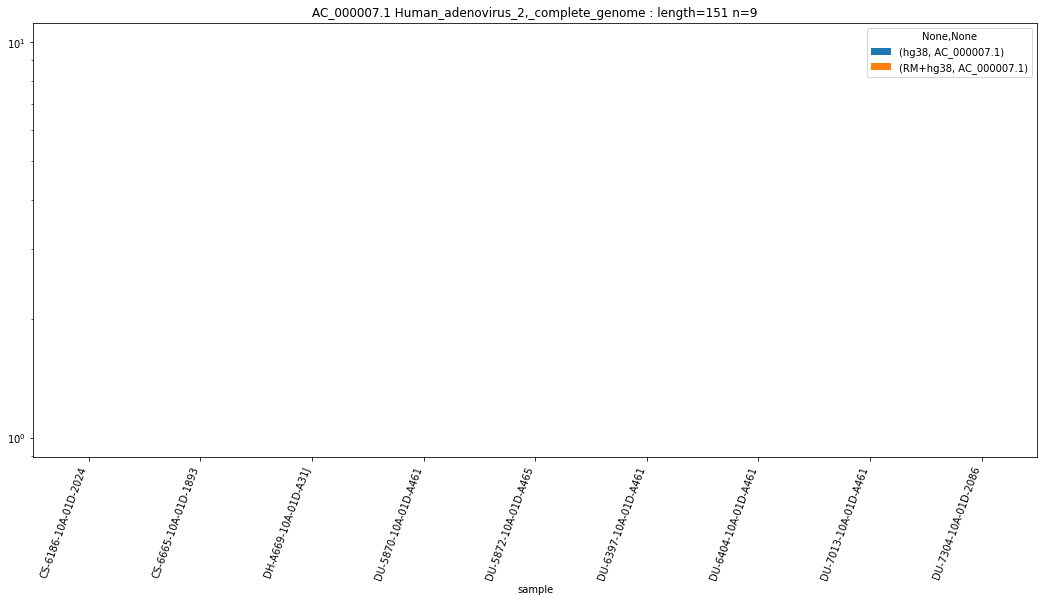

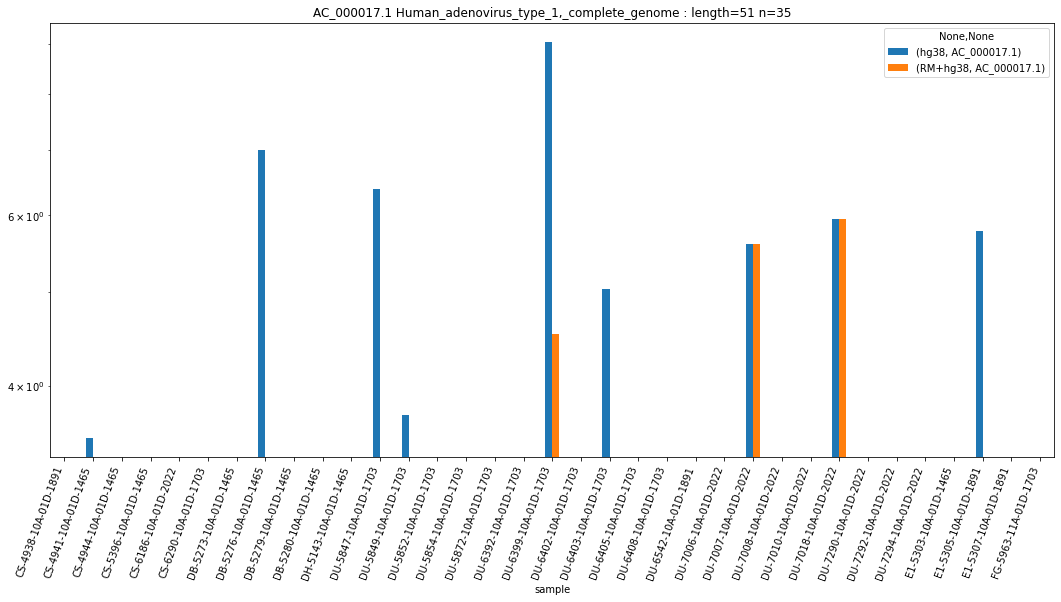

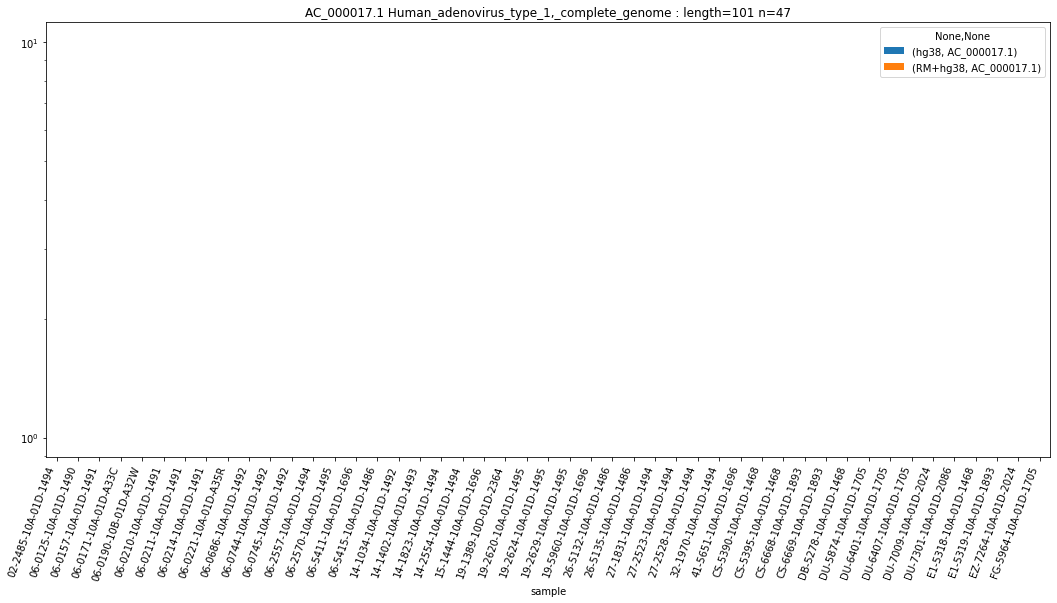

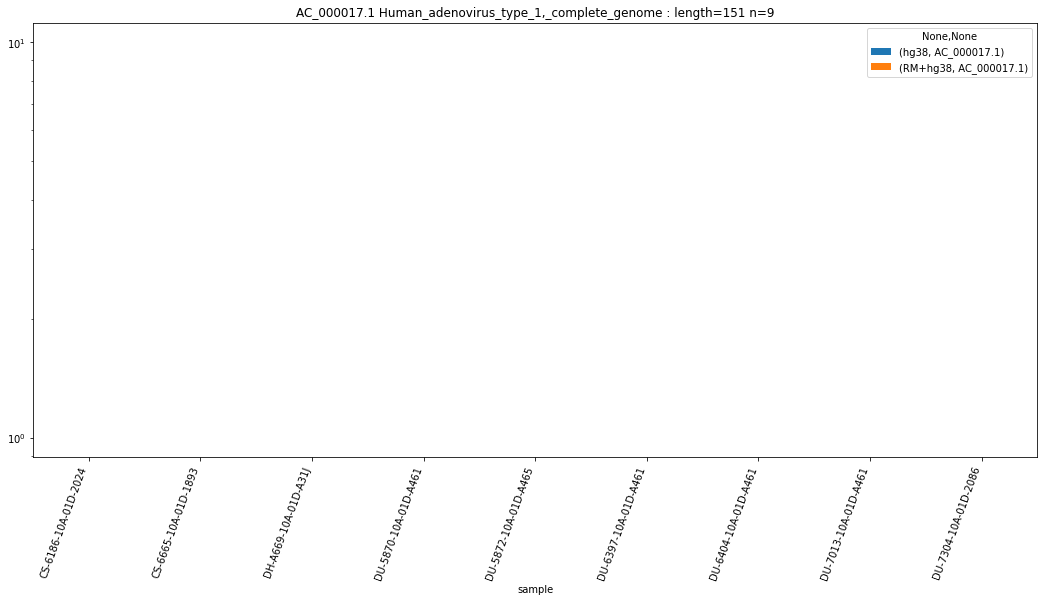

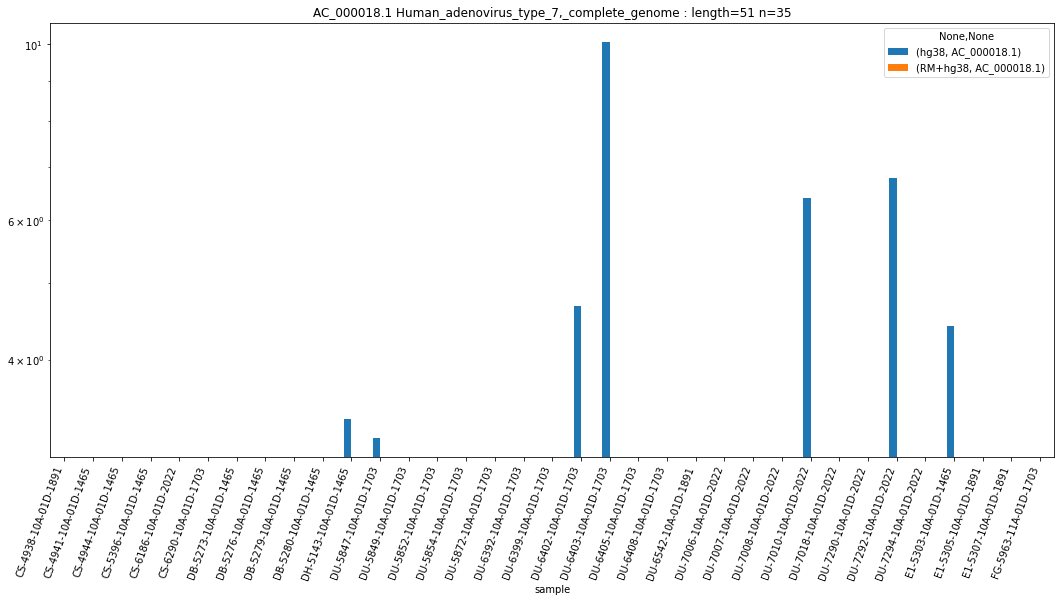

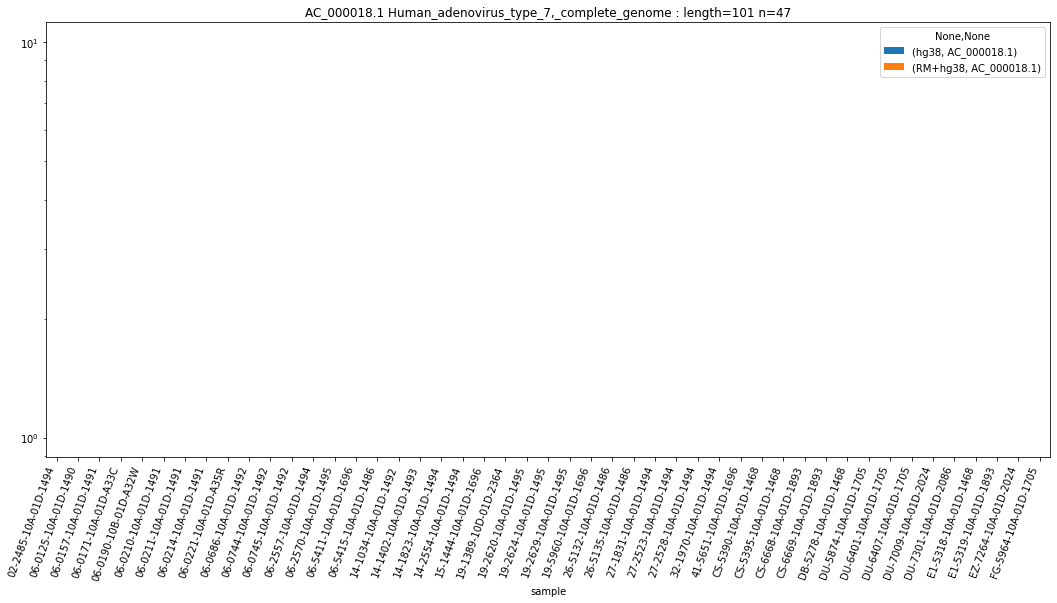

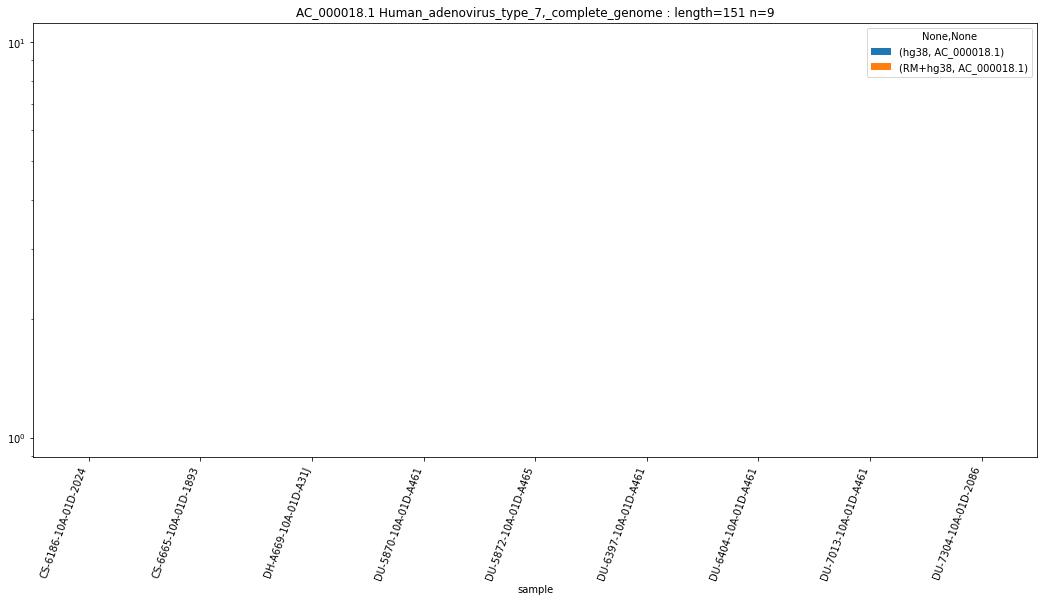

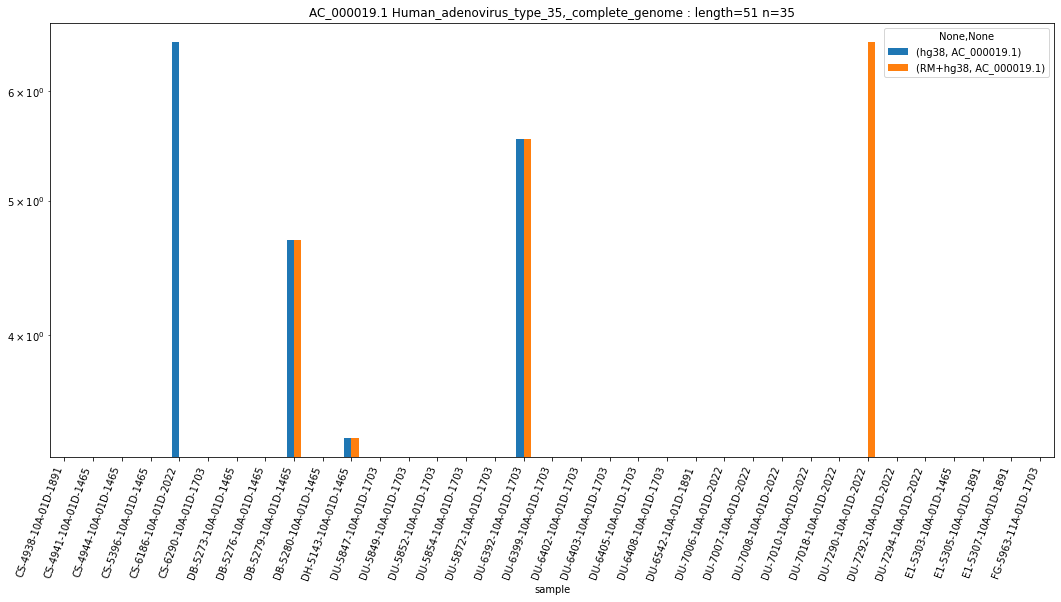

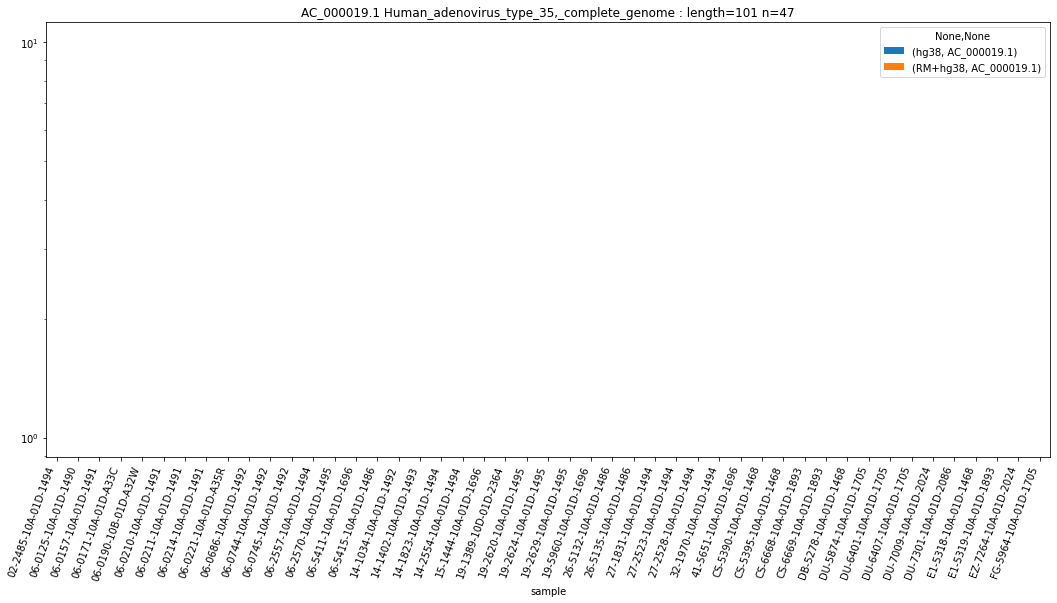

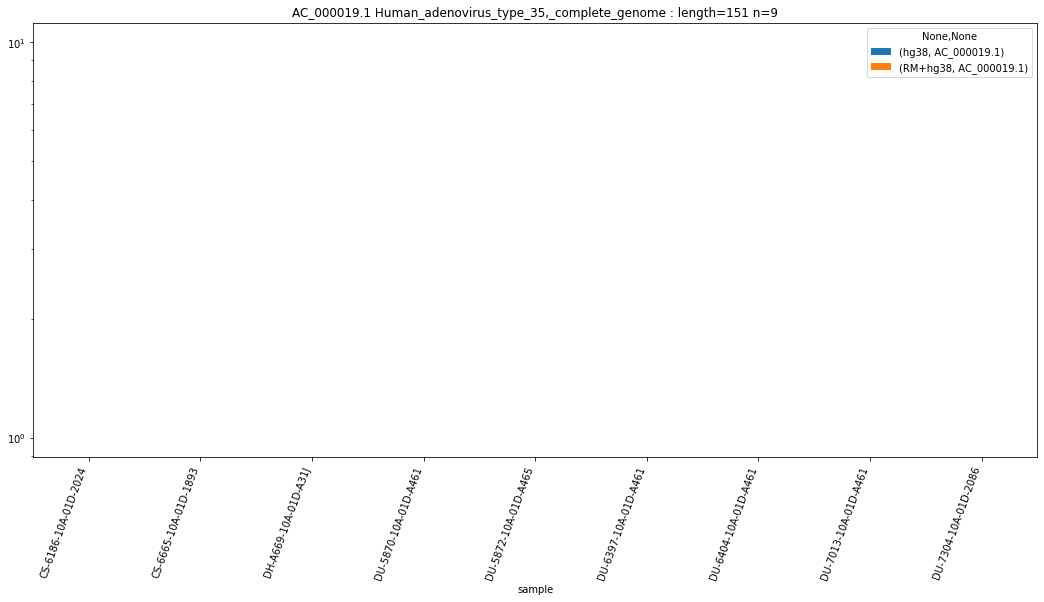

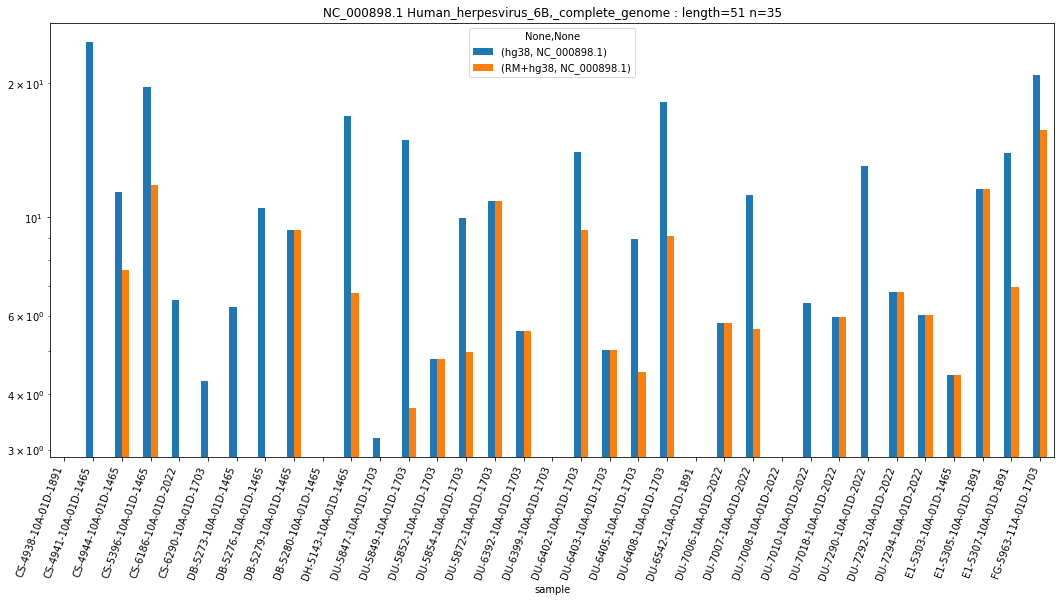

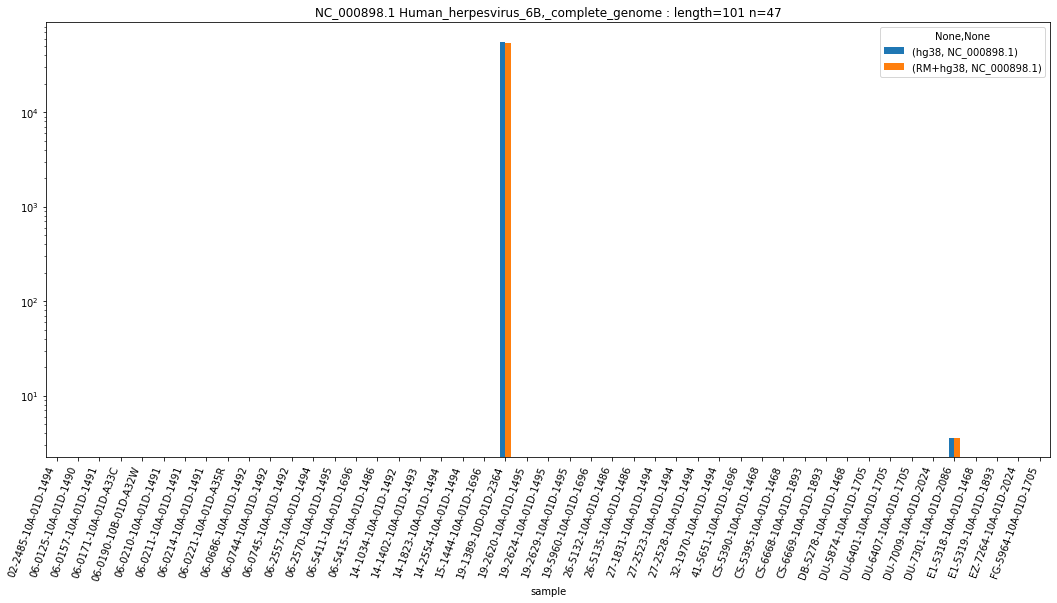

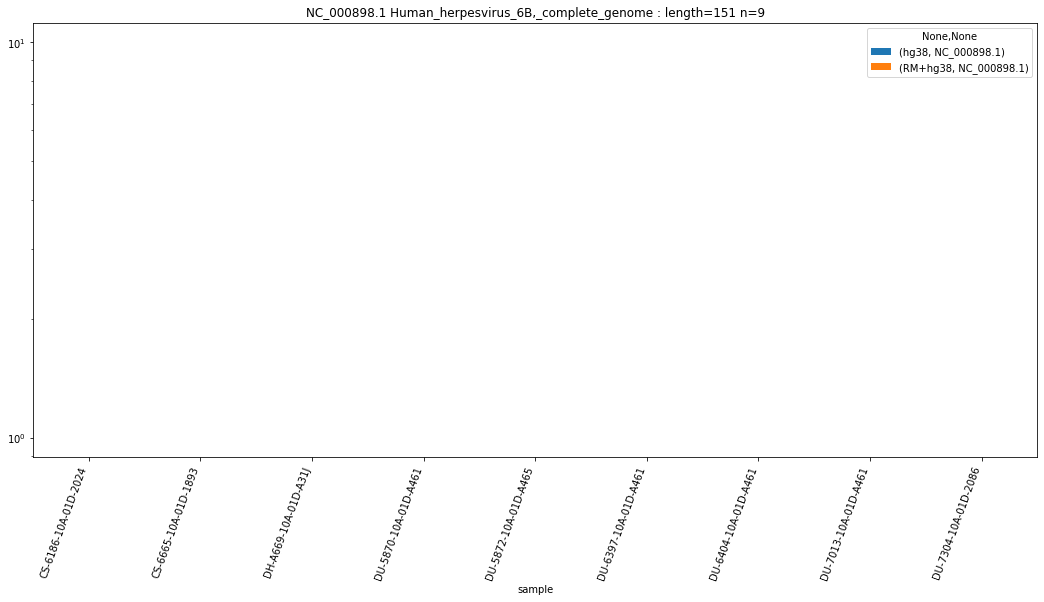

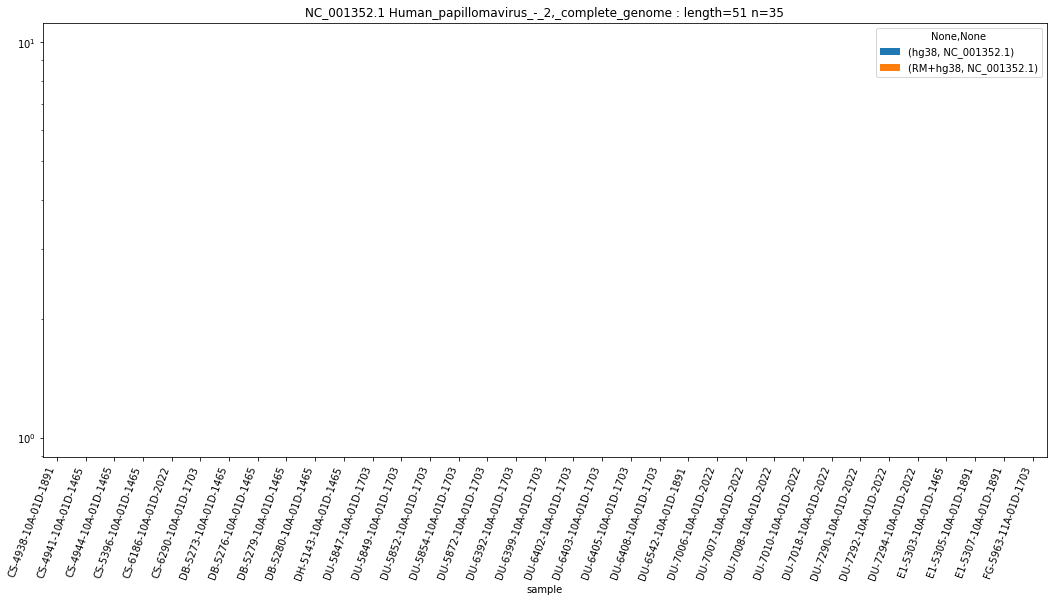

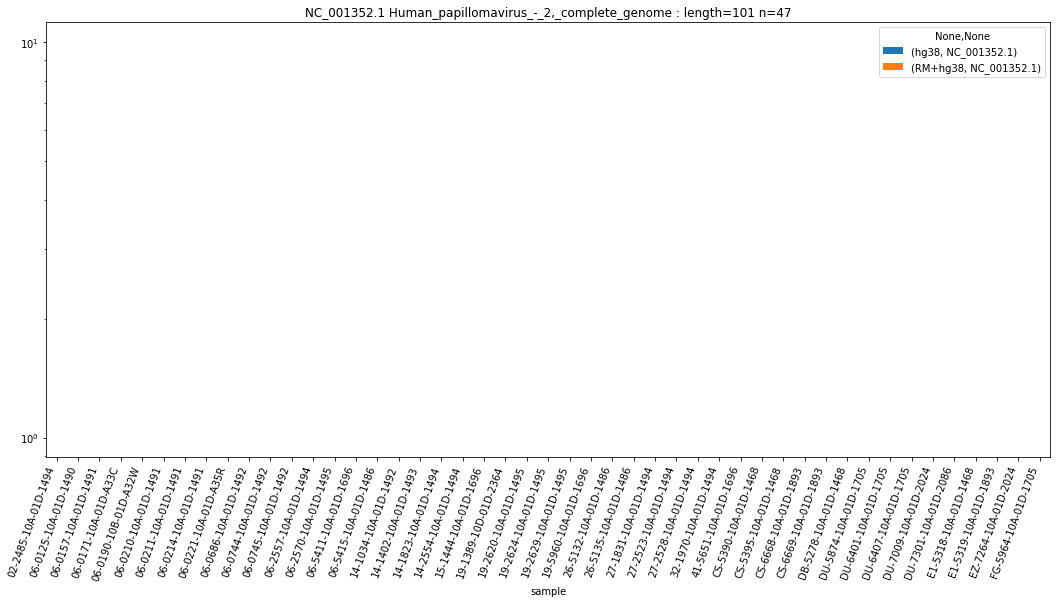

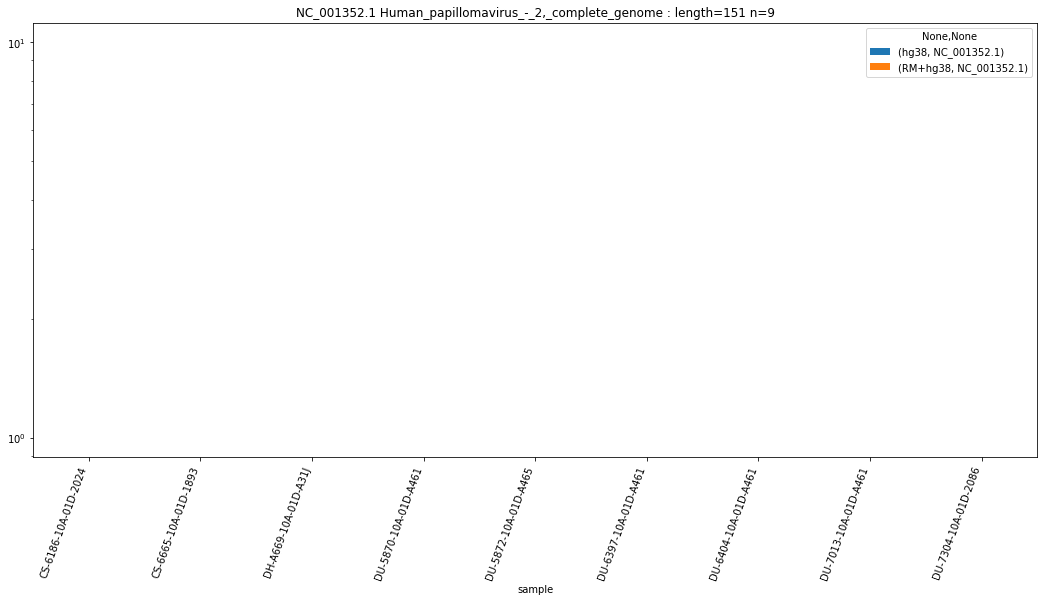

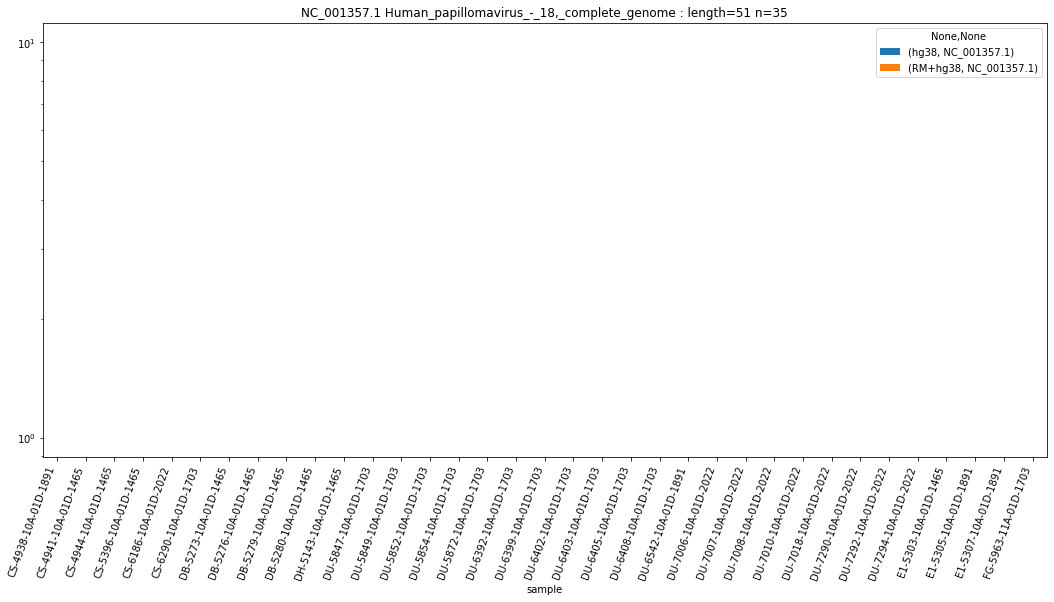

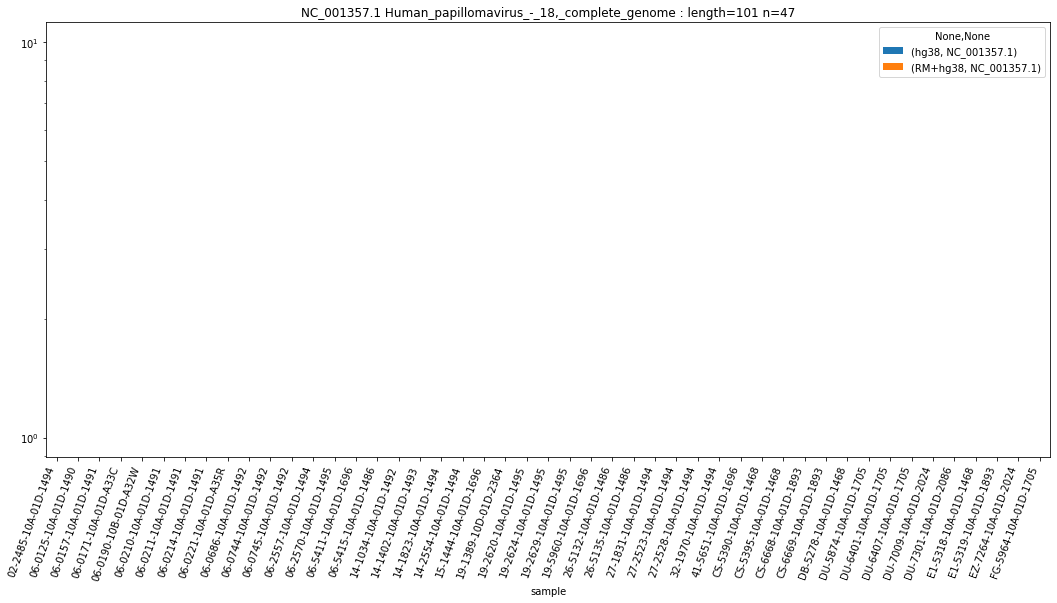

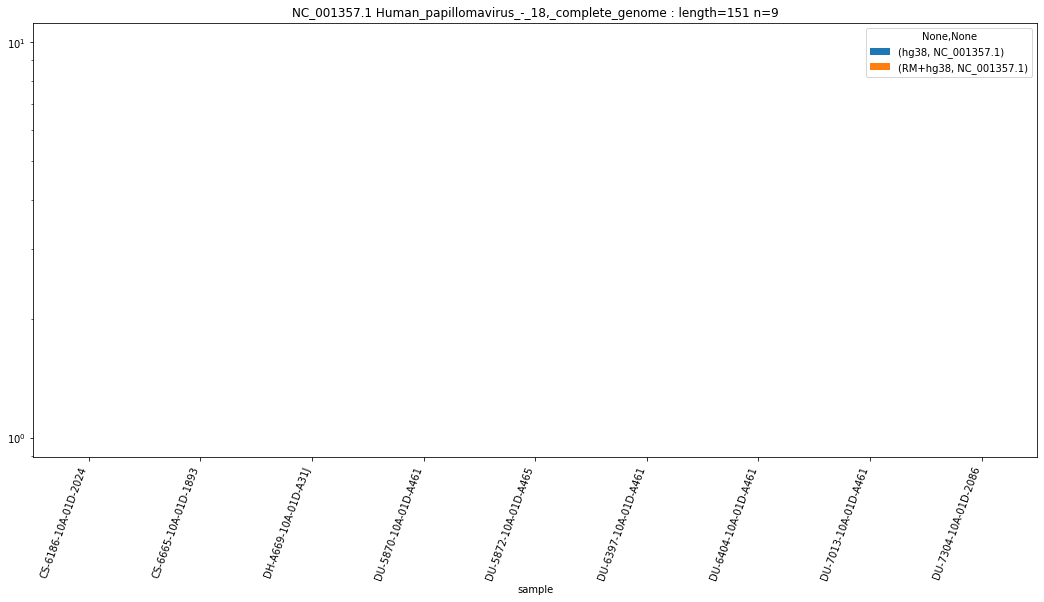

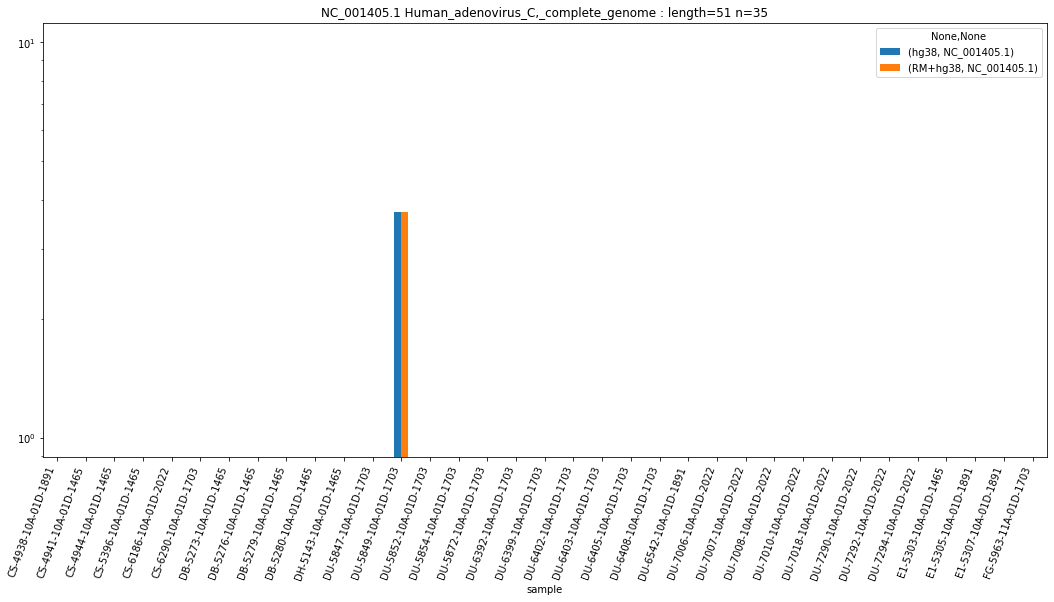

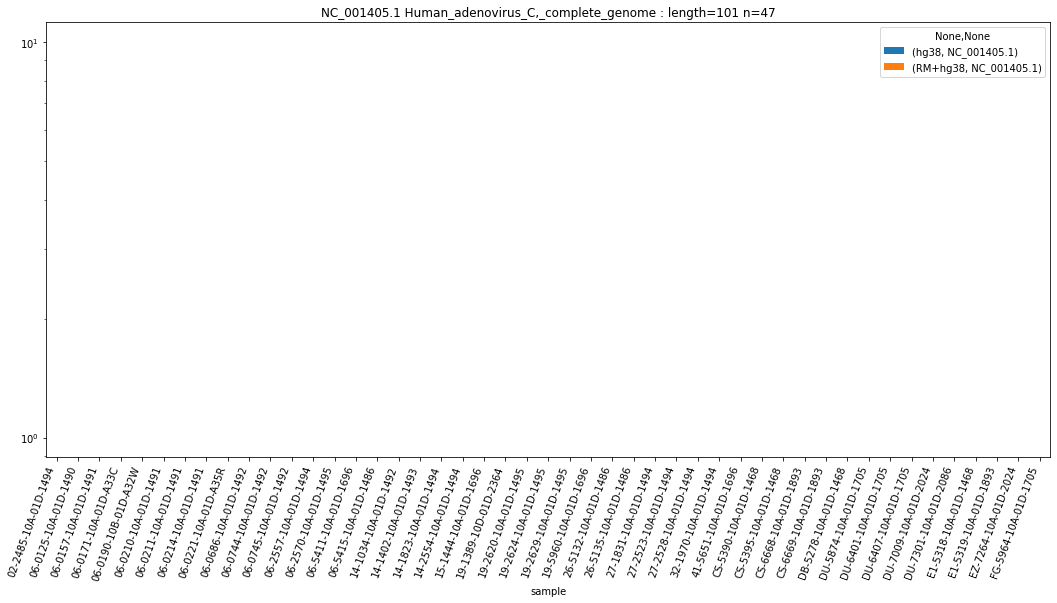

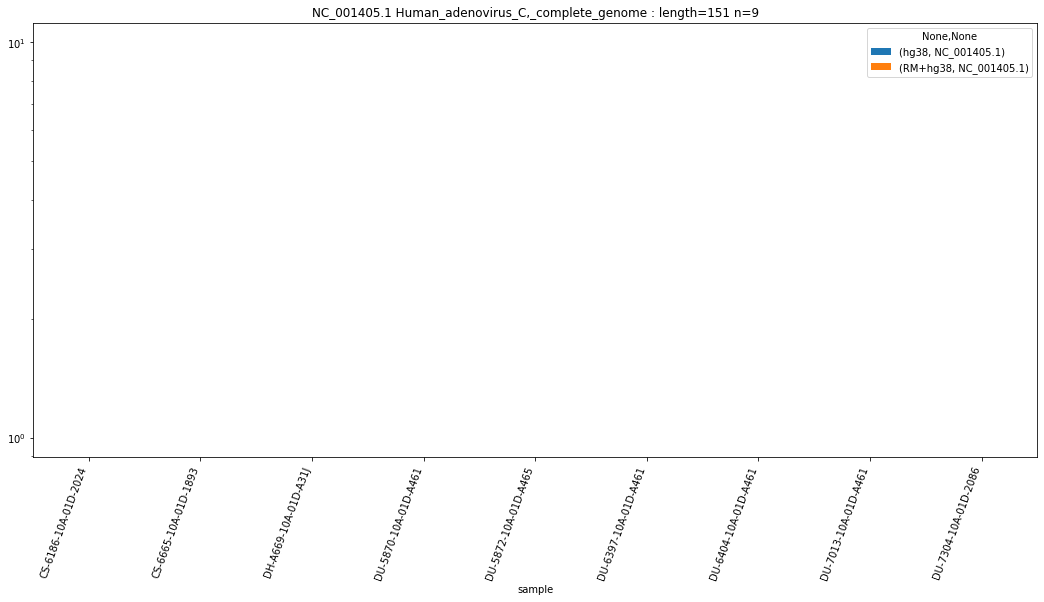

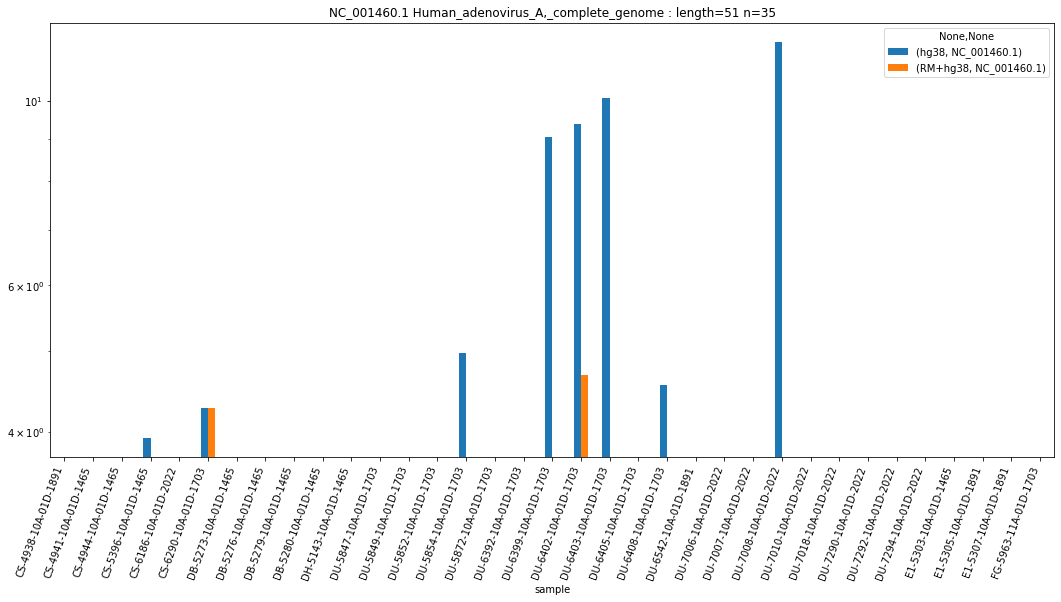

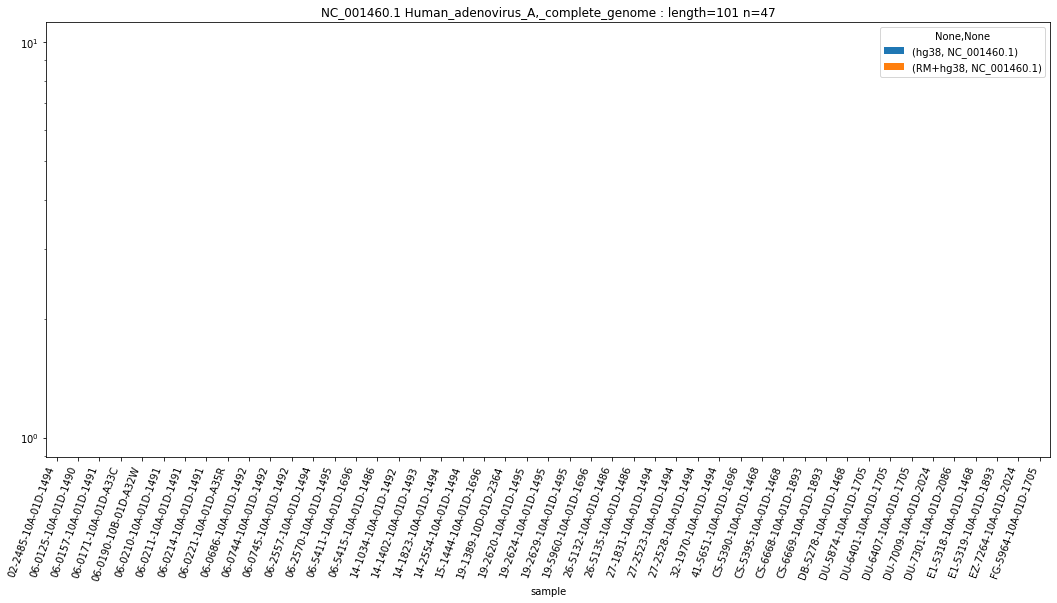

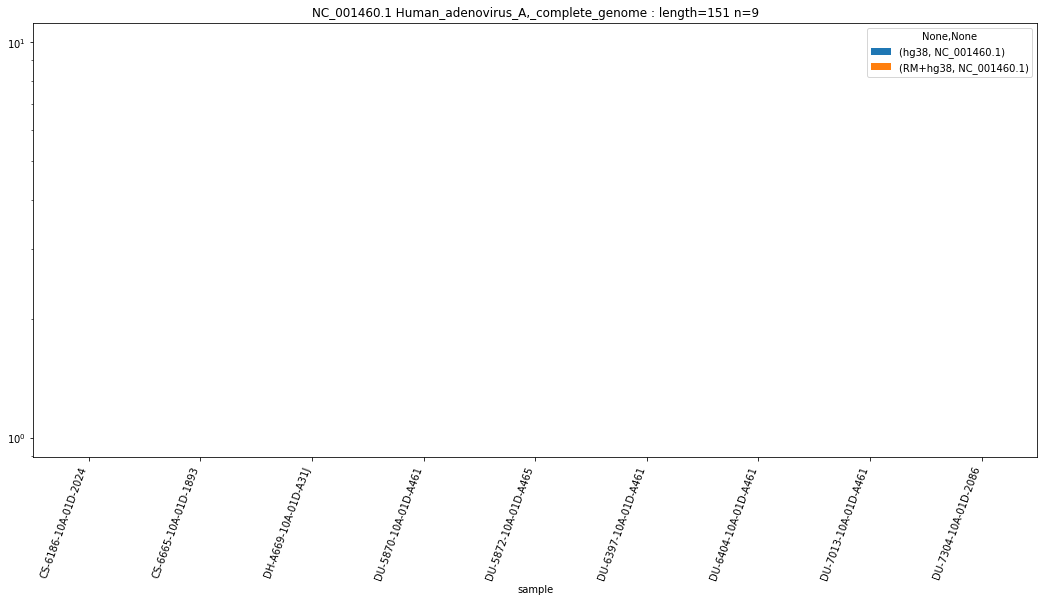

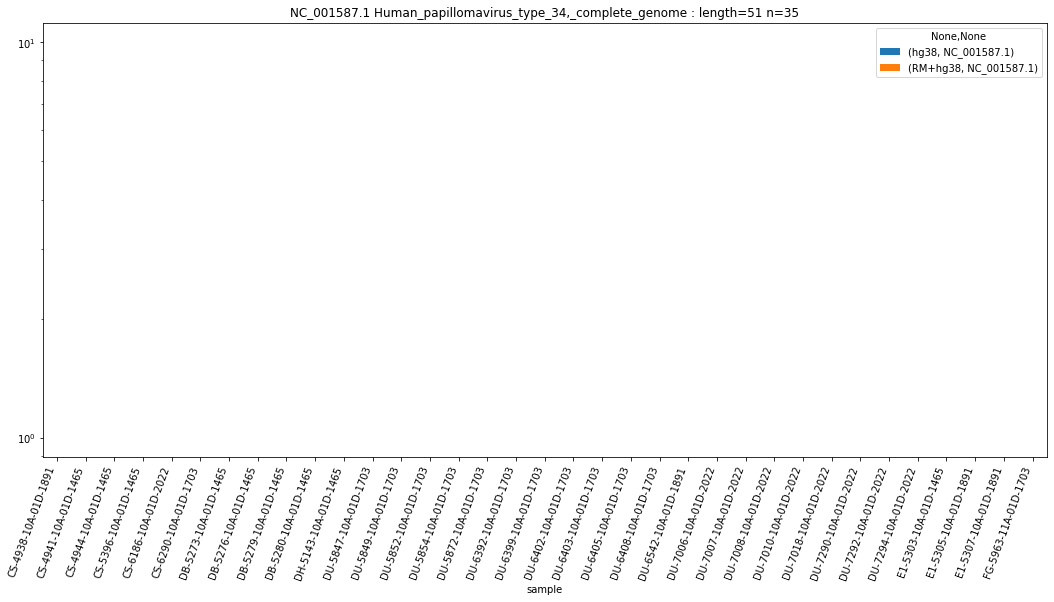

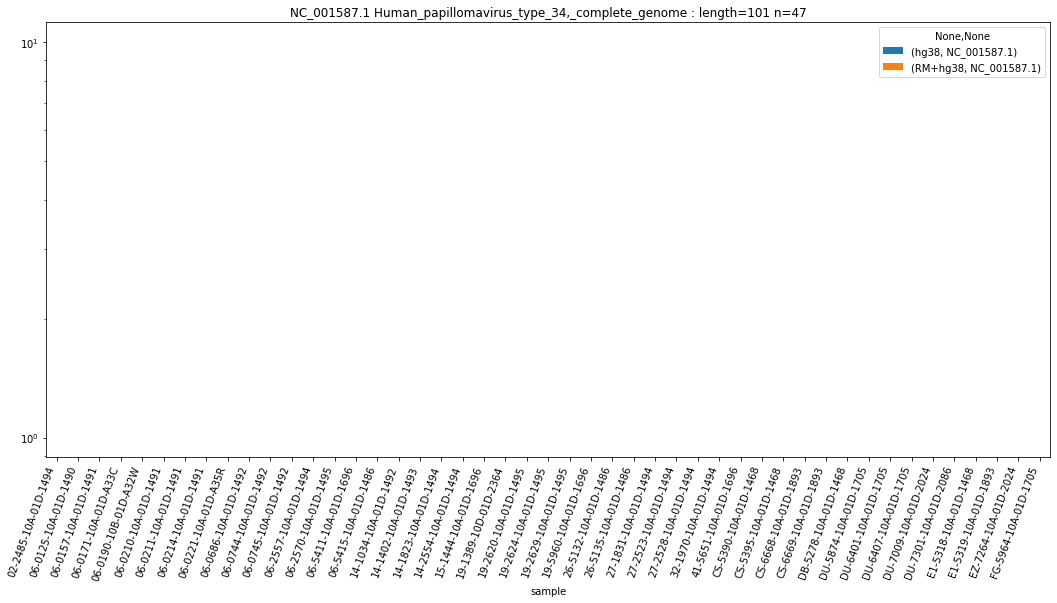

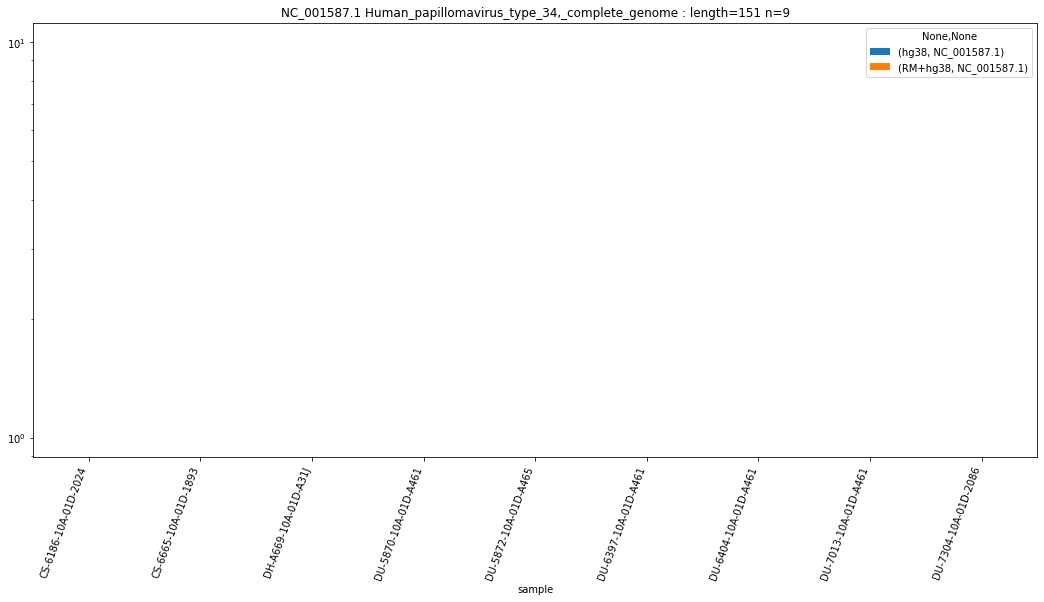

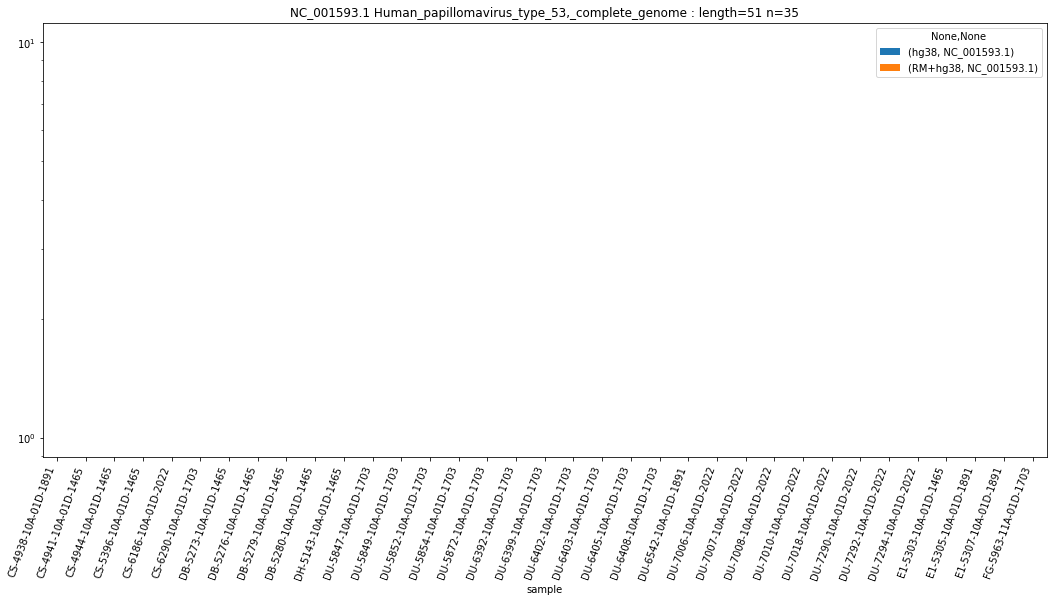

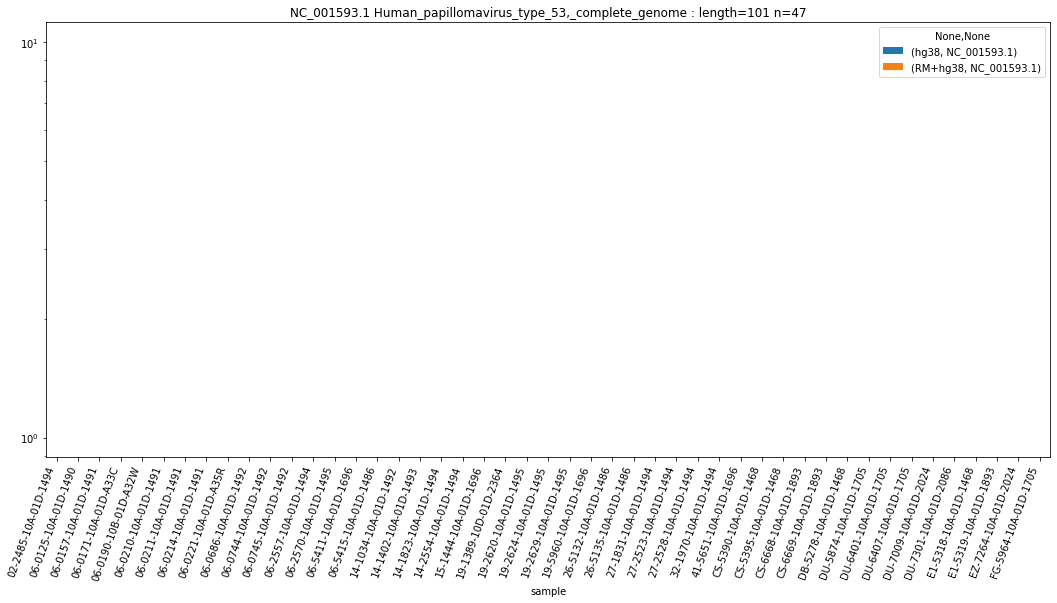

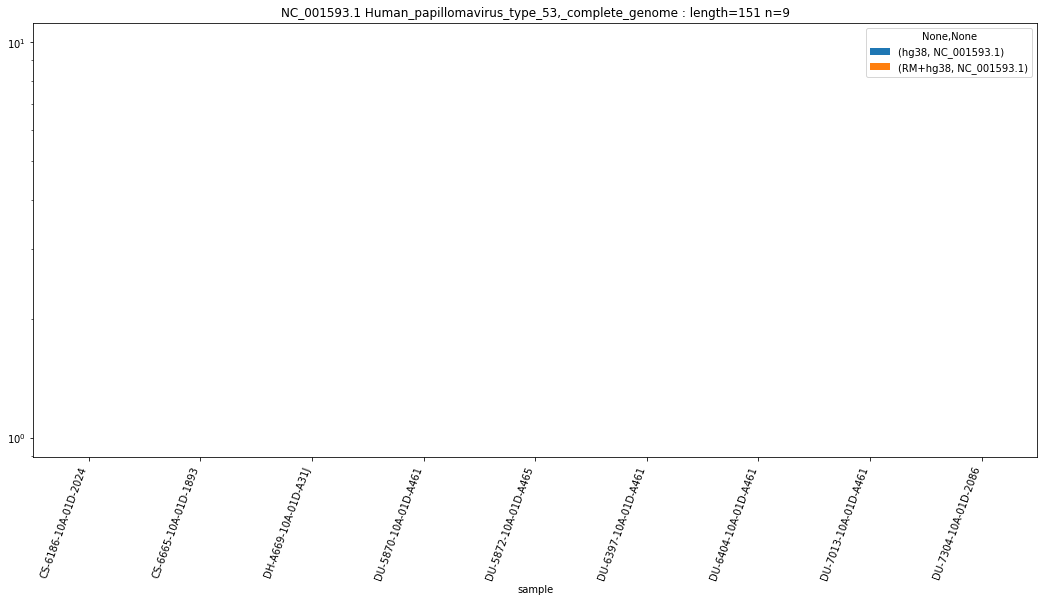

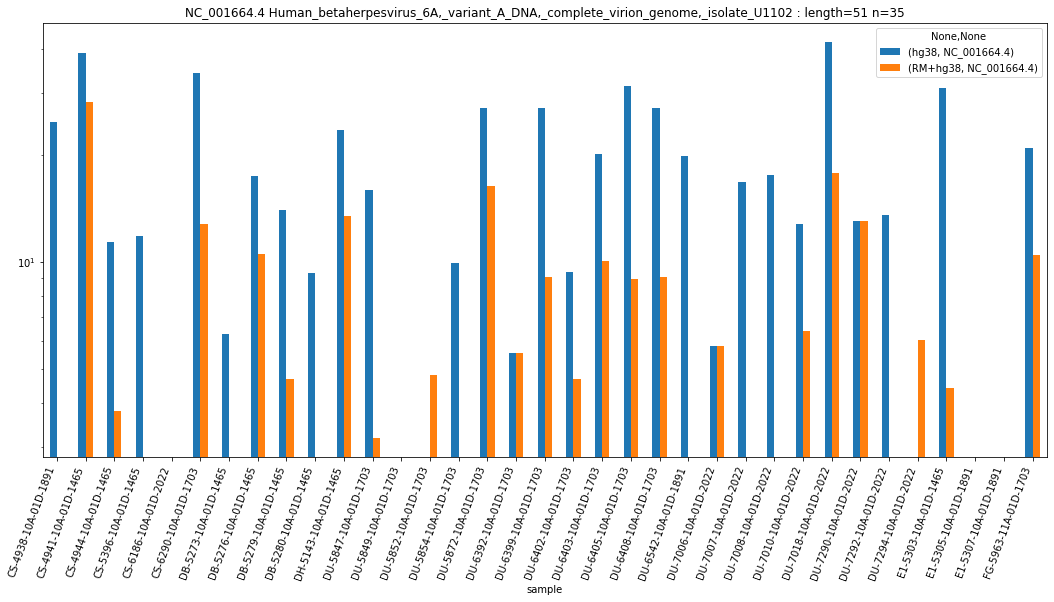

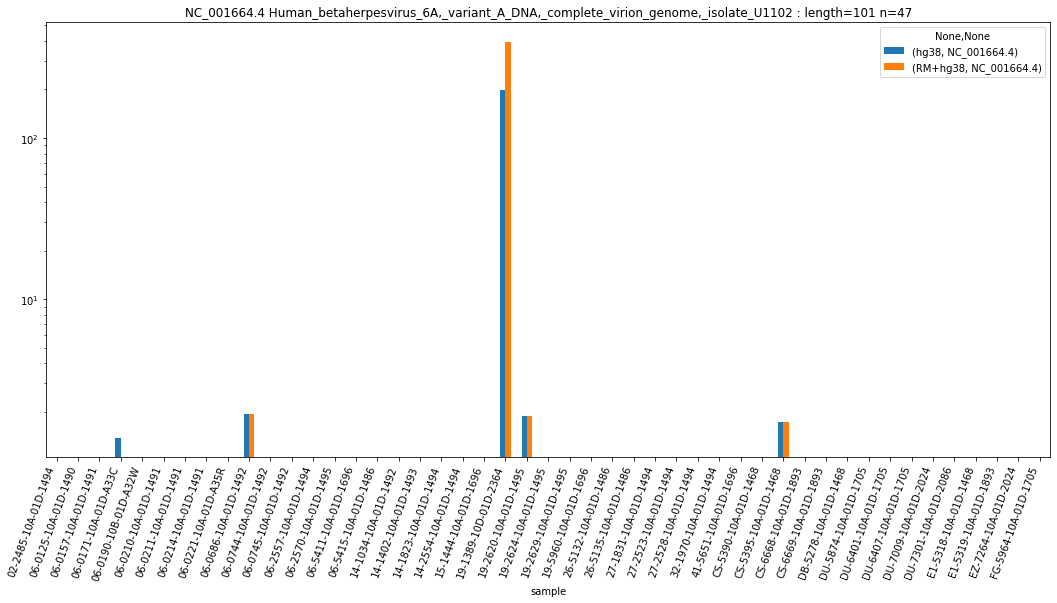

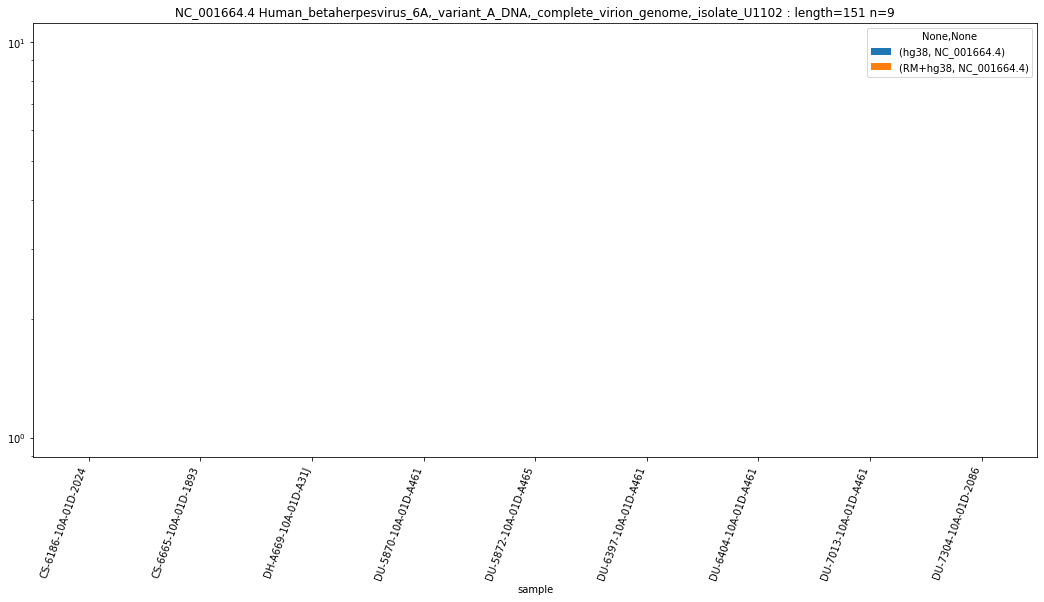

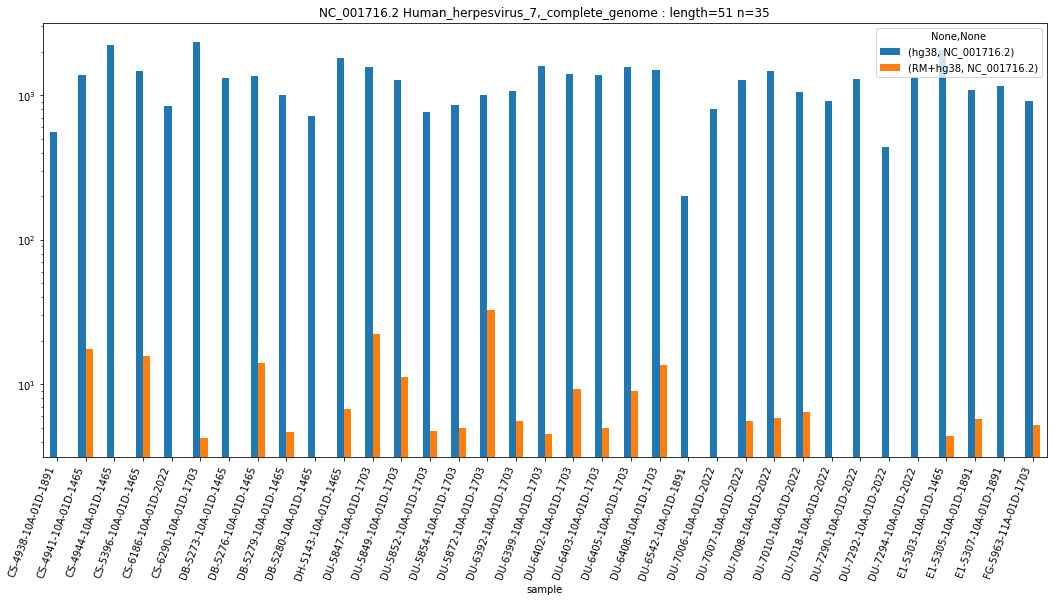

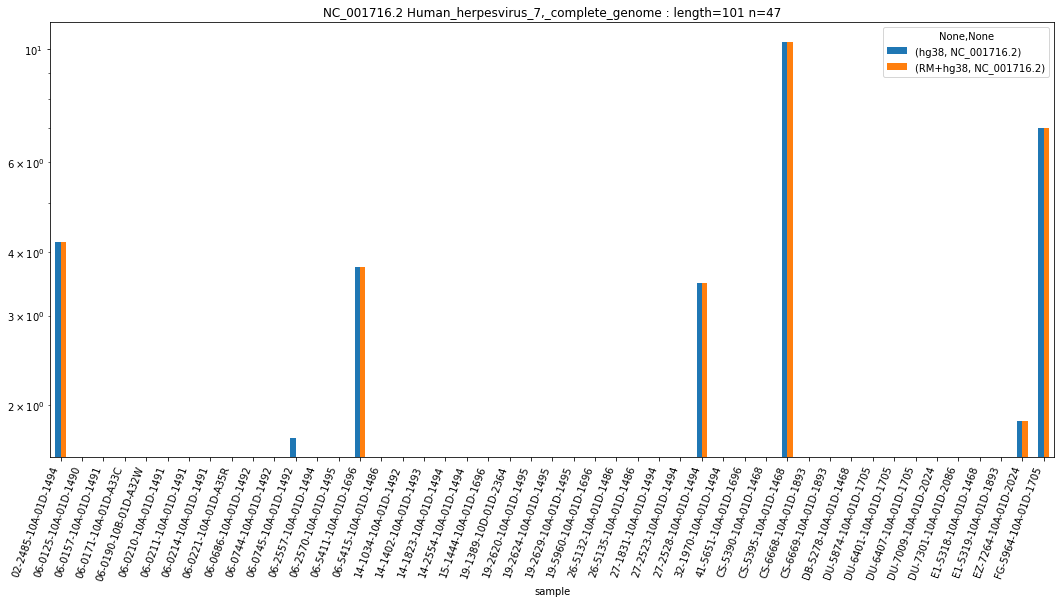

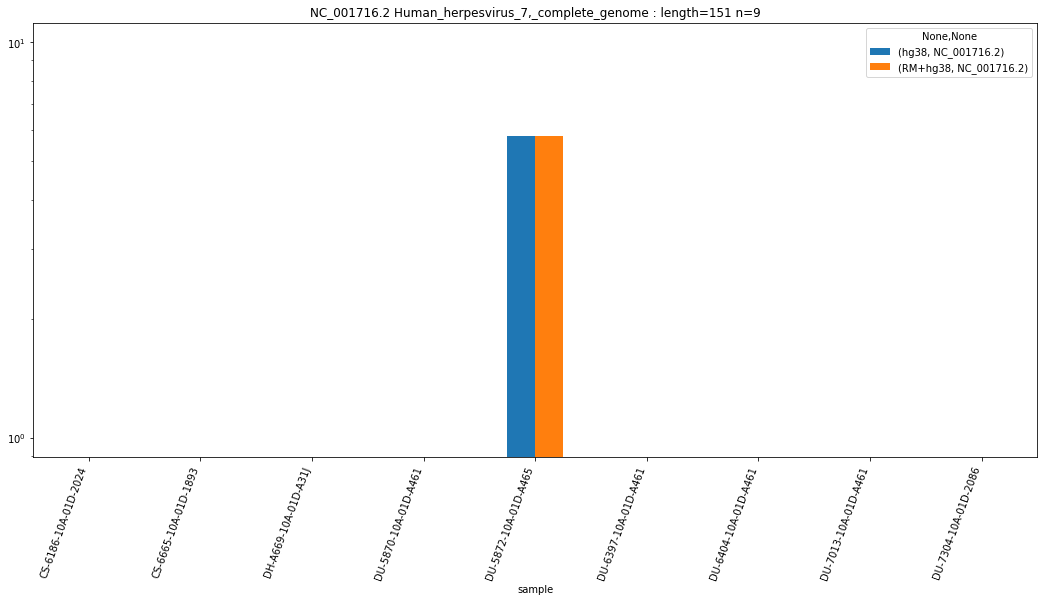

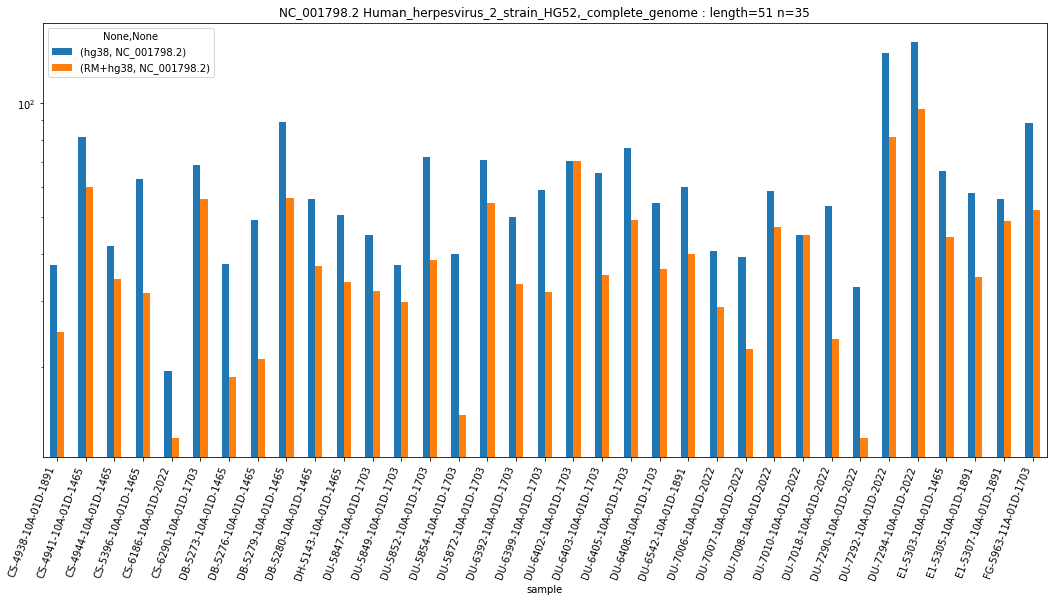

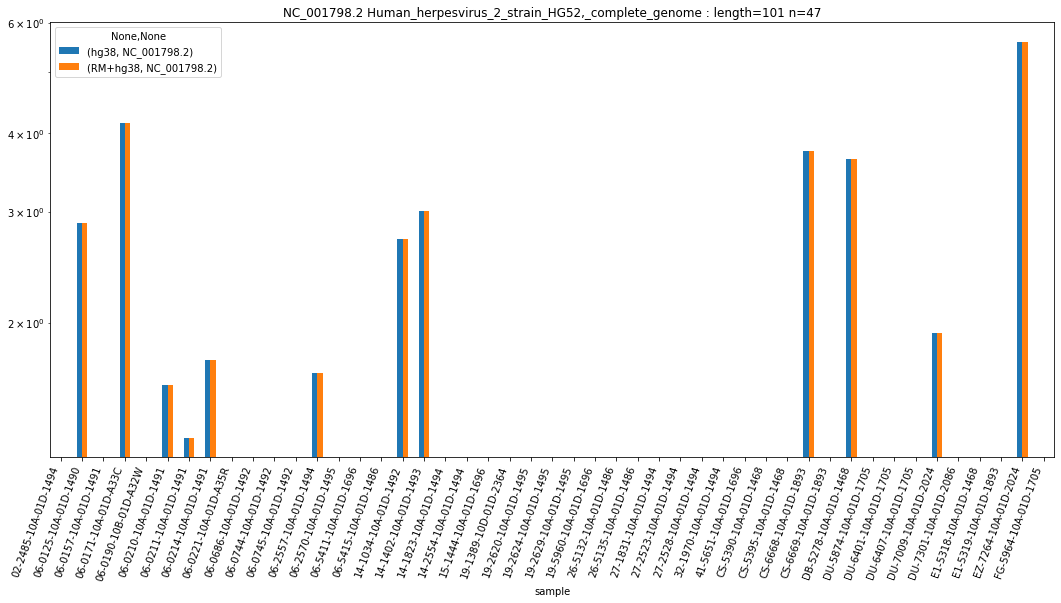

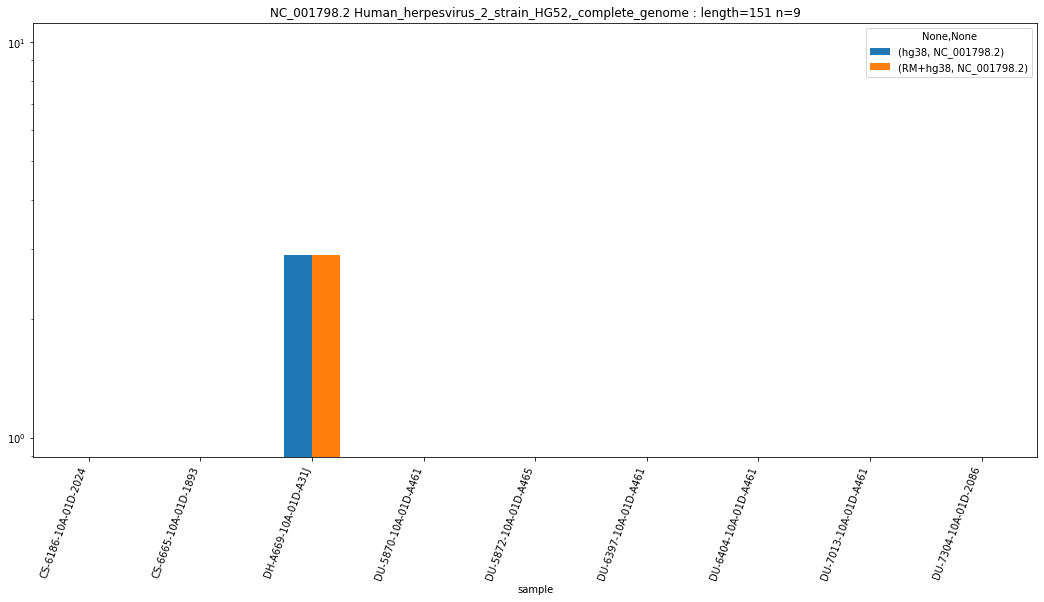

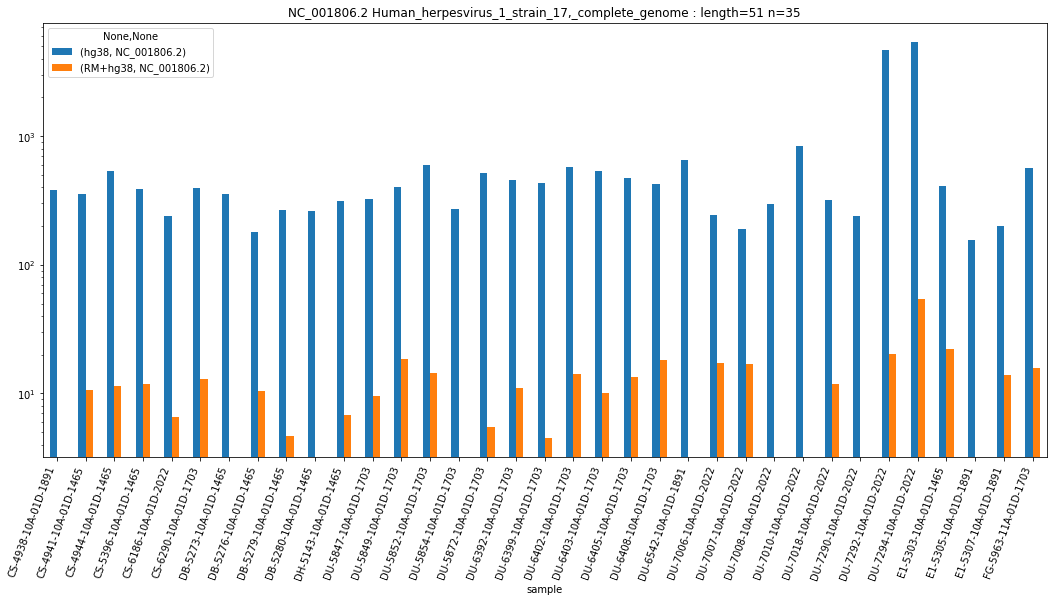

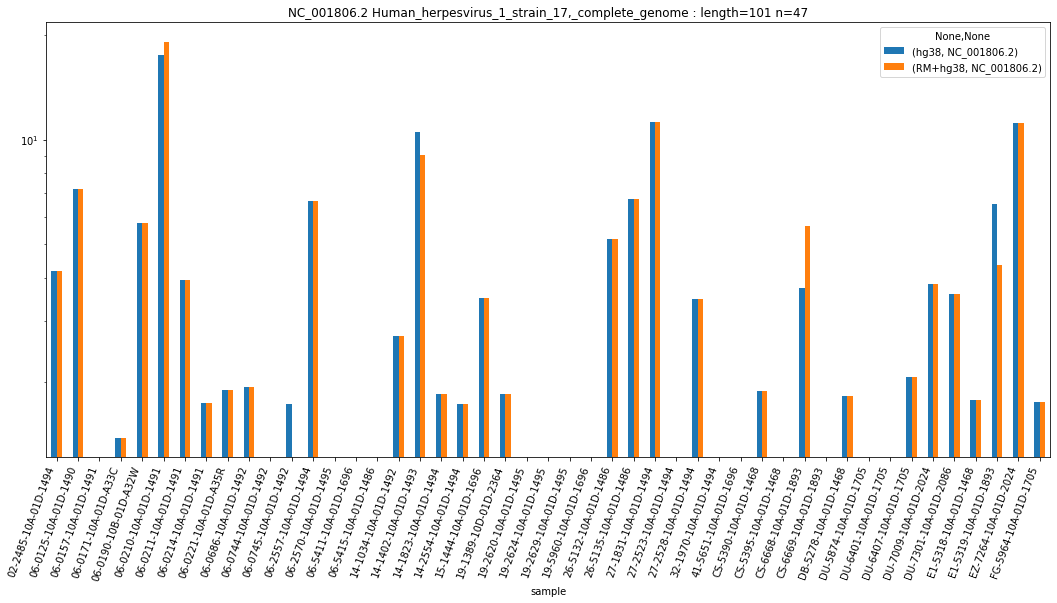

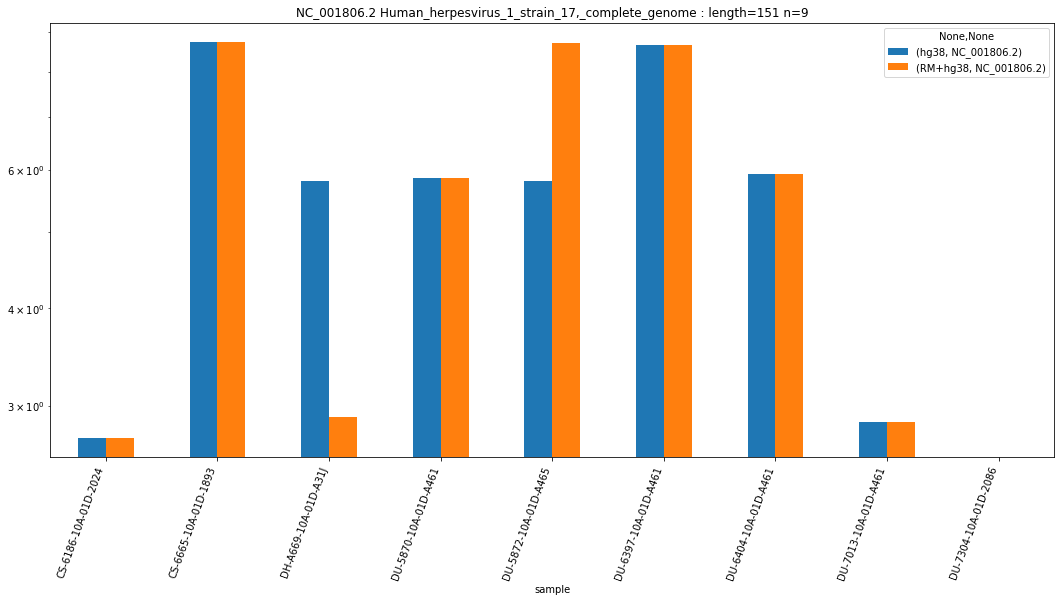

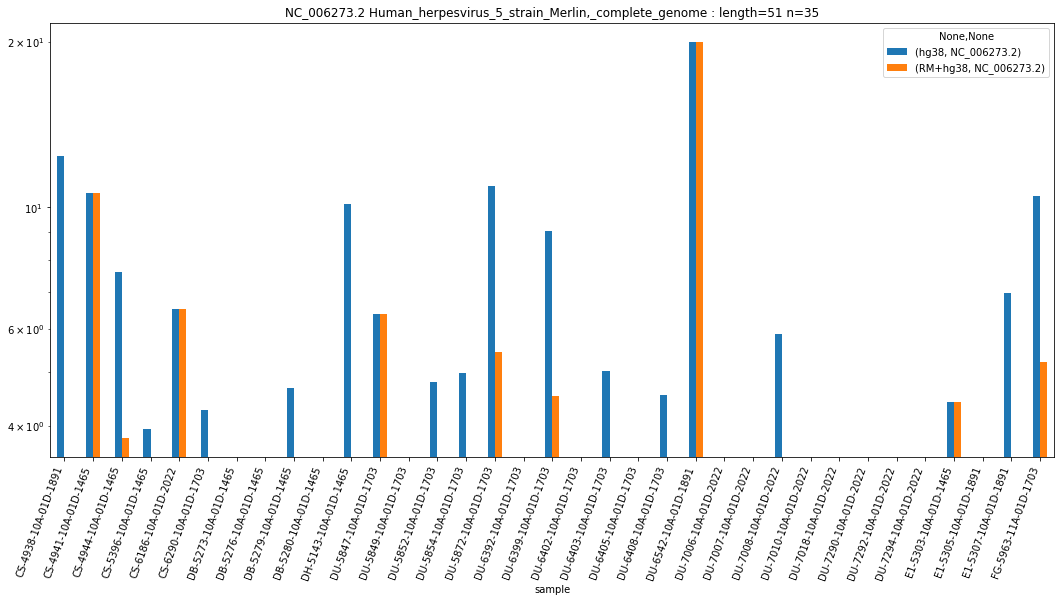

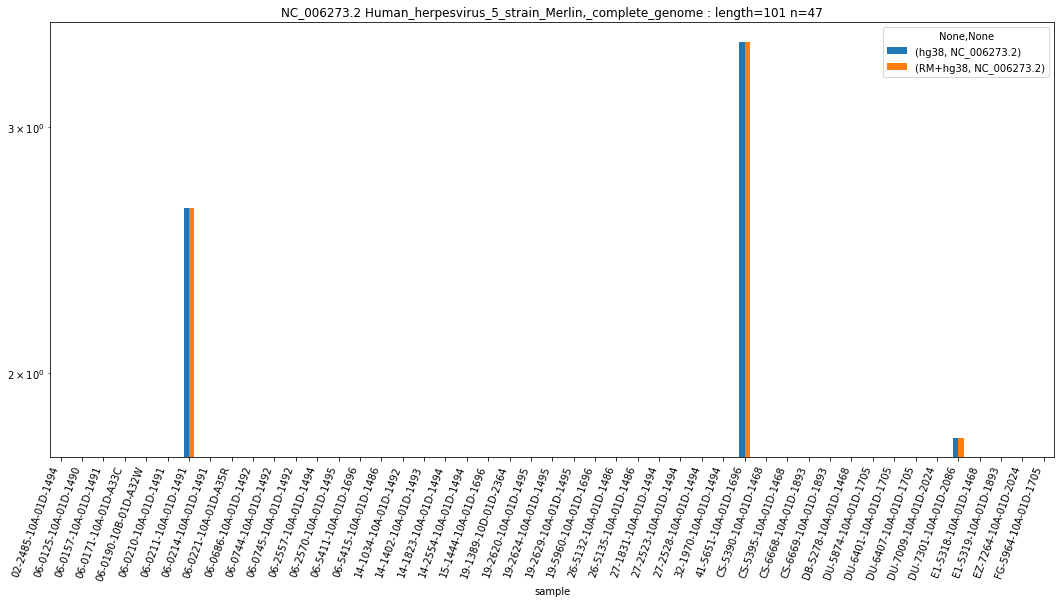

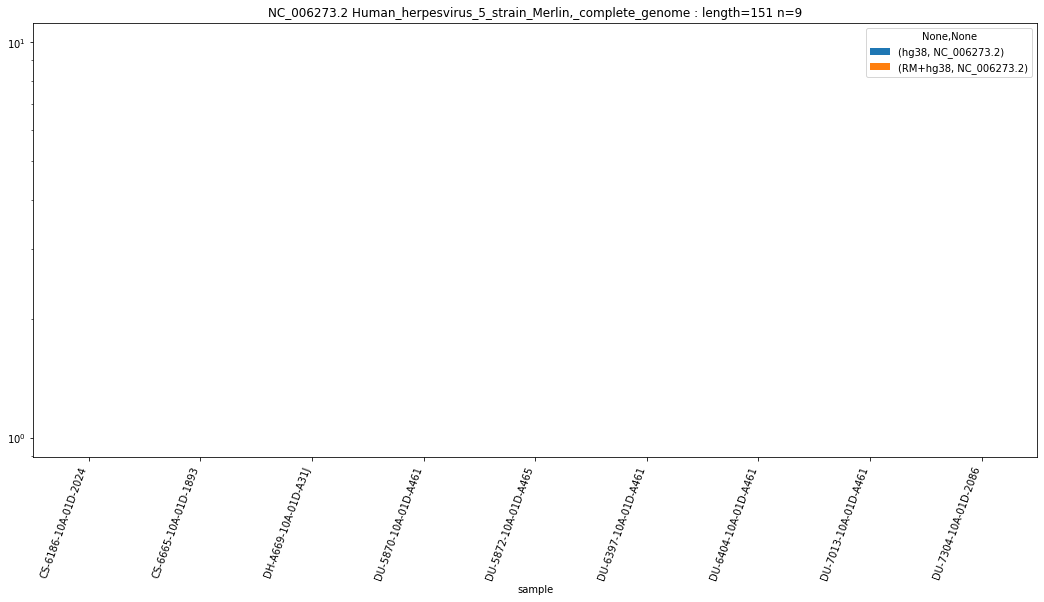

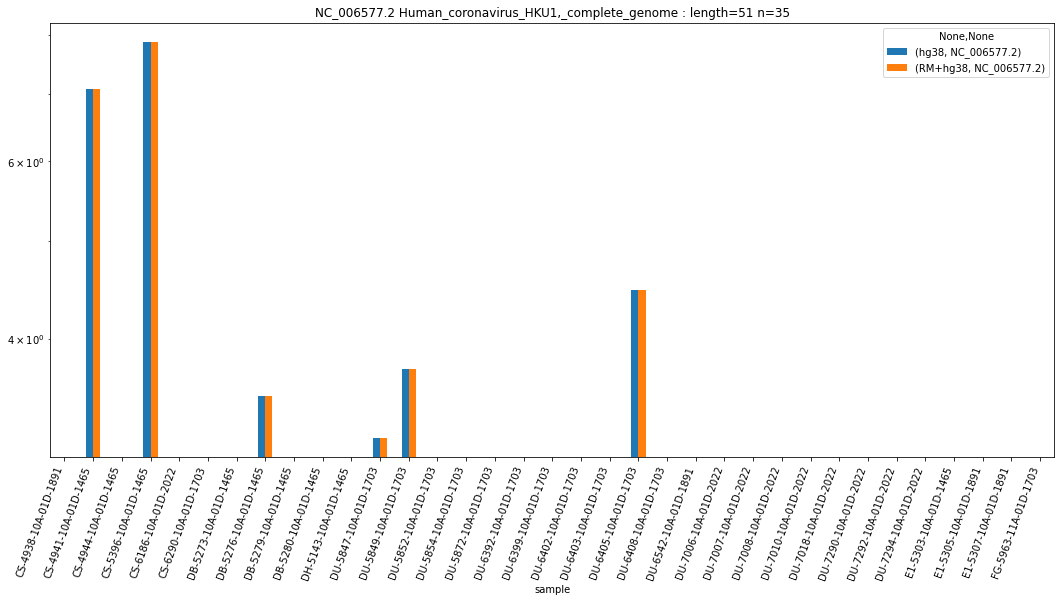

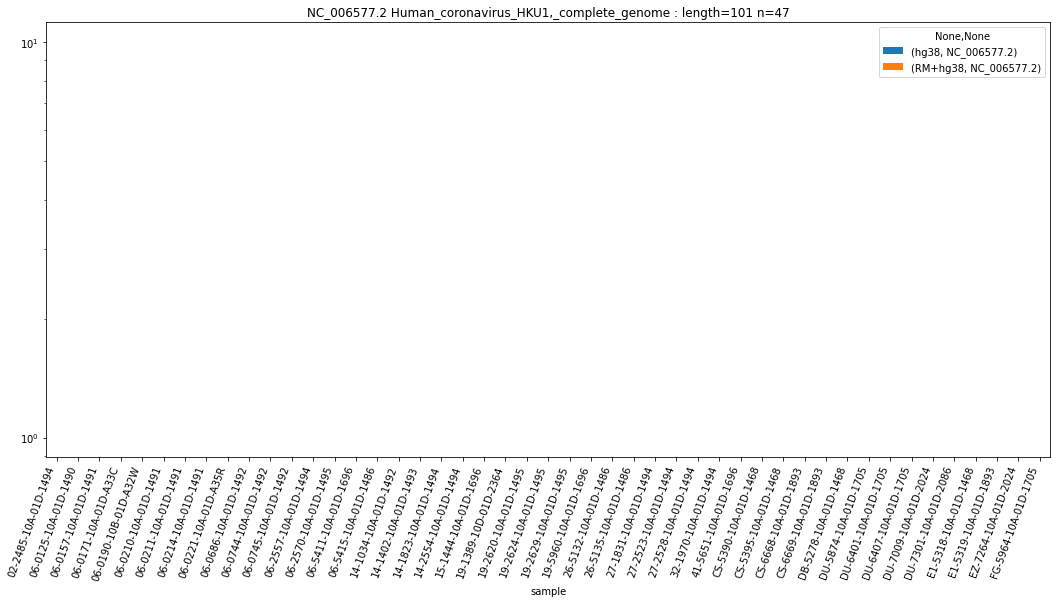

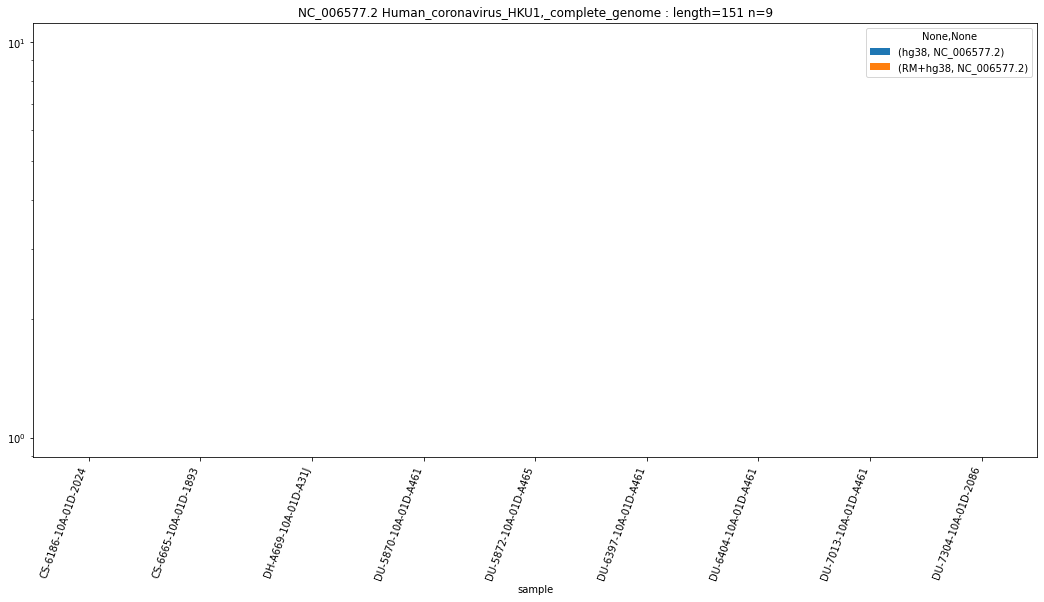

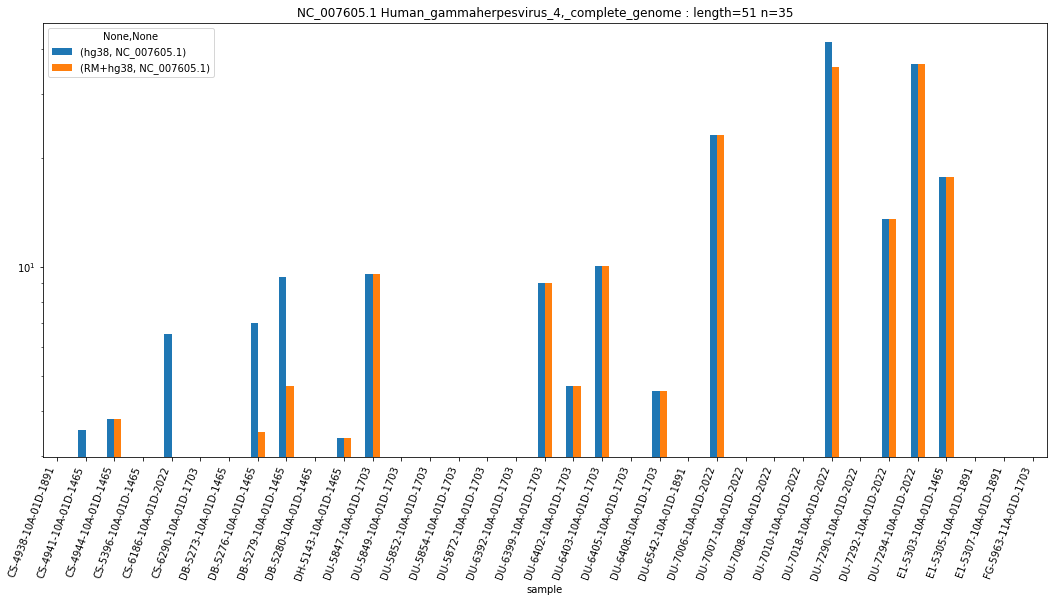

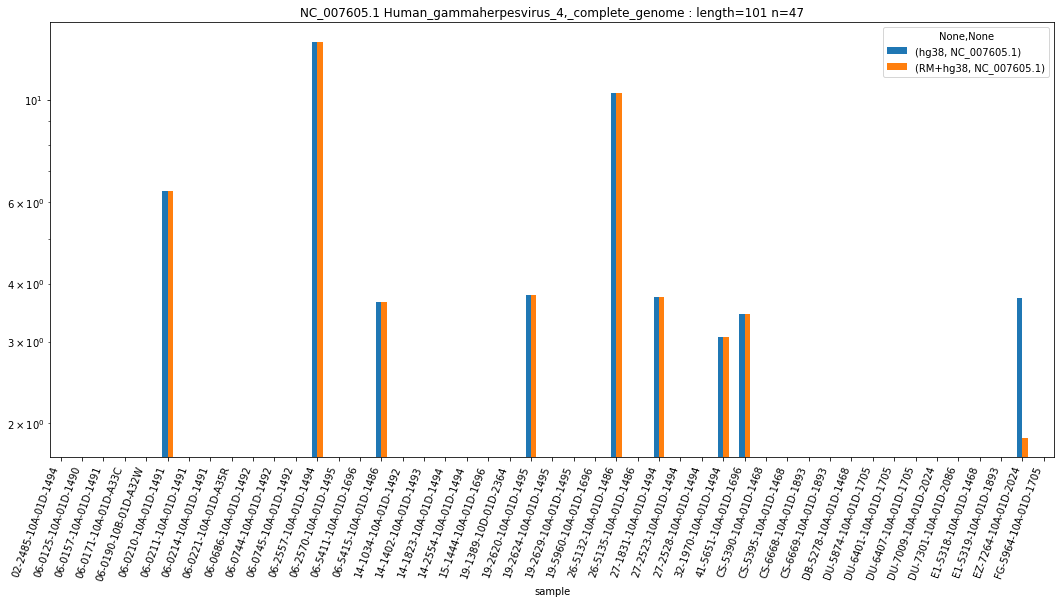

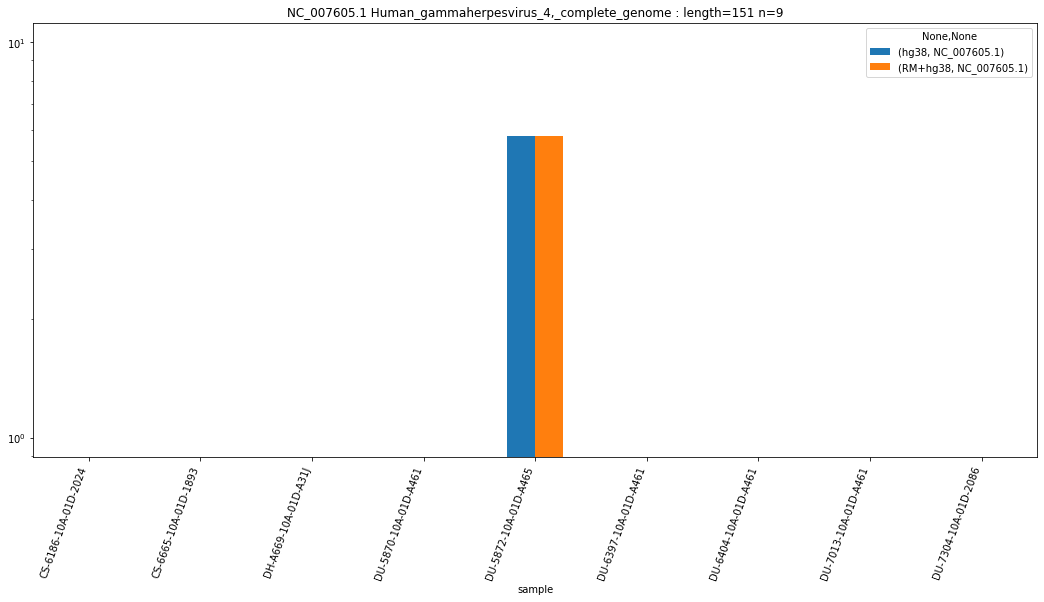

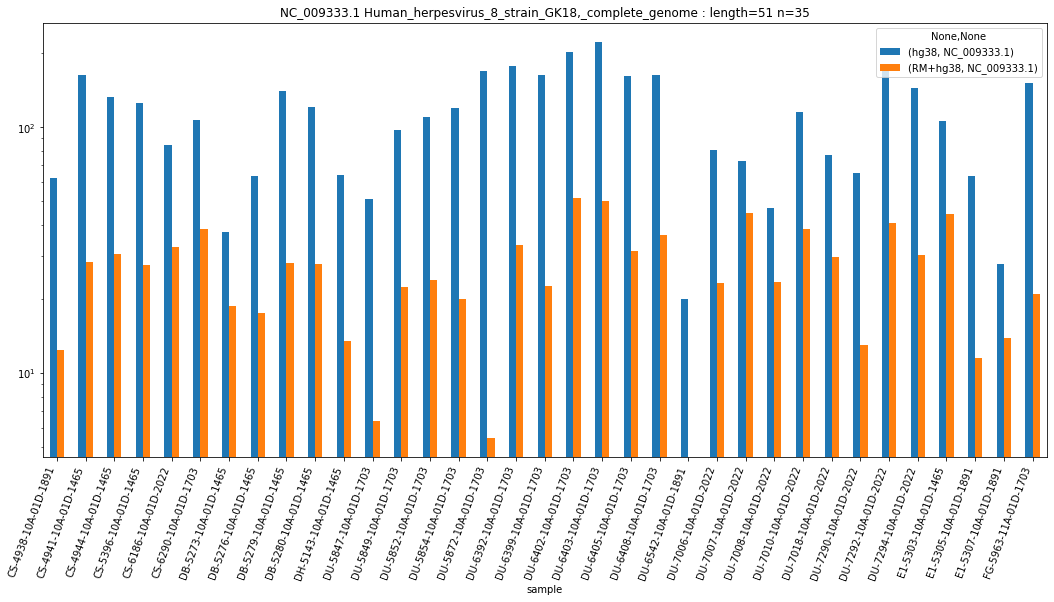

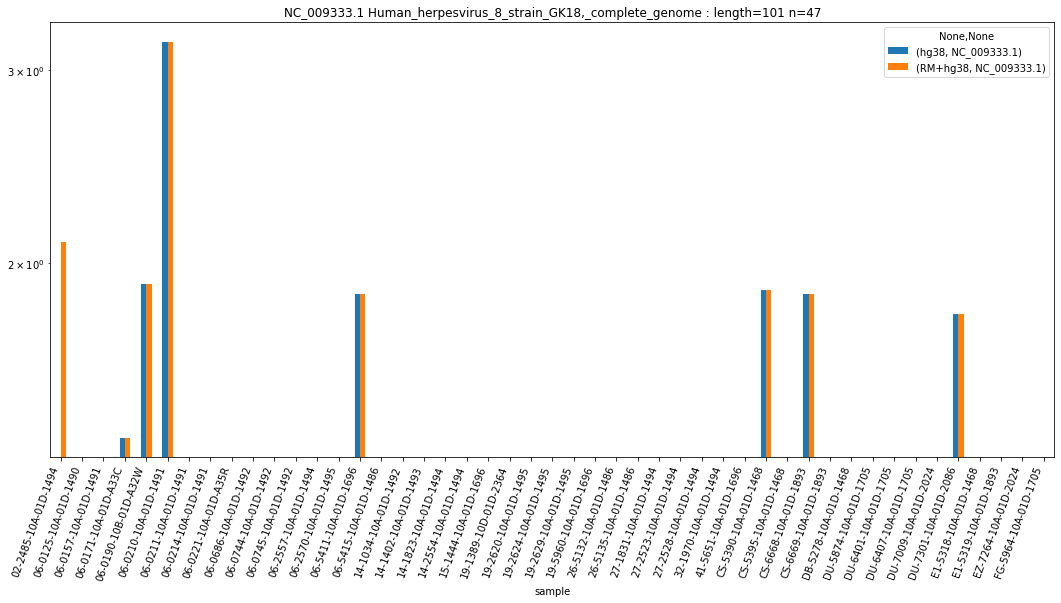

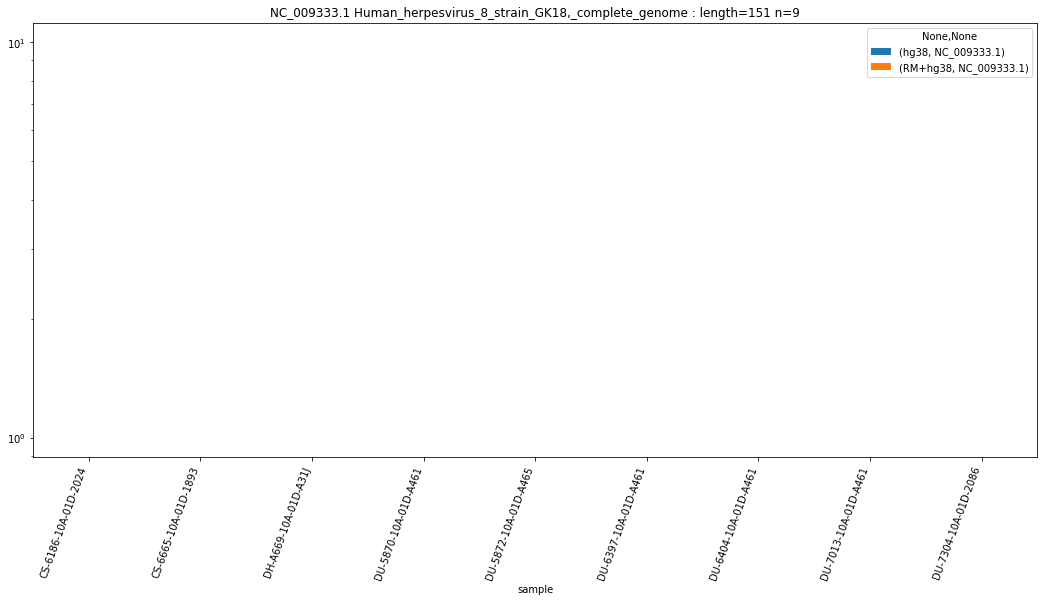

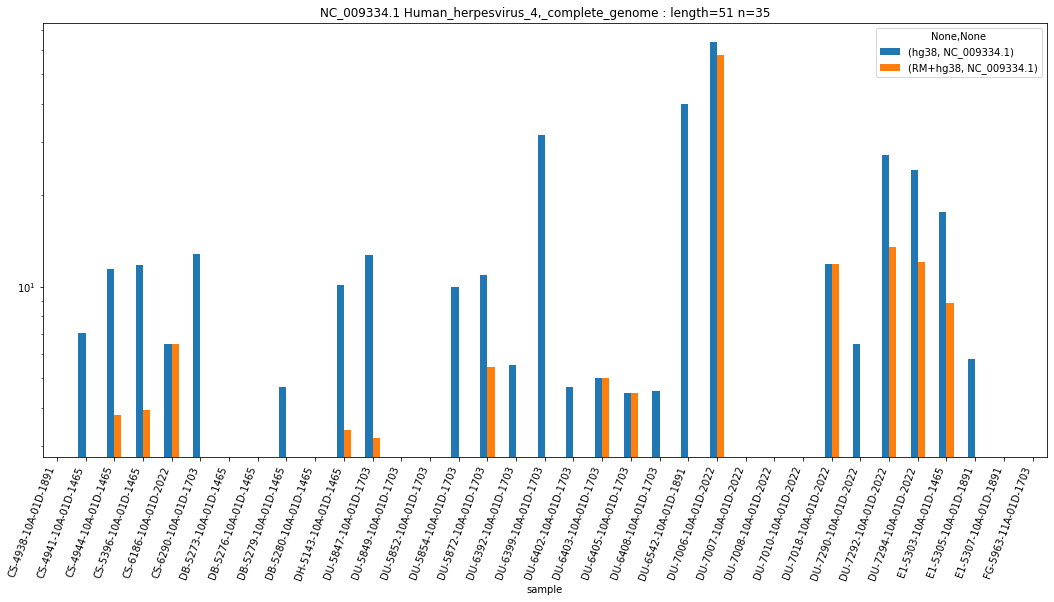

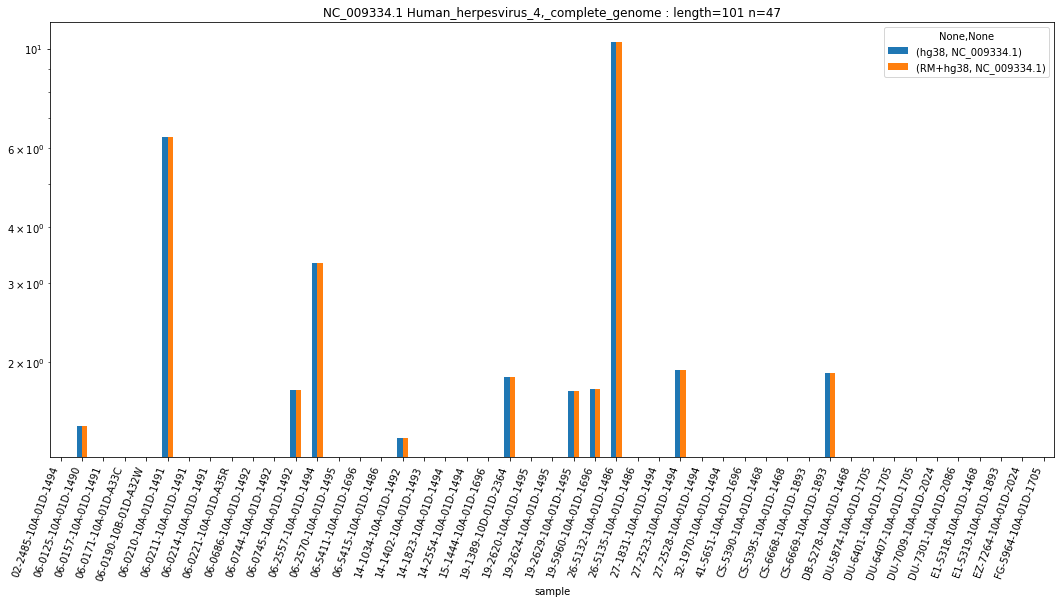

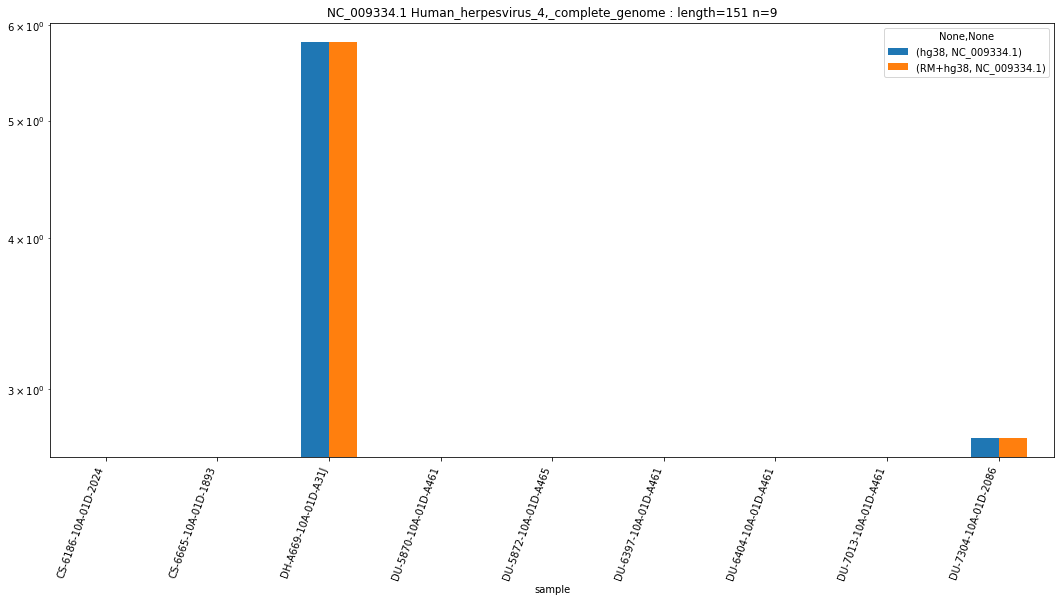

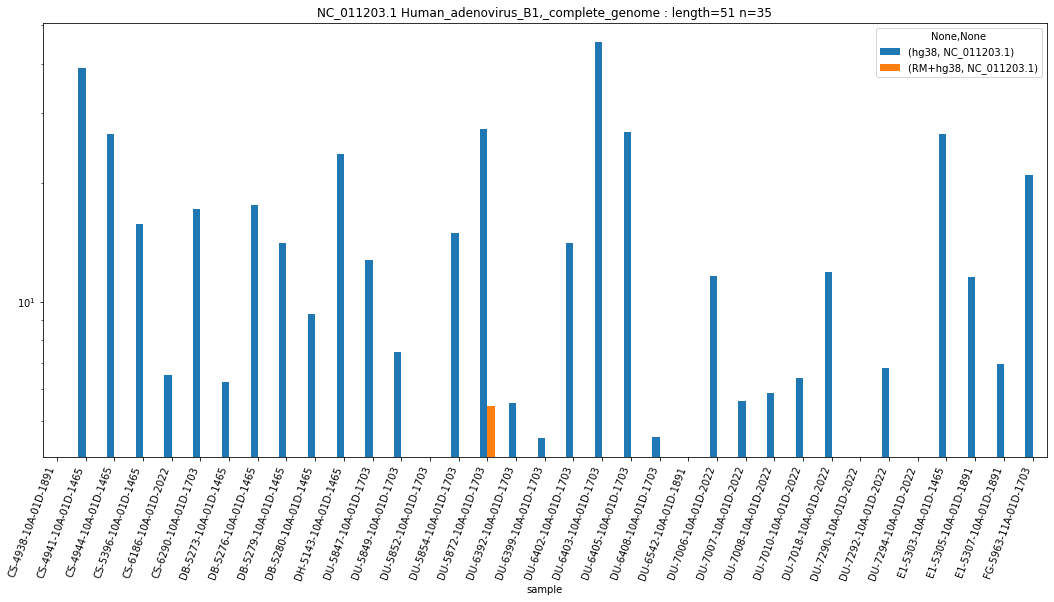

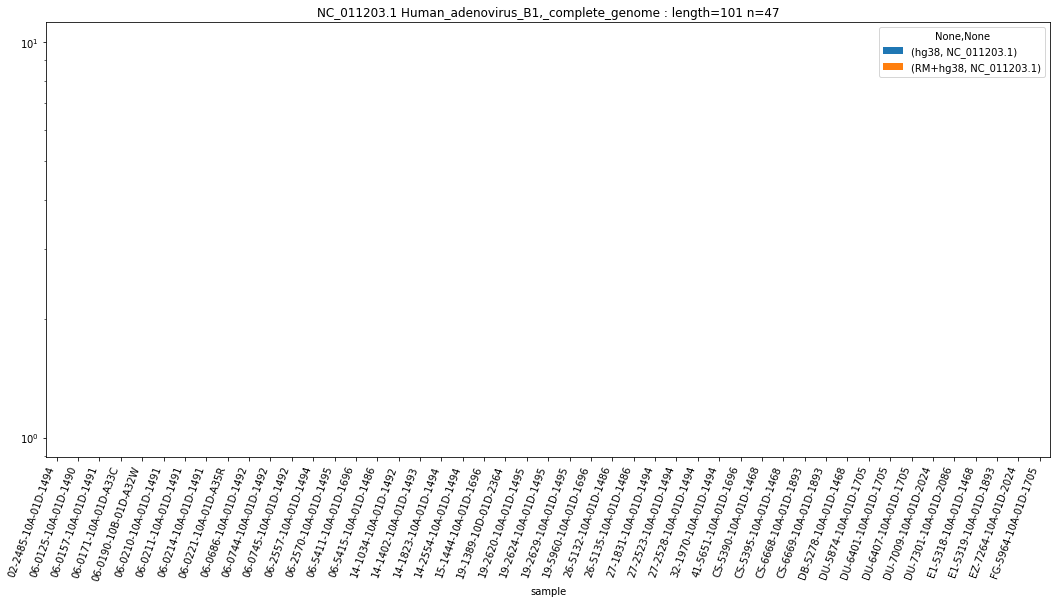

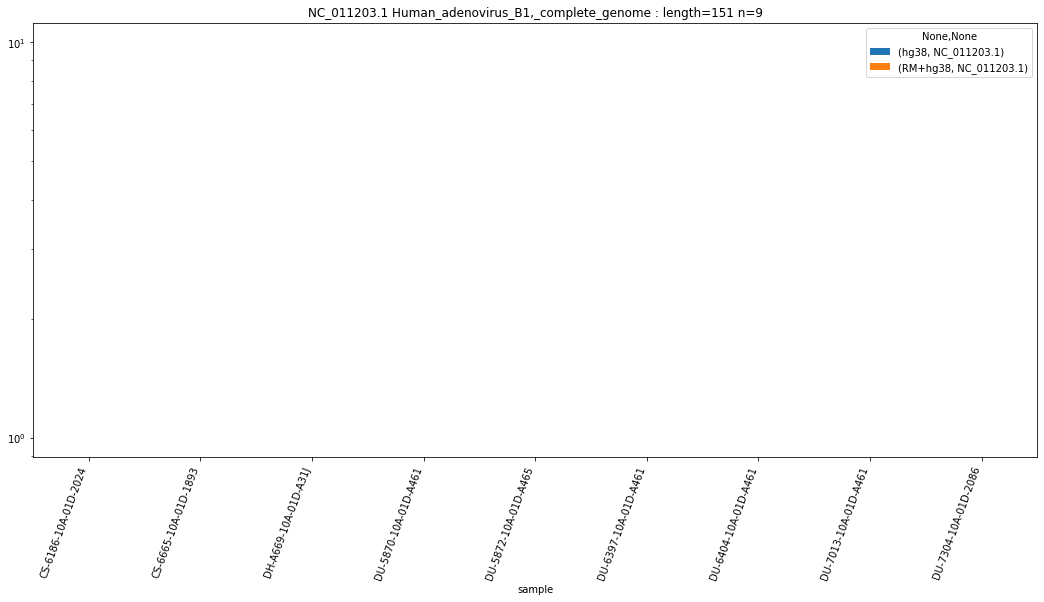

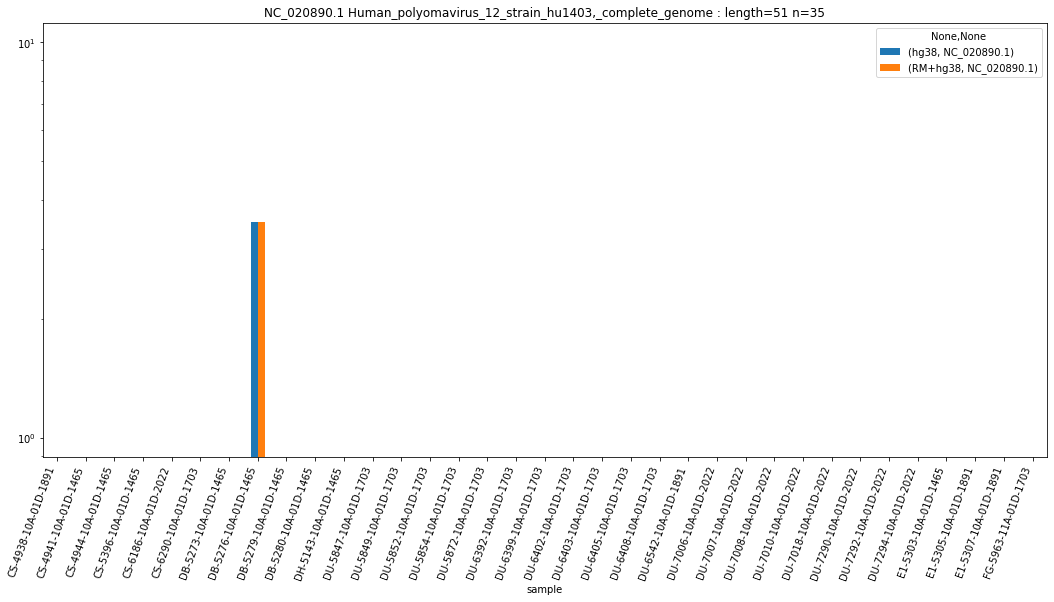

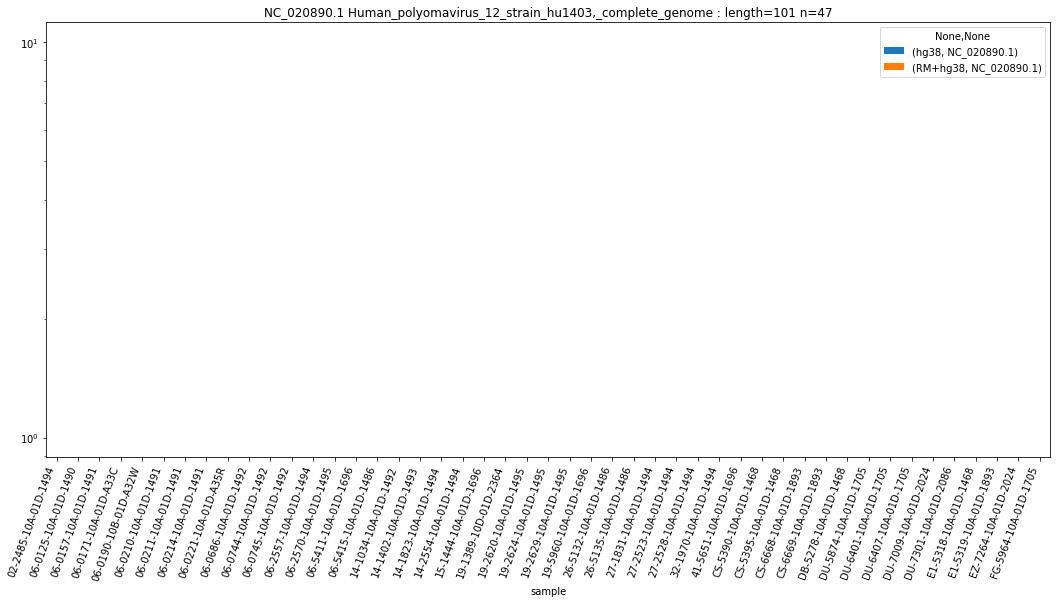

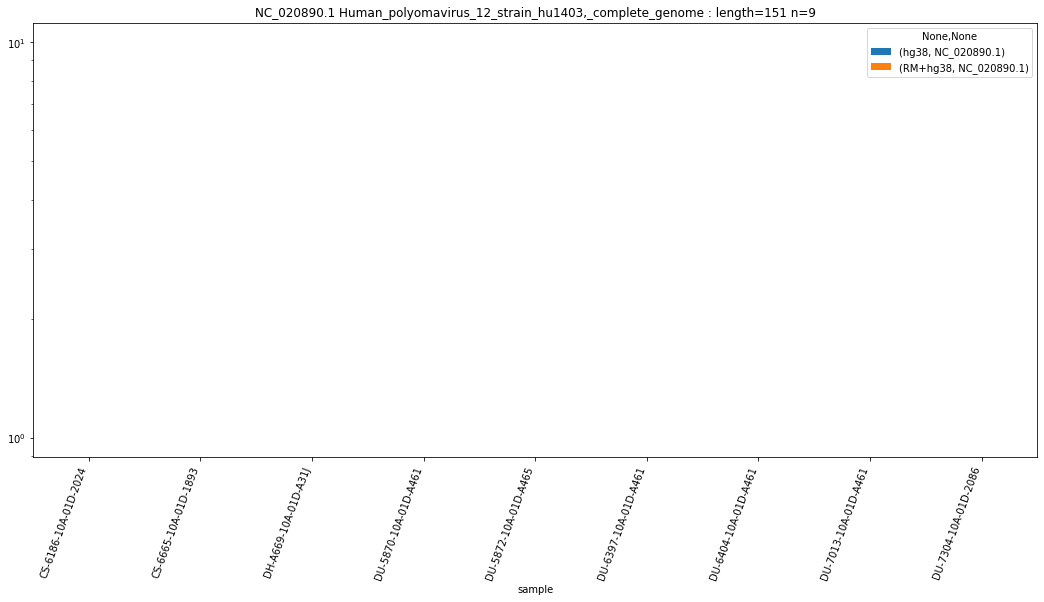

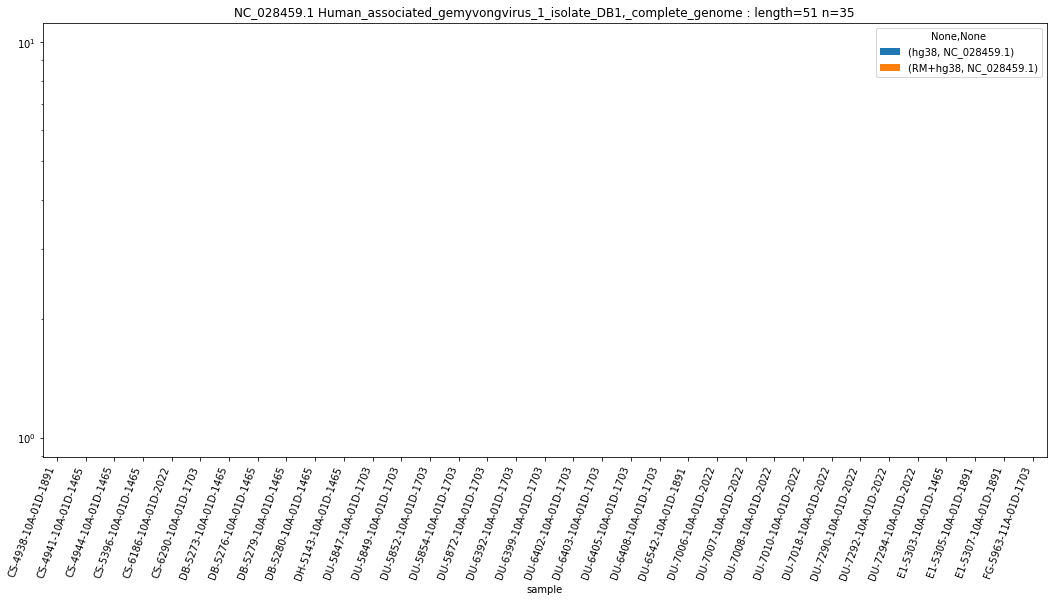

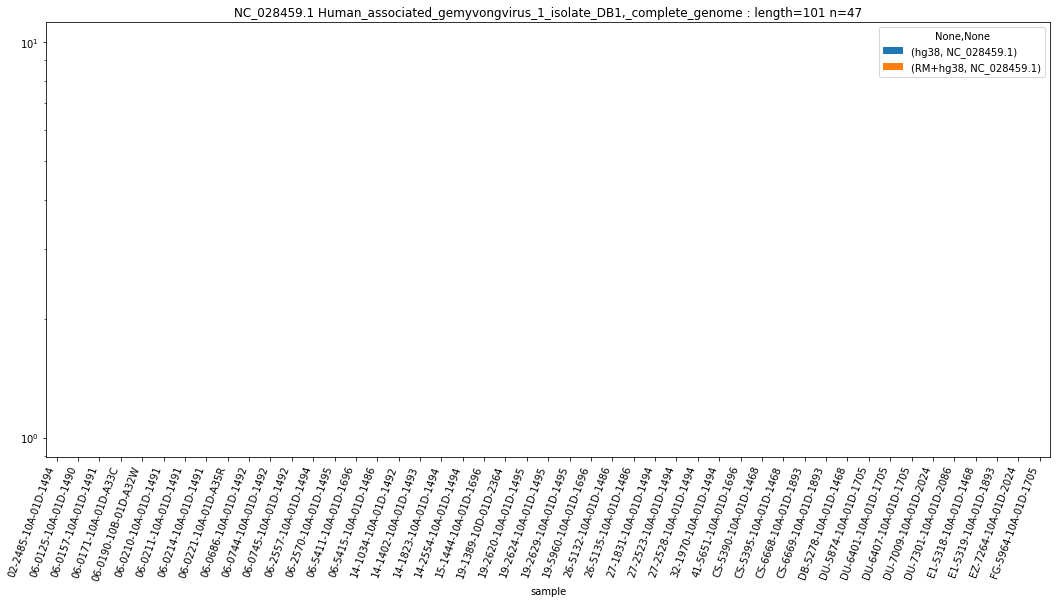

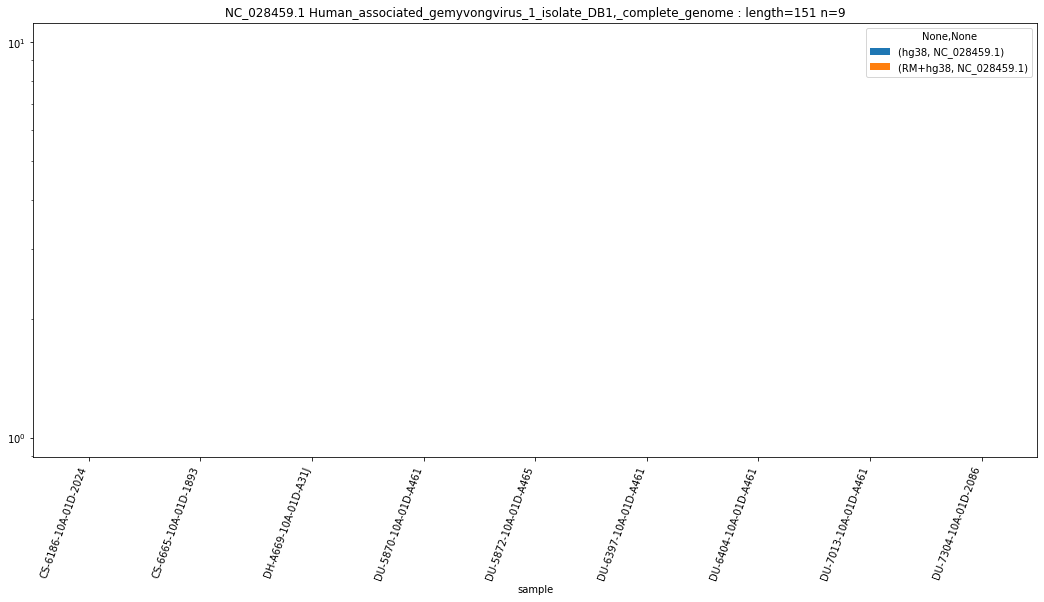

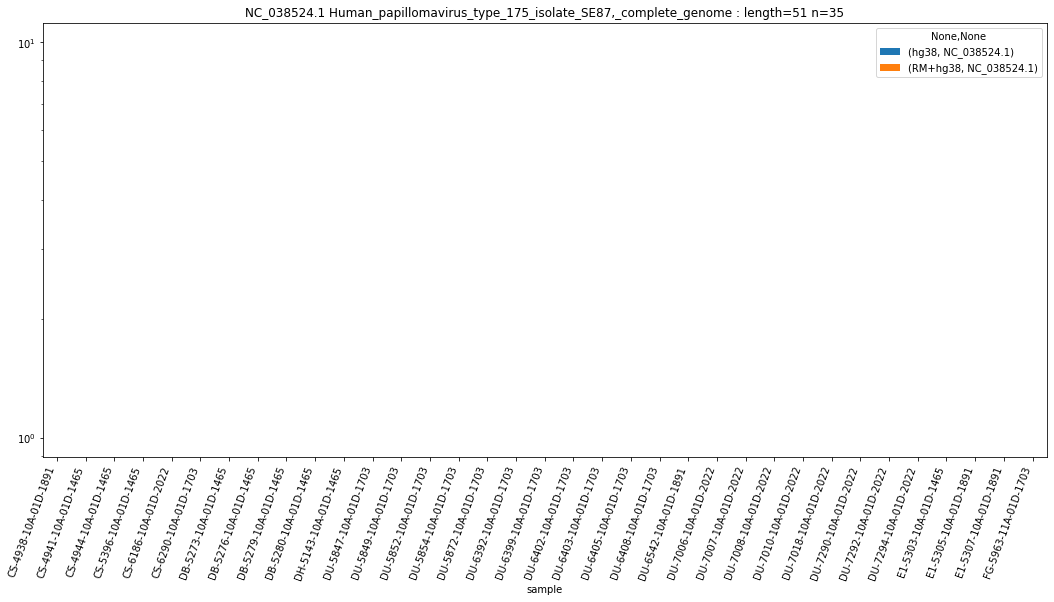

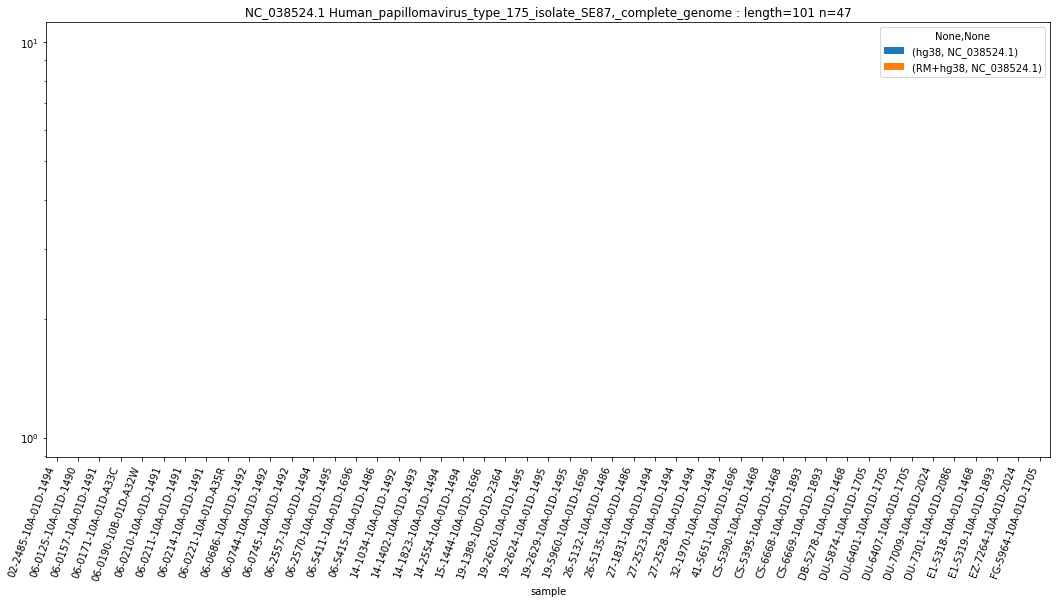

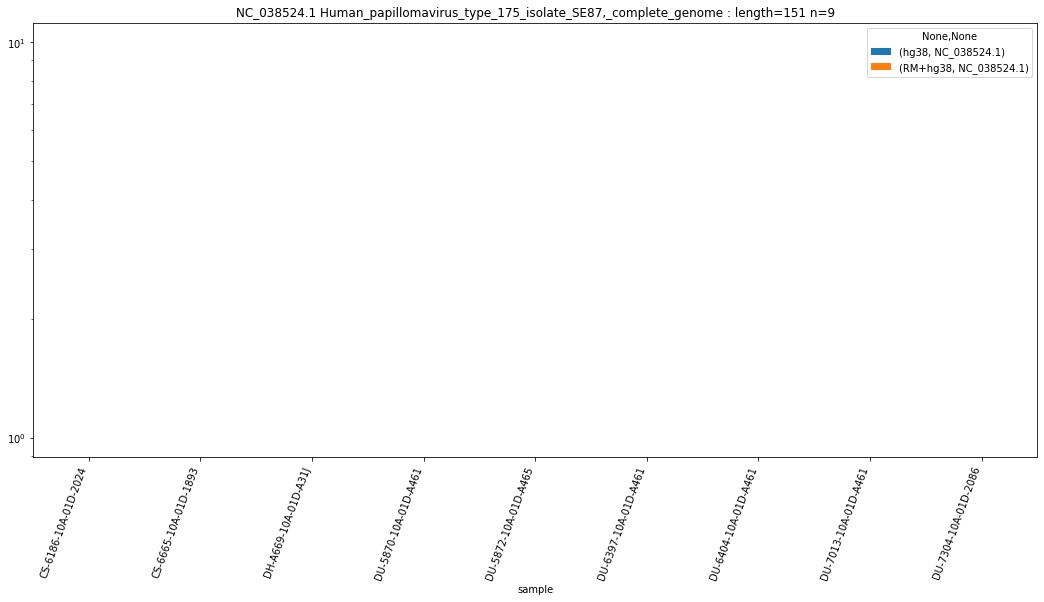

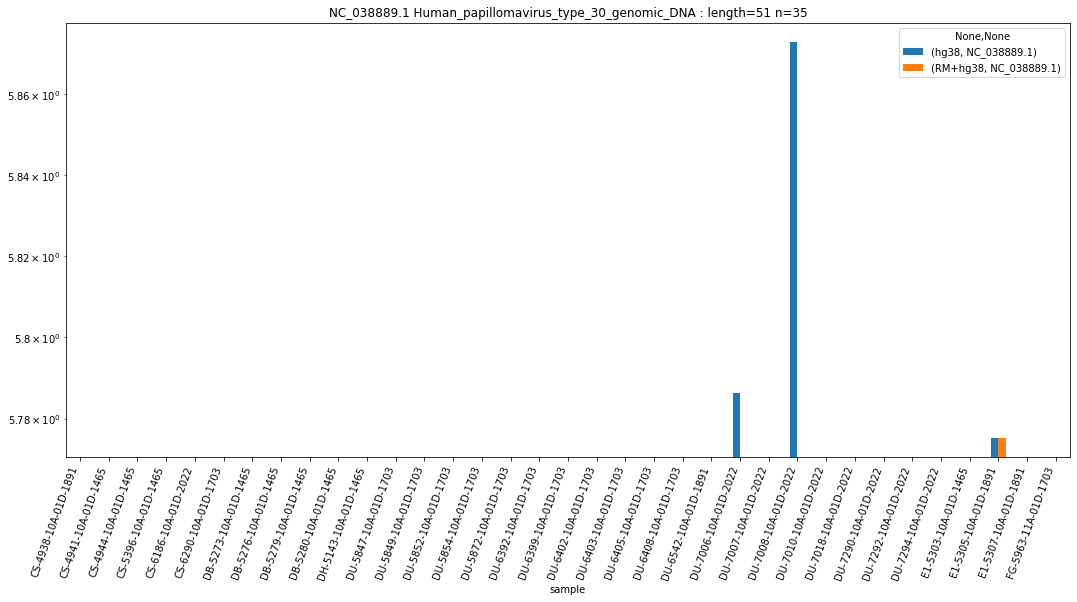

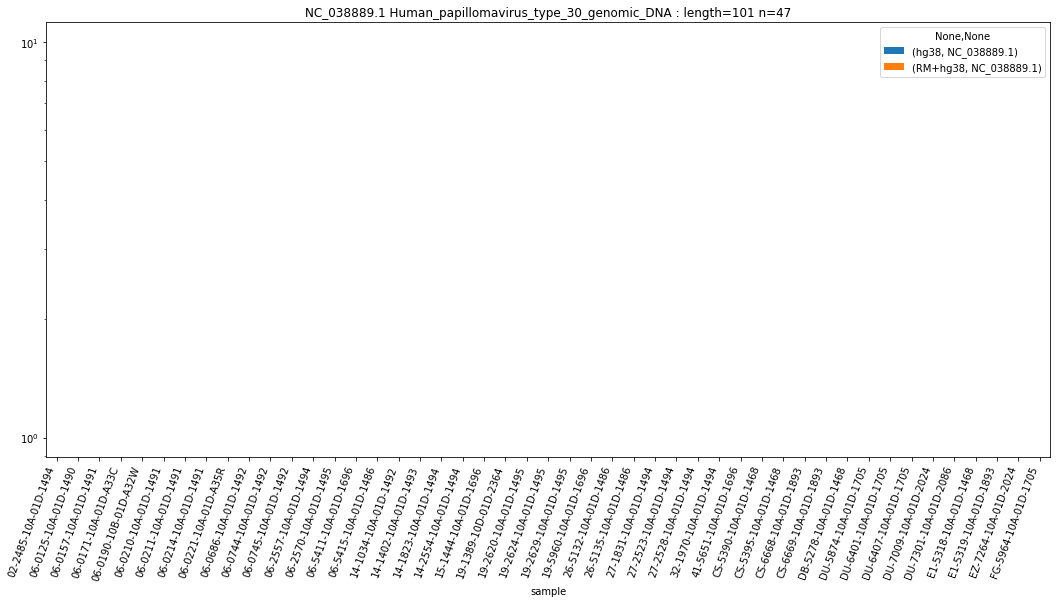

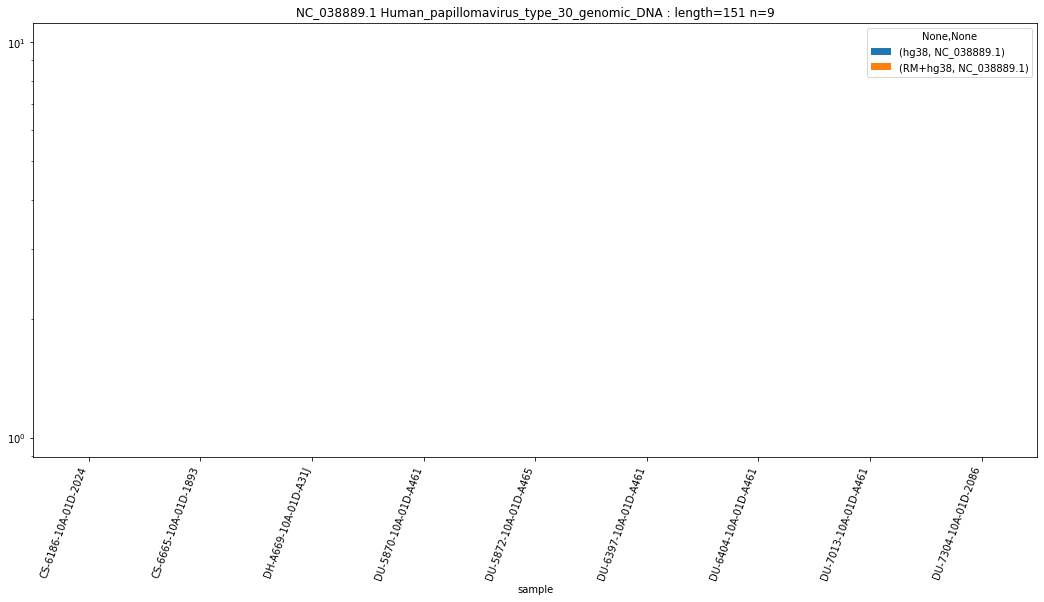

In [32]:
#virus='NC_001716.2'
#for virus in ['NC_001664.4','NC_001716.2','NC_006273.2','NC_009333.1','NC_009334.1']:
for index, row in viruses.iterrows():
    virus=row['accession']
    desc=row['description']
    for length in [51,101,151]:
        data=df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==virus].copy()
        if(len(data) > 0):
            ax=data.reset_index().drop(['read count','average length','raw','RM'],
                                       axis='columns').set_index('sample').plot(kind='bar',logy=True)
            ax.set_xticks(range(len(data)))
            ax.set_xticklabels(data.index.get_level_values(0))

            plt.title(virus+" "+desc+" : length="+str(length)+" n="+str(len(data)))
            plt.xticks(rotation=70,ha='right')
            plt.show()


https://ada.com/conditions/human-herpesvirus/#herpes-simplex


* HHV-1 1806 = 90%
* HHV-2 1798 = 10-30%
* HHV-4 (EBV) 7605,9334 = 90% 
* HHV-5 (CMV) 6273 = 60-90% 
* HHV-6 898,1664 = 20-95%
* HHV-7 1716 = 90%
* HHV-8 (KSHV) 9333 = 5% or 30-80%

No human masked regions so excluded
* HHV-3 (VZV) 1348 = 


I have a strong suspicion that the data used was only reads aligned to human?


In [33]:
pd.set_option('display.max_rows',default_max_rows)

In [34]:
pd.set_option('display.max_colwidth', default_max_colwidth)

https://github.com/ucsffrancislab/genomics/blob/master/data/20210604-GPMP-GBM/20210608-hkle-chimera/Analysis%20HERVK113%2010000.ipynb

https://github.com/ucsffrancislab/genomics/blob/master/data/20211122-Homology-Paper/analysis.ipynb

https://github.com/ucsffrancislab/genomics/blob/master/data/20211122-Homology-Paper/bowtie2_analysis.ipynb